In [45]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import itertools
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pylab import rcParams


warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(10, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

###### Time Series Analysis

In [46]:
housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                        housing['MoSold'].astype(str) + '-1').rename('DateSold')

df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

In [47]:
housing

GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
PID                                                                          
909176150        856     126000          30       RL          NaN     7890   
905476230       1049     139500         120       RL         42.0     4235   
911128020       1001     124900          30  C (all)         60.0     6060   
535377150       1039     114000          70       RL         80.0     8146   
534177230       1665     227000          60       RL         70.0     8400   
...              ...        ...         ...      ...          ...      ...   
903205040        952     121000          30       RL          NaN     8854   
905402060       1733     139600          20       RL          NaN    13680   
909275030       2002     145000          90       RH         82.0     6270   
907192040       1842     217500          60       RL          NaN     8826   
906223180       1911     215000          60       RL         80.0     9554   

          Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
PID                                                                         
909176150   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
905476230   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
911128020   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
535377150   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
534177230   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
...          ...   ...      ...         ...       ...       ...       ...   
903205040   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
905402060   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
909275030   Pave   NaN      Reg         HLS    AllPub    Inside       Gtl   
907192040   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
906223180   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

          Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
PID                                                                             
909176150        SWISU       Norm       Norm     1Fam     1Story            6   
905476230      Edwards       Norm       Norm   TwnhsE     1Story            5   
911128020       IDOTRR       Norm       Norm     1Fam     1Story            5   
535377150      OldTown       Norm       Norm     1Fam     2Story            4   
534177230       NWAmes       Norm       Norm     1Fam     2Story            8   
...                ...        ...        ...      ...        ...          ...   
903205040      BrkSide       Norm       Norm     1Fam     1.5Unf            6   
905402060      Edwards       Norm       Norm     1Fam     1Story            3   
909275030      Crawfor       Norm       Norm   Duplex     2Story            5   
907192040      CollgCr       Norm       Norm     1Fam     2Story            7   
906223180      SawyerW       Norm       Norm     1Fam     2Story            8   

           OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
PID                                                                  
909176150            6       1939          1950     Gable  CompShg   
905476230            5       1984          1984     Gable  CompShg   
911128020            9       1930          2007       Hip  CompShg   
535377150            8       1900          2003     Gable  CompShg   
534177230            6       2001          2001     Gable  CompShg   
...                ...        ...           ...       ...      ...   
903205040            6       1916          1950     Gable  CompShg   
905402060            5       1955          1955       Hip  CompShg   
909275030            6       1949          1950     Gable  CompShg   
907192040            5       2000          2000     Gable  CompShg   
906223180            5       1993          1994     Gable  CompShg   

          Exterior1st Exterio

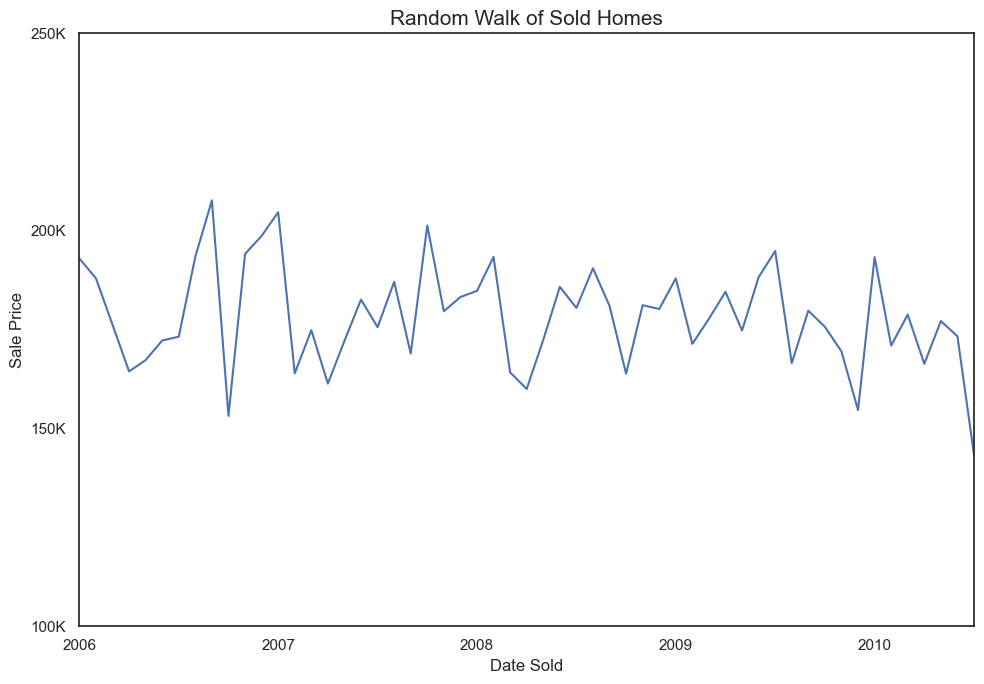

In [48]:


fig = df.plot(legend=False)
fig.set(xlabel='Date Sold',
        ylabel='Sale Price',
        xticks=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01'],
        xticklabels=list(range(2006, 2011)),
        yticks=[1e5, 1.5e5, 2e5, 2.5e5],
        yticklabels=['100K', '150K', '200K', '250K'])
plt.title('Random Walk of Sold Homes', fontsize = 15)
plt.tight_layout()
plt.savefig('../visualizations/EDA - Timeseries DateSold, Lineplot.png', dpi = 1000)
plt.show()

In [49]:
adf = sm.tsa.adfuller(df, regression='ct')
print(f'adf test: {adf[0]}, p-value: {adf[1]}')

# looks like we can reject the null hypothesis and continue with the test

adf test: -6.948276068898889, p-value: 1.8493823638383215e-08


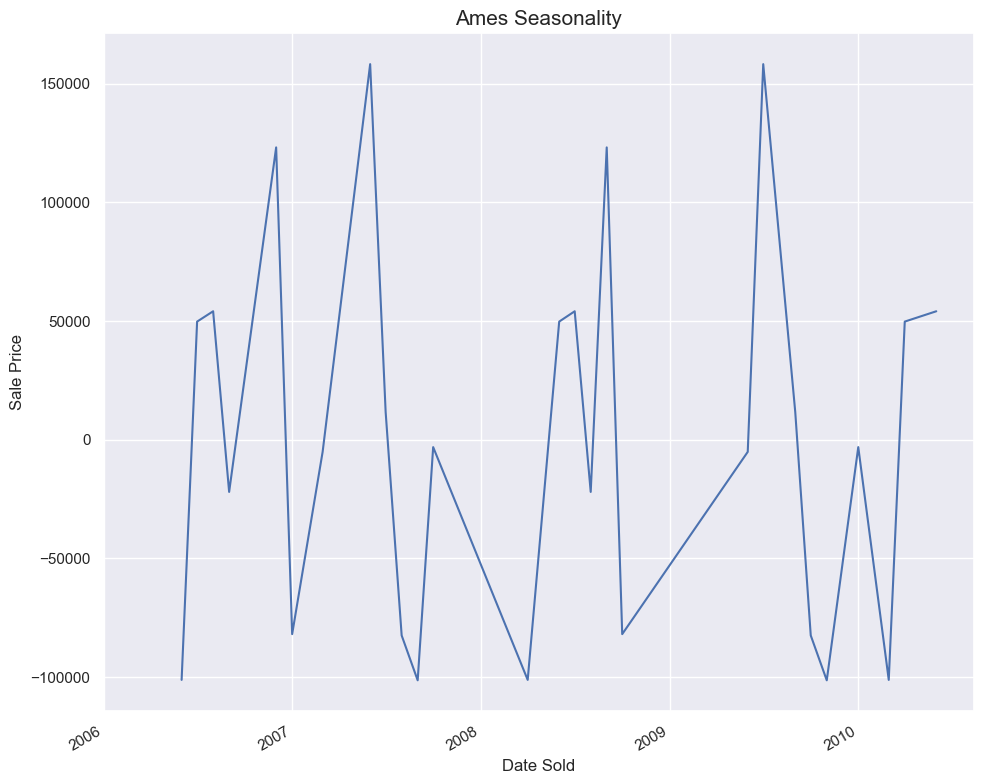

In [110]:
sns.set(rc = {'figure.figsize':(13, 7)})

housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
housing = housing[housing['Neighborhood'] == neighborhood]
DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                        housing['MoSold'].astype(str) + '-1').rename('DateSold')

df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
#     fig = decomposition.trend.plot(legend=True)
fig = decomposition.seasonal.plot()
fig.set(xlabel='Date Sold',
        ylabel='Sale Price',
        xticks=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01'],
        xticklabels=list(range(2006, 2011)))
#         yticks=[2.2e5, 2.3e5, 2.4e5, 2.5e5, 2.6e5, 2.7e5],
#         yticklabels=['220K', '230K', '240K', '250K', '260K', '270K'])
plt.title(f'Ames Seasonality', fontsize = 15)
plt.tight_layout()
plt.savefig(f'../shiny/Ames_dashboard_Daniel/www/img/ts_seasonality/ames_seasonality_prediction.png', dpi = 1000)
plt.show()

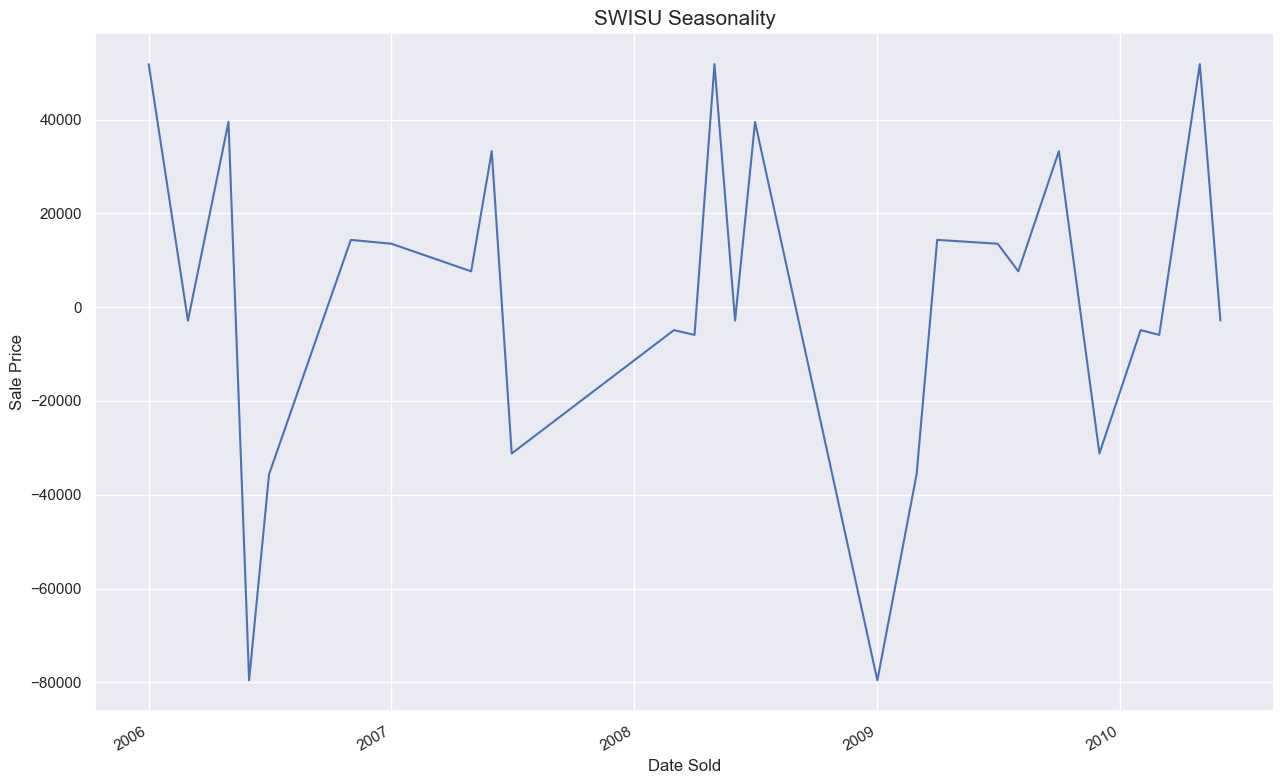

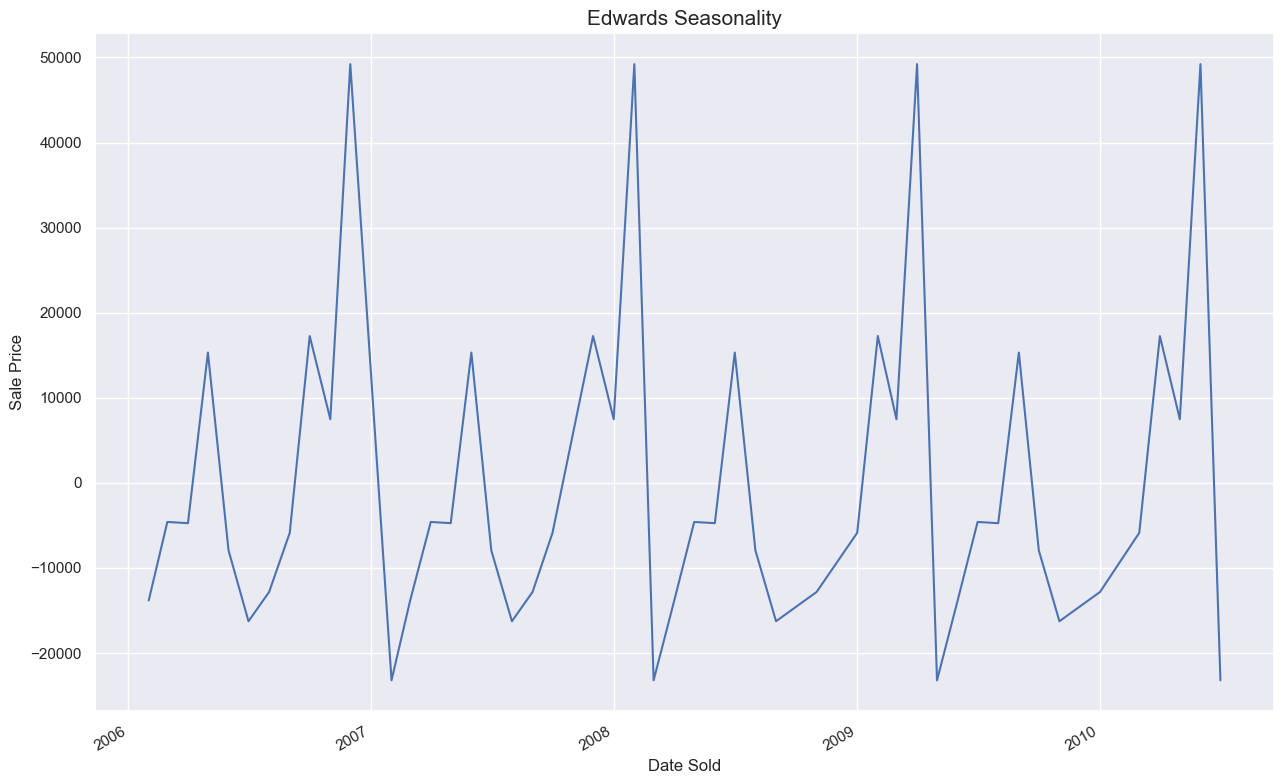

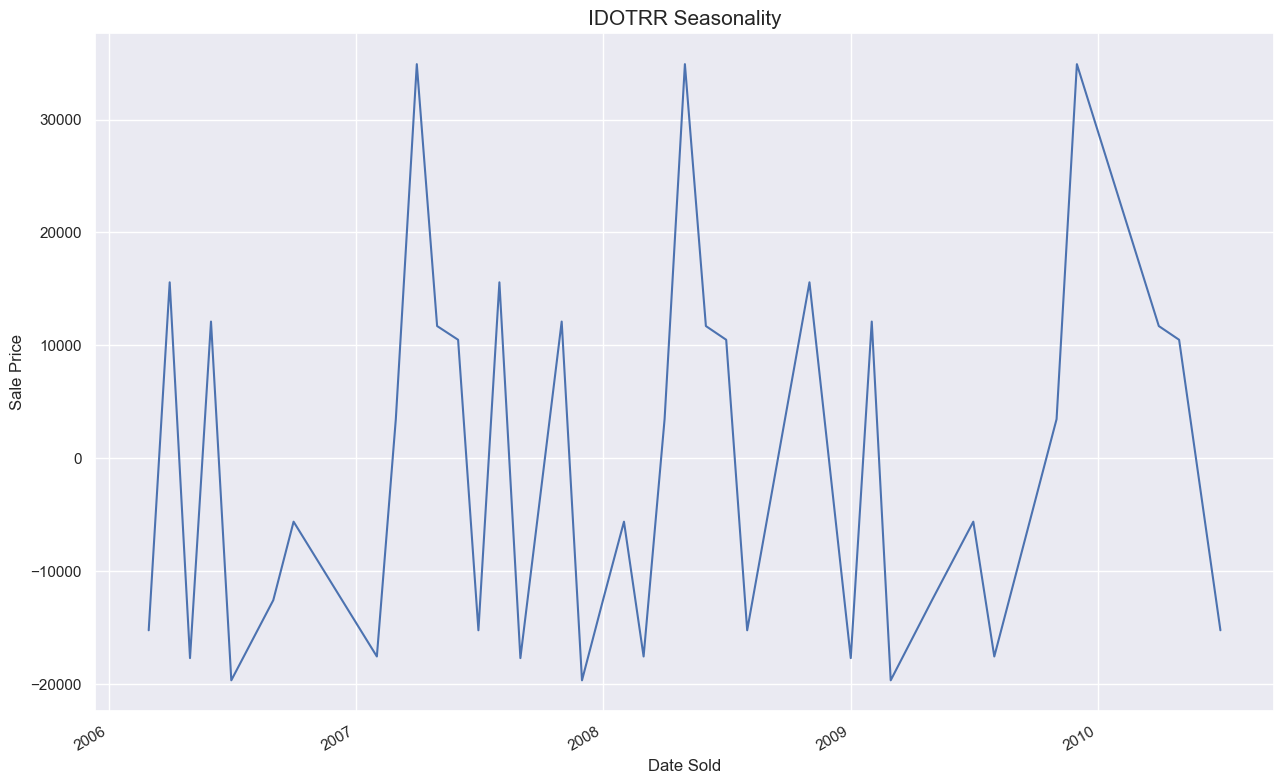

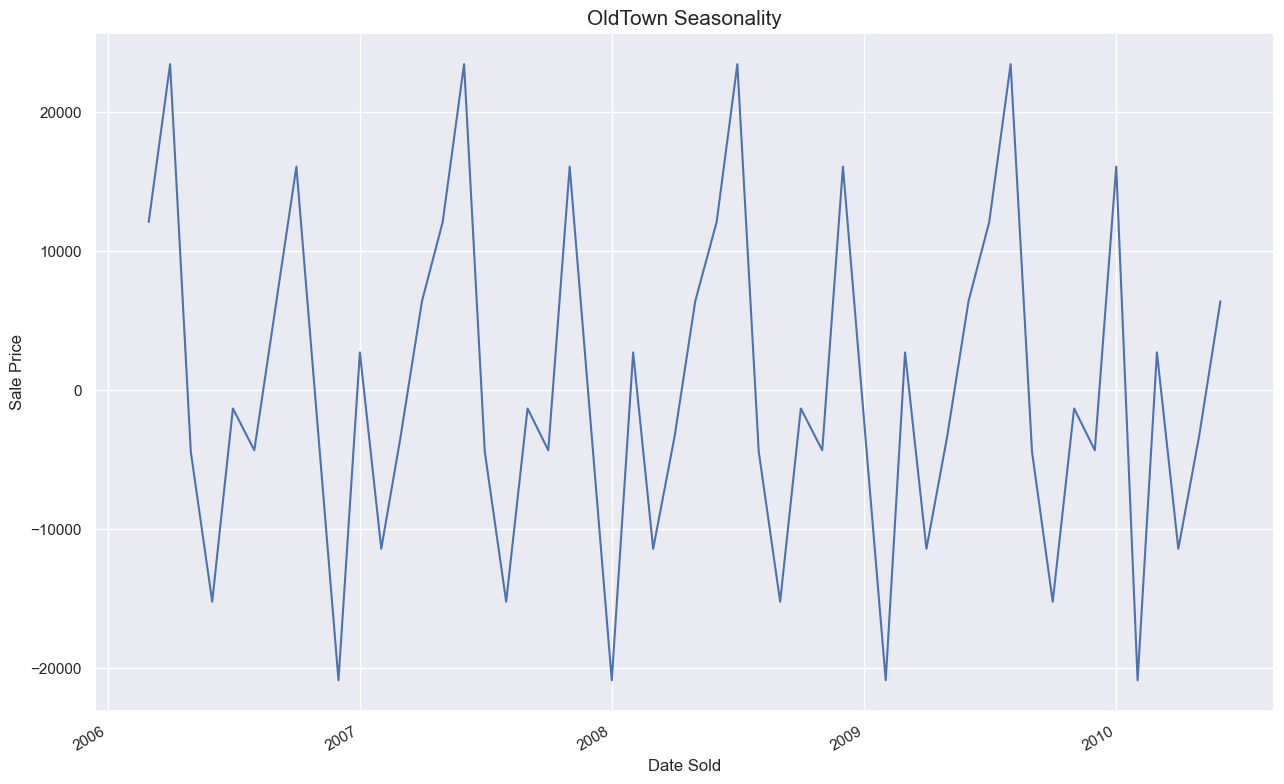

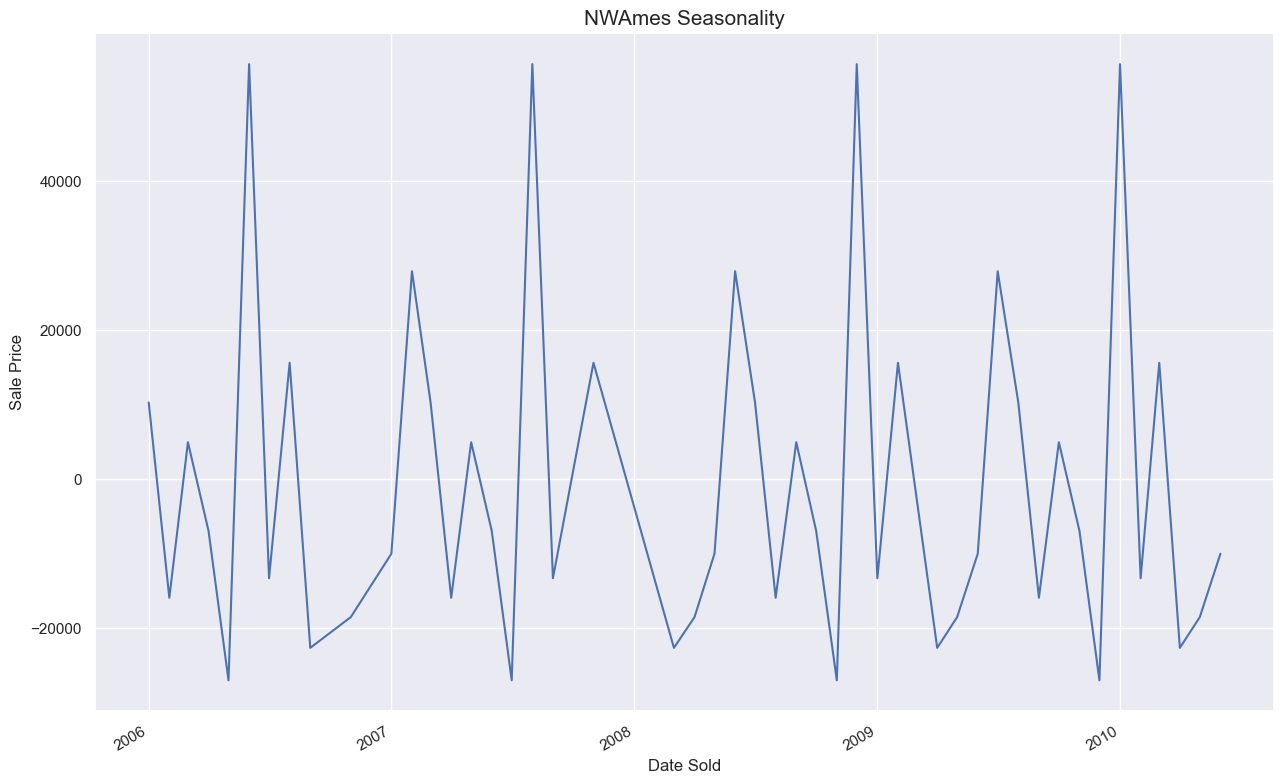

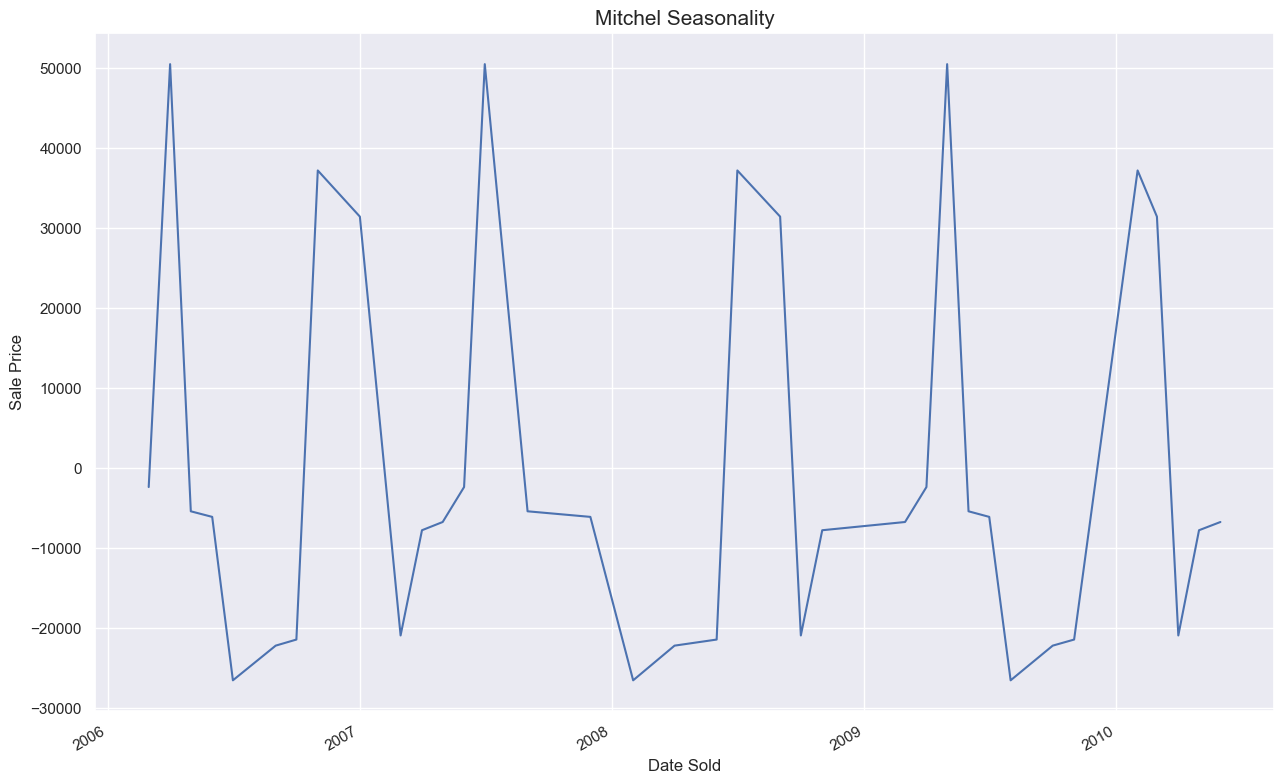

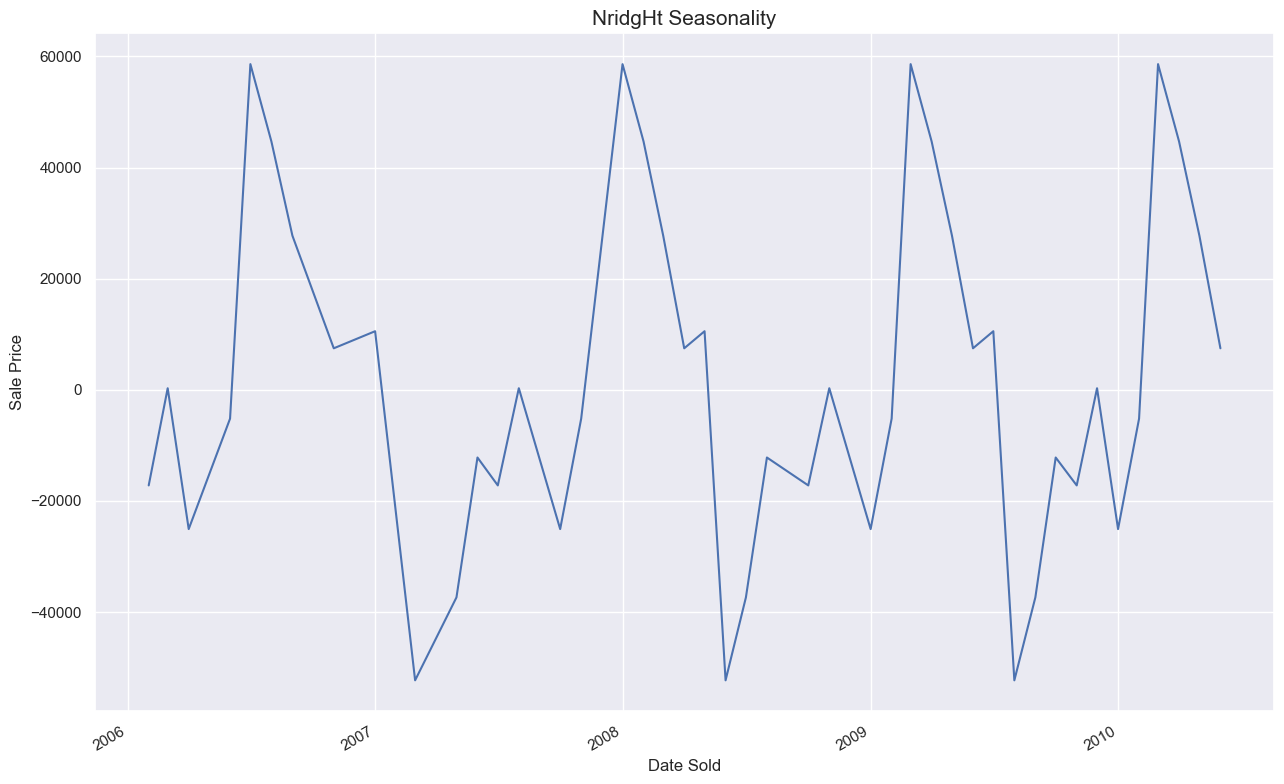

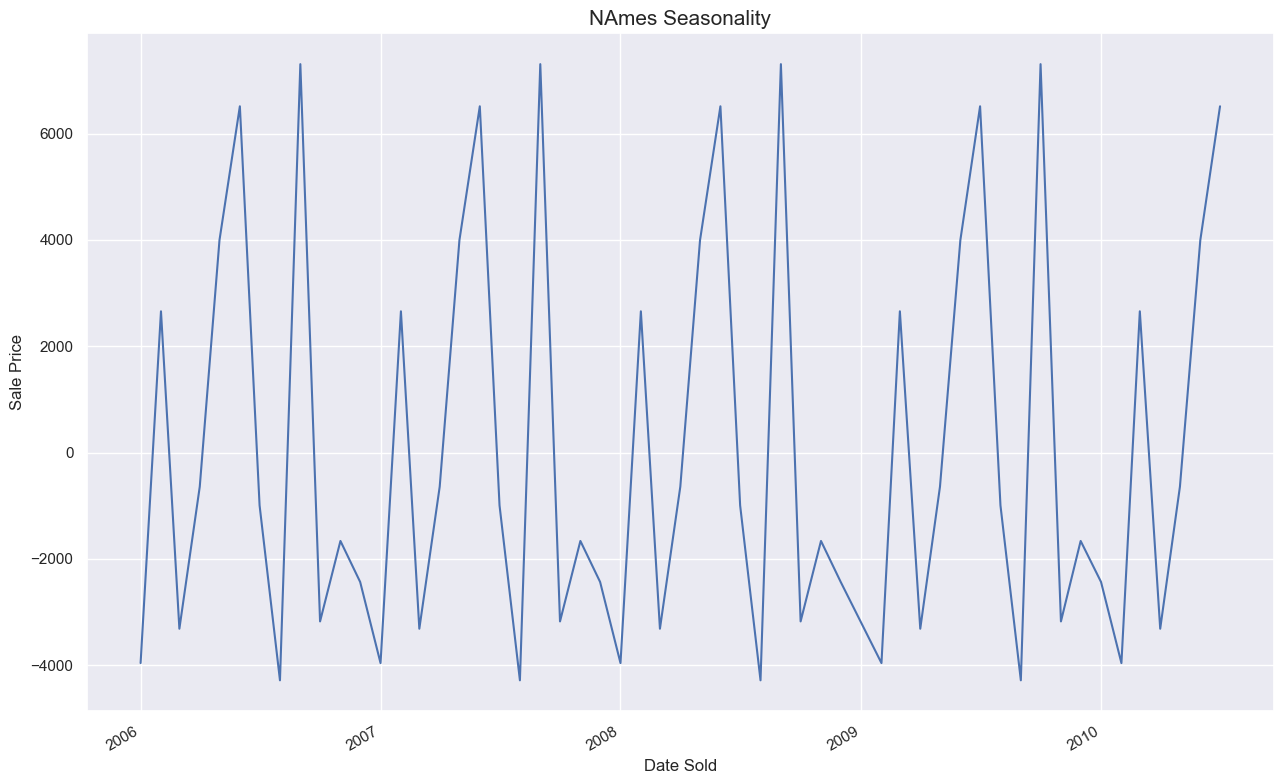

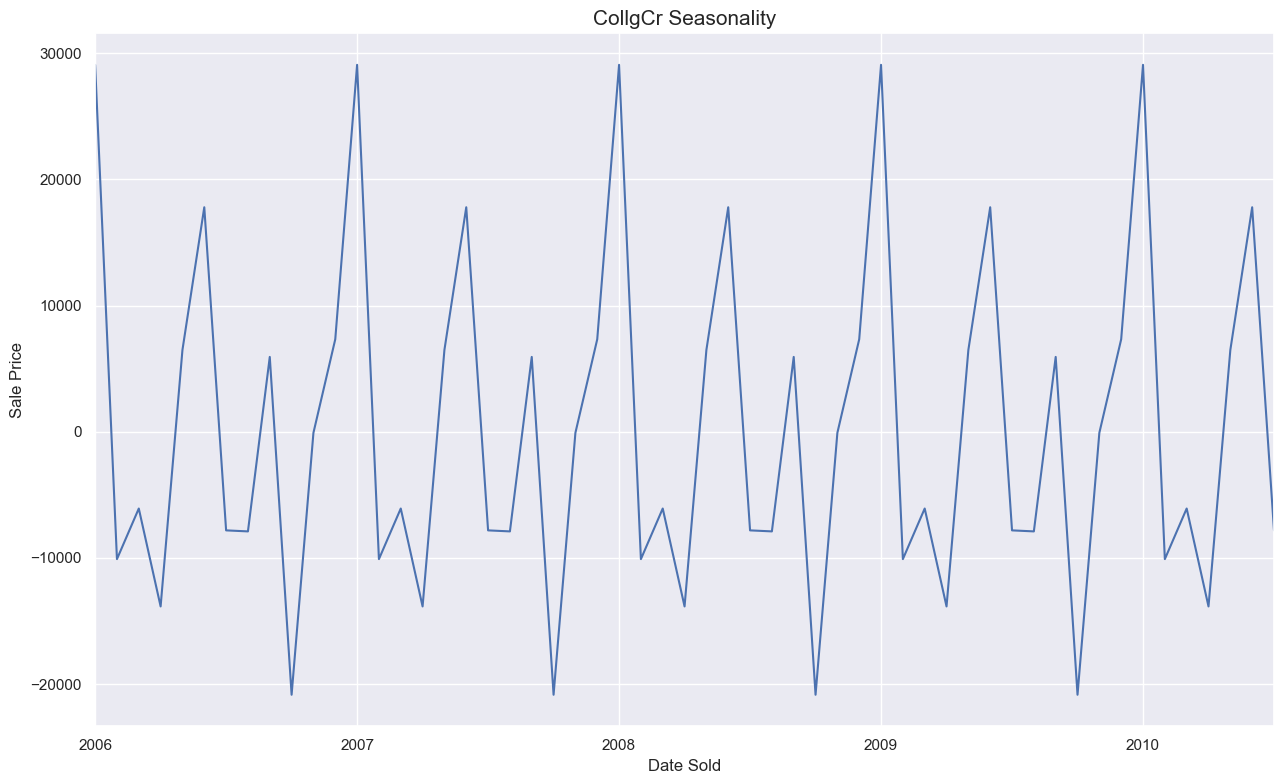

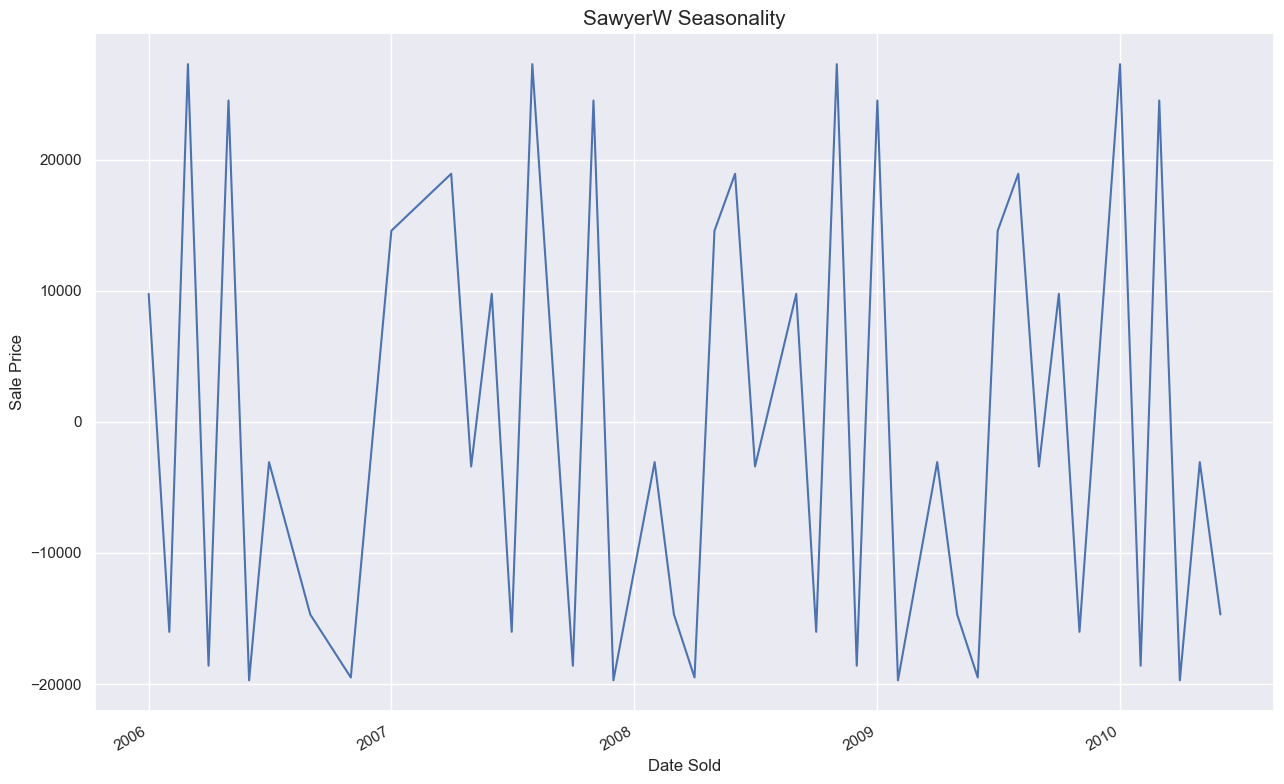

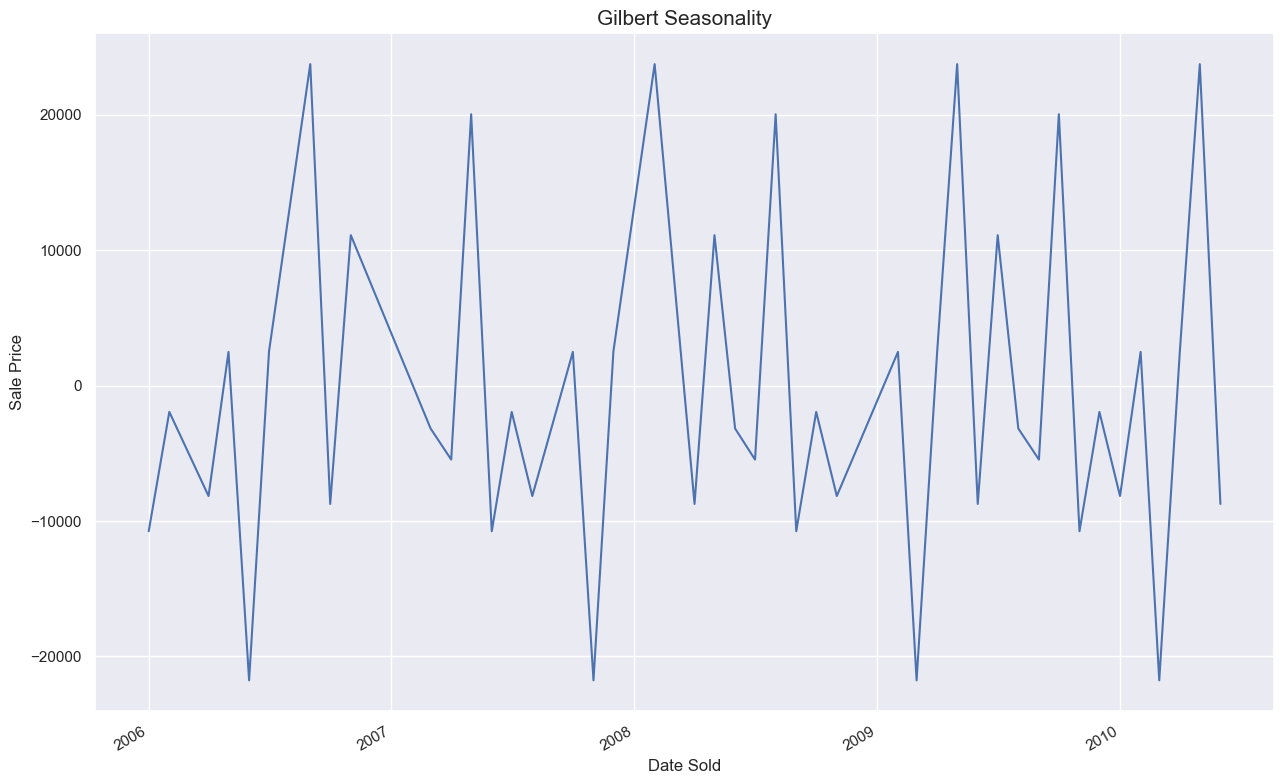

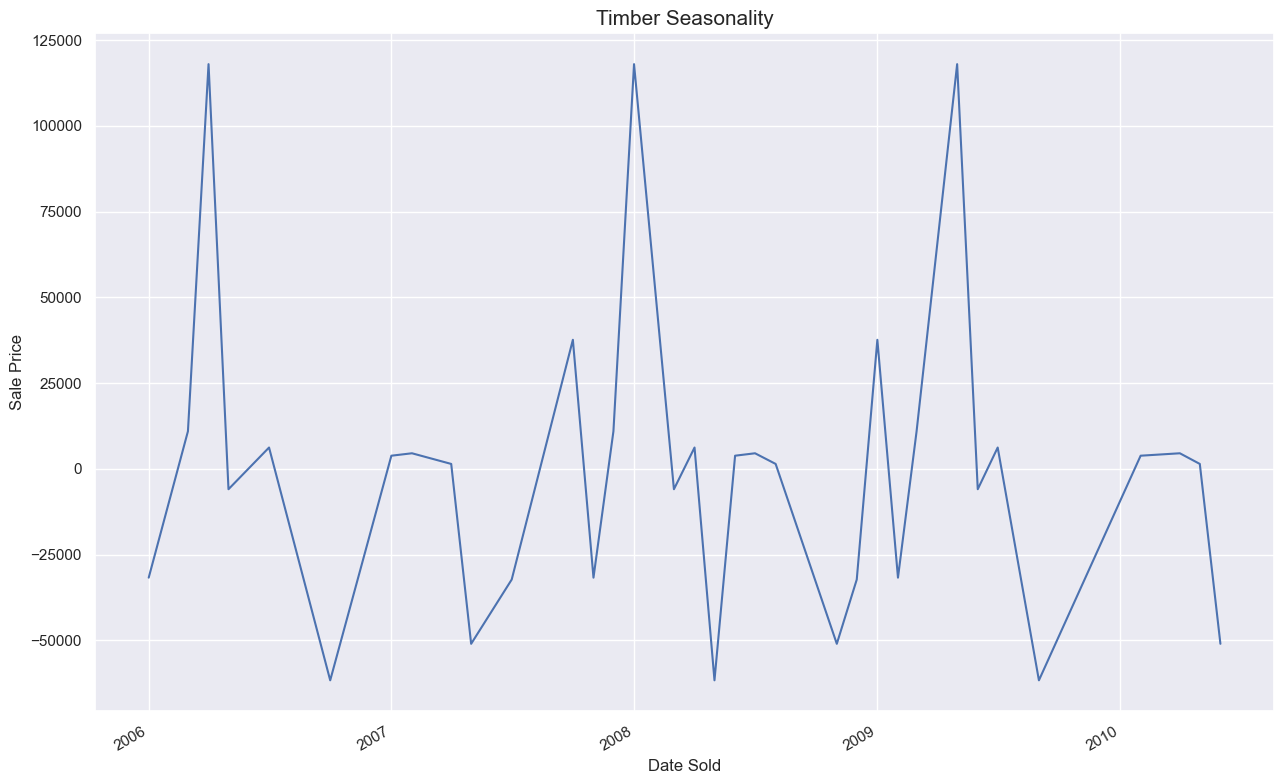

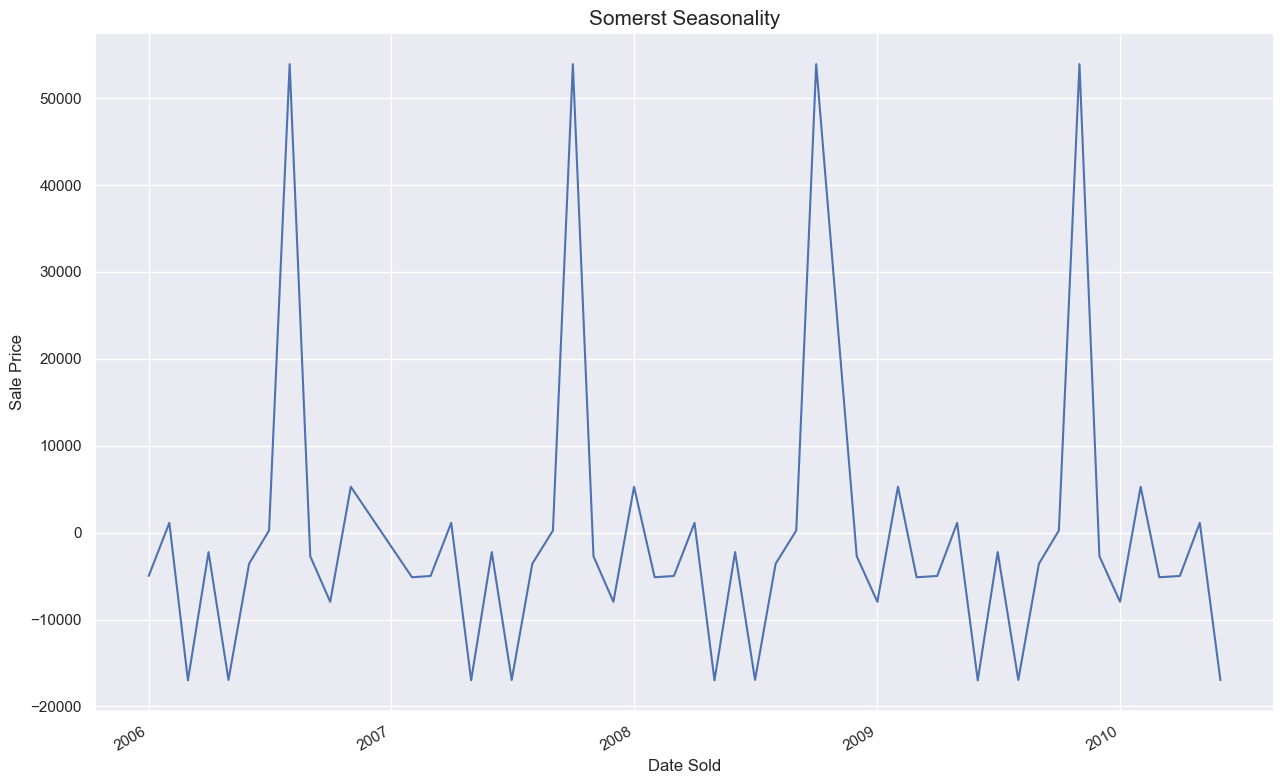

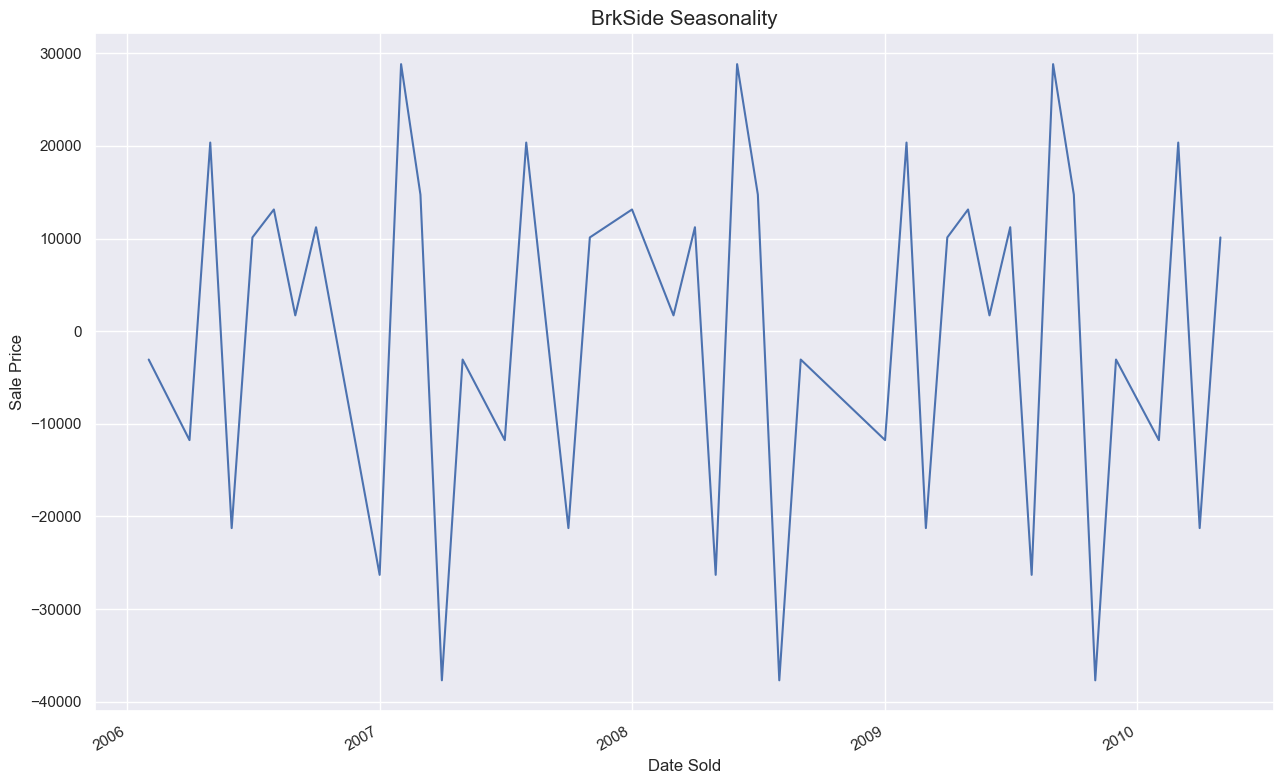

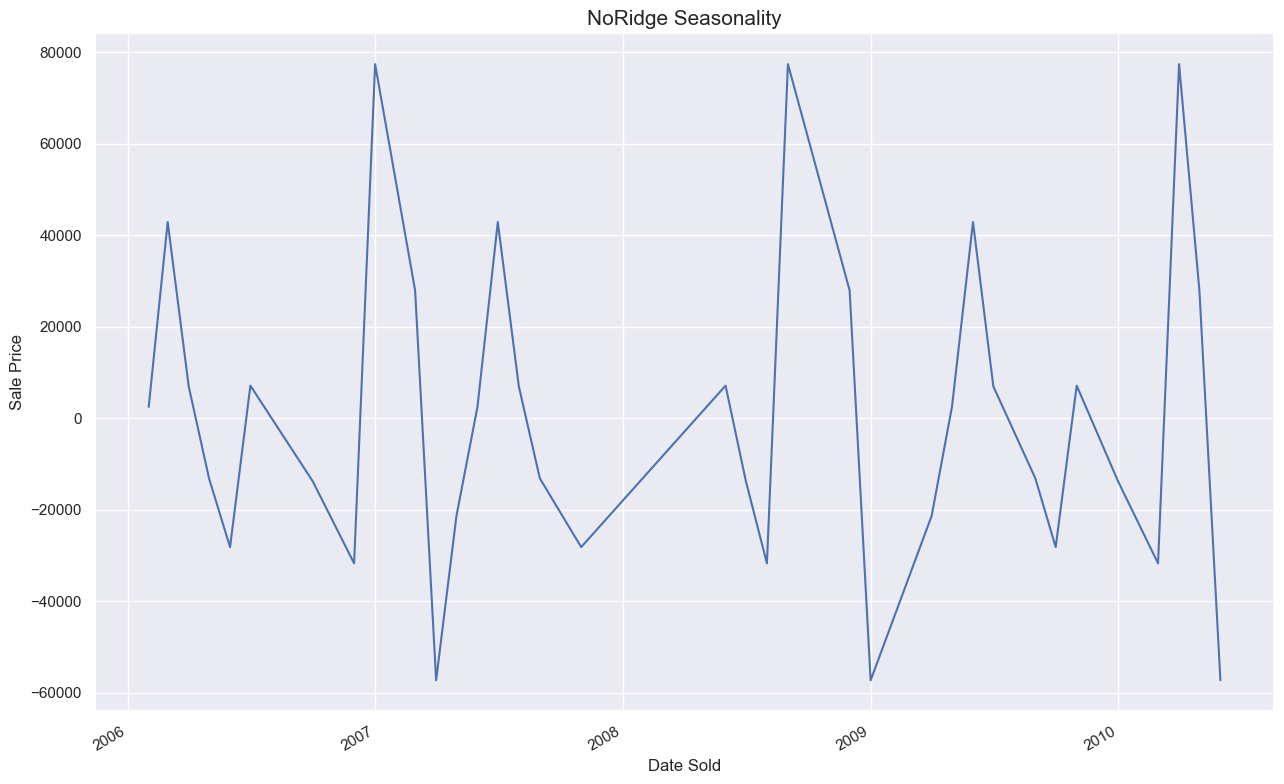

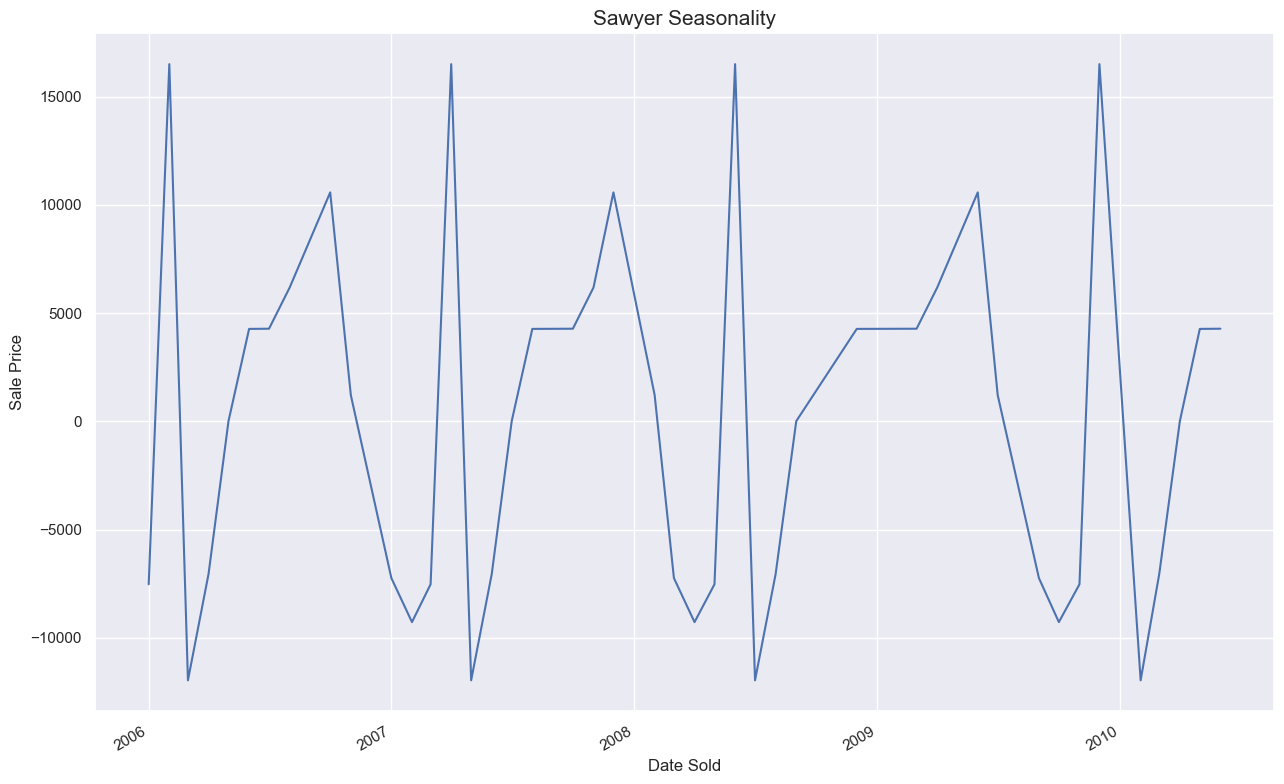

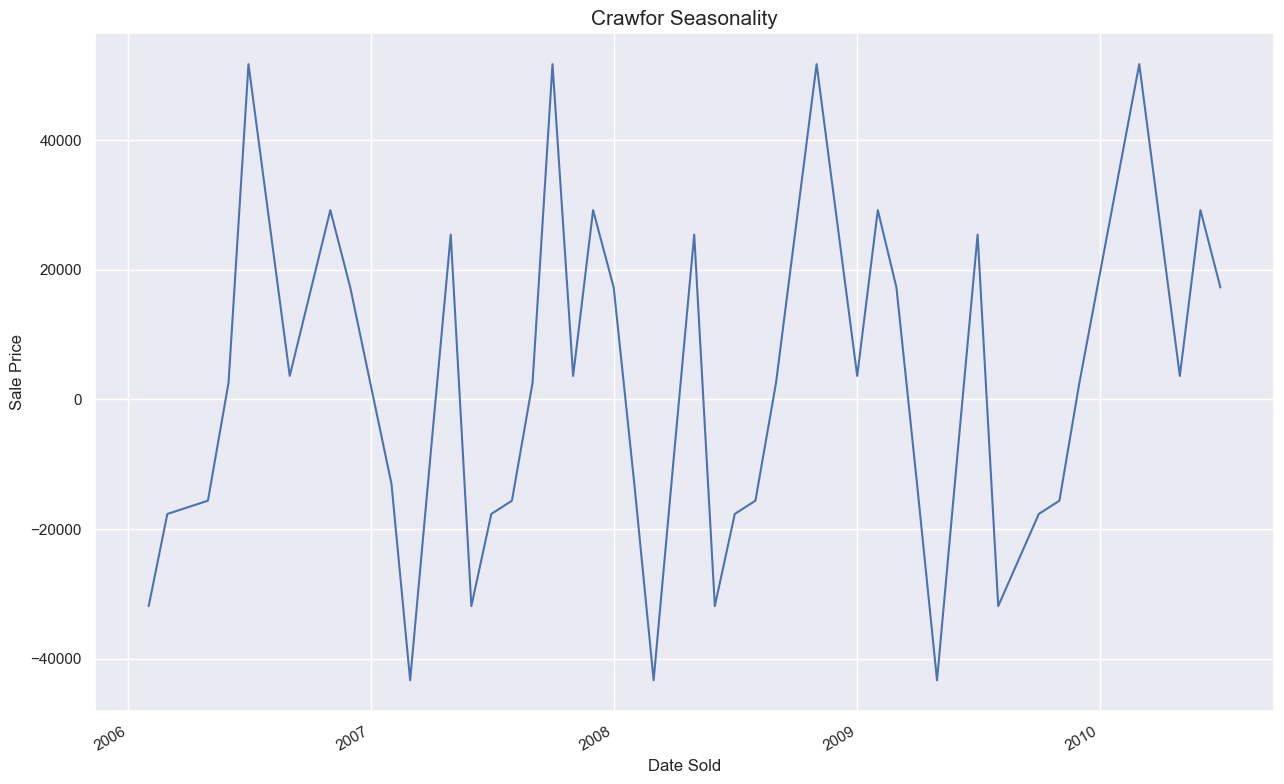

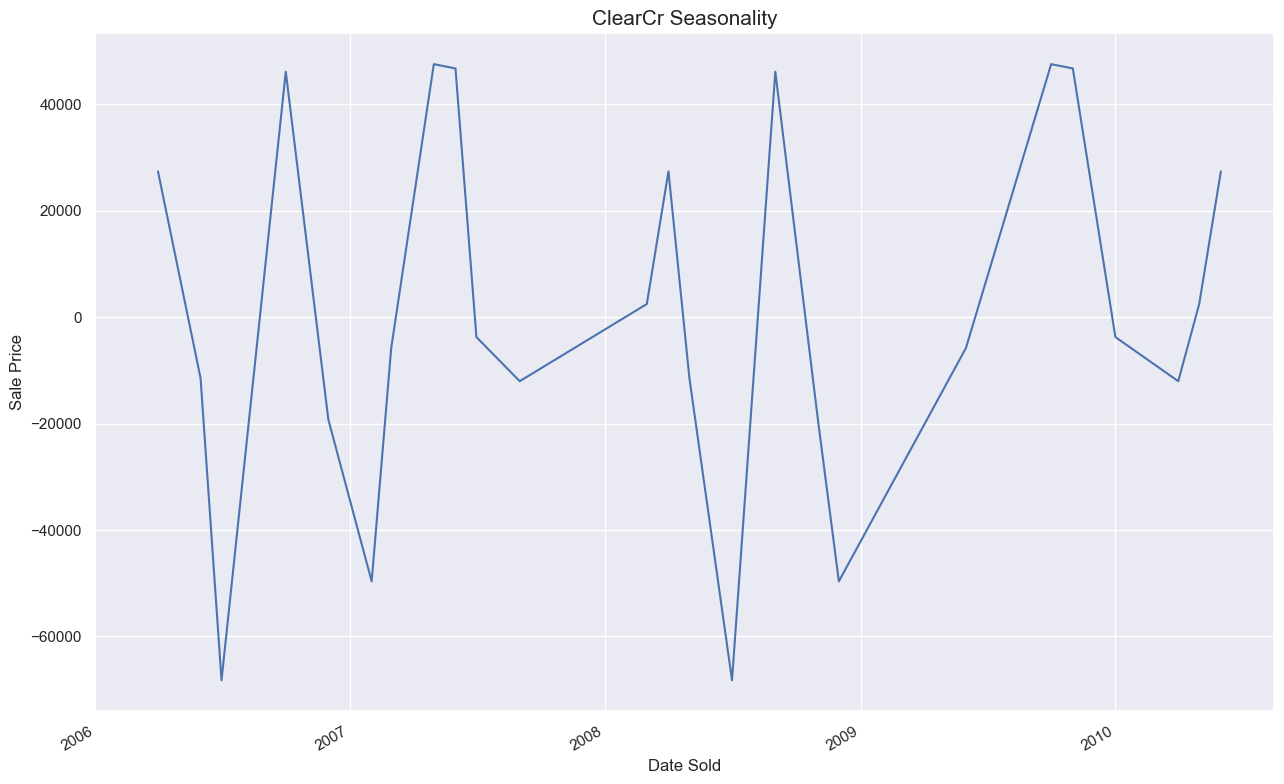

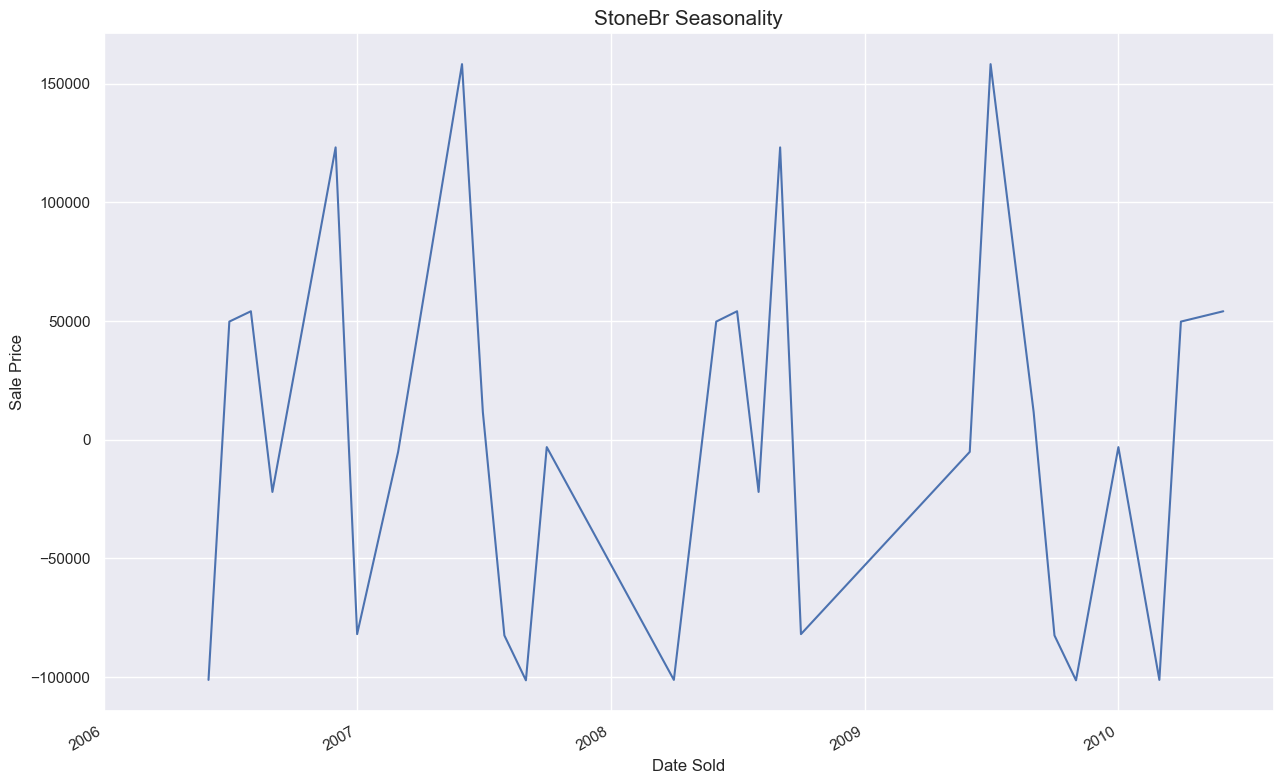

In [111]:
for neighborhood in neighborhoods:
    housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
    housing = housing[housing['Neighborhood'] == neighborhood]
    DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                            housing['MoSold'].astype(str) + '-1').rename('DateSold')

    df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
    df.rename(columns={'SalePrice': 'Observed'}, inplace=True)
    
    rcParams['figure.figsize'] = 13, 8
    decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
#     fig = decomposition.trend.plot(legend=True)
    fig = decomposition.seasonal.plot()
    fig.set(xlabel='Date Sold',
            ylabel='Sale Price',
            xticks=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01'],
            xticklabels=list(range(2006, 2011)))
    #         yticks=[2.2e5, 2.3e5, 2.4e5, 2.5e5, 2.6e5, 2.7e5],
    #         yticklabels=['220K', '230K', '240K', '250K', '260K', '270K'])
    plt.title(f'{neighborhood} Seasonality', fontsize = 15)
    plt.tight_layout()
    plt.savefig(f'../shiny/Ames_dashboard_Daniel/www/img/ts_seasonality/{neighborhood}_seasonality_prediction.png', dpi = 1000)
    plt.show()

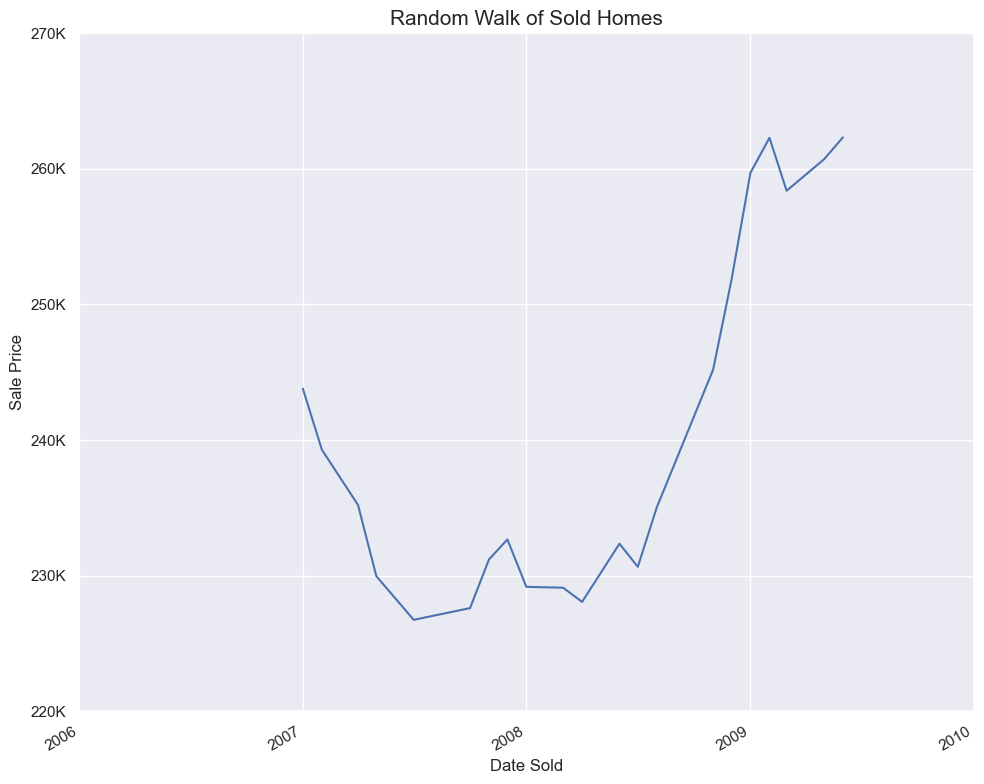

In [85]:
fig = decomposition.trend.plot()
fig.set(xlabel='Date Sold',
        ylabel='Sale Price',
        xticks=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01'],
        xticklabels=list(range(2006, 2011)),
        yticks=[2.2e5, 2.3e5, 2.4e5, 2.5e5, 2.6e5, 2.7e5],
        yticklabels=['220K', '230K', '240K', '250K', '260K', '270K'])
plt.title('Ames Trend', fontsize = 15)
plt.tight_layout()
plt.savefig('../shiny/Ames_dashboard_Daniel/www/img/ts_trend/ames_trend_prediction.png', dpi = 1000)
plt.show()

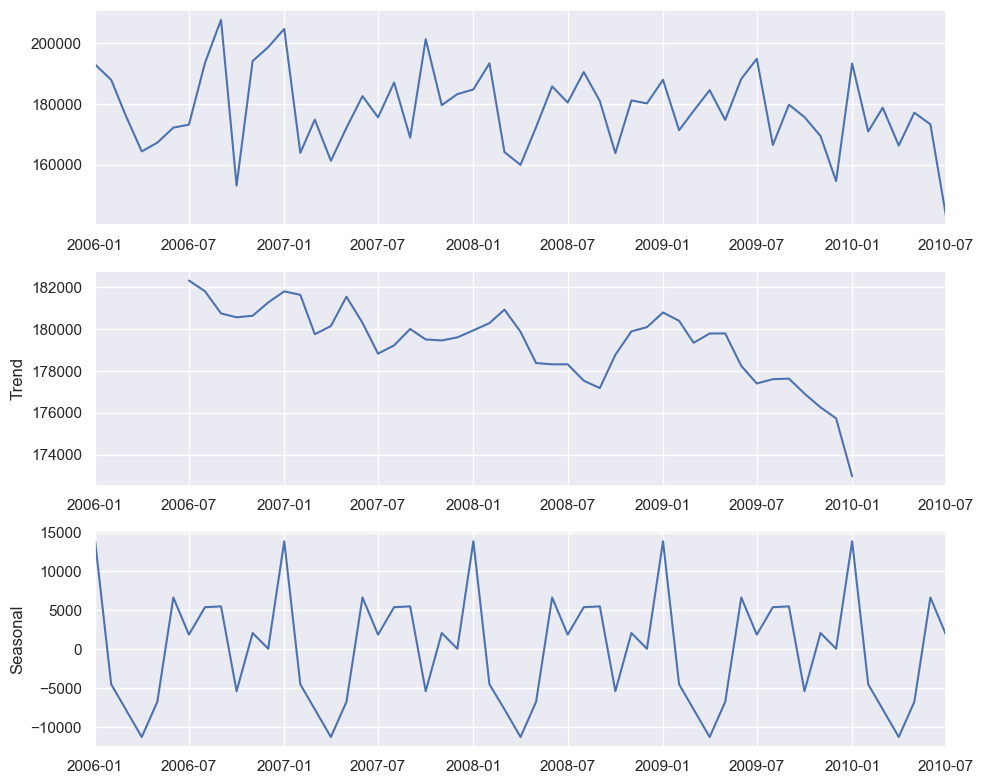

In [64]:
rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
fig = decomposition.plot(resid=False)
plt.savefig(f'../visualizations/ames_trend_seasonality_residuality.png', dpi = 600)
plt.show()

# there's a clear trend downwards -- this is probably due to the housing crisis
# we can also clearly see a seasonality trend
# residuals all look normalized, for the most part

In [65]:
# lets find the best parameters with the lowest AIC score and lowest MSE

optimal_sarima = 1e6
pdq = []
seasonal_pdq = []

for arima, sarima, aic in results:
    if aic < optimal_sarima:
        optimal_sarima = aic
        pdq = arima
        seasonal_pdq = sarima
    else:
        continue
        
print(f'arima: {pdq}, sarima: {seasonal_pdq}, AIC: {optimal_sarima}')

NameError: name 'results' is not defined

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
result = mod.fit(disp=False)
print(result.summary().tables[1])

In [ ]:
result.plot_diagnostics()
plt.savefig(f'../visualizations/ames_result_plots.png', dpi = 600)
plt.show()

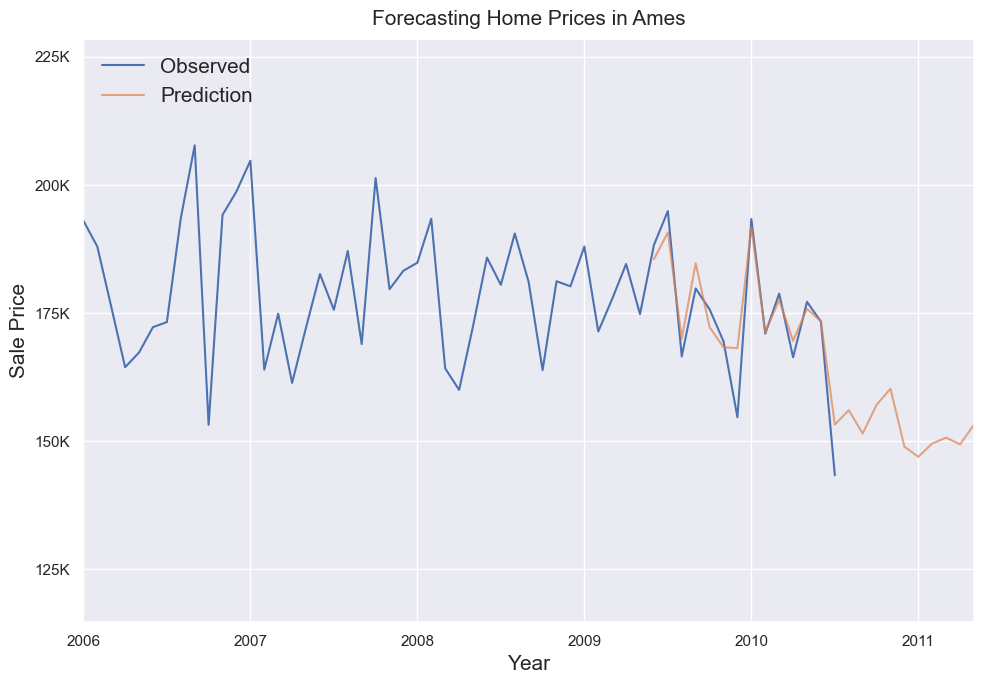

In [15]:
sns.set(rc = {'figure.figsize':(15, 7)})
# sns.set_style('white')
# plt.style.use("darkgrid")
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
result = mod.fit(disp=False)

predict = result.get_prediction(start=pd.to_datetime('2009-06-01'), dynamic=False)
forecast = result.get_forecast(steps=10)

forecast_dates = pd.date_range(predict.predicted_mean.index[len(predict.predicted_mean)-1], 
                  freq='MS', periods=len(forecast.predicted_mean)).shift(1)

ci = predict.conf_int().append(forecast.conf_int().set_axis(forecast_dates))
pred = predict.predicted_mean.append(forecast.predicted_mean.set_axis(forecast_dates))
fig = df.plot(label='Observed')

predicted_mean = pred.shift(-1)
predicted_mean.iloc[len(predicted_mean)-1] = result.forecast(1)
predicted_mean.plot(ax=fig, label='Prediction', alpha=.7, figsize=(10, 7))

# fig.fill_between(ci.index,
#                 ci.iloc[:, 0],
#                 ci.iloc[:, 1], color='blue', alpha=.2)

fig.set(ylim = (min(df['Observed']) - 0.2*min(df['Observed']), 
                max(df['Observed']) + 0.1*max(df['Observed'])),
        yticks = [1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5],
        yticklabels = ['125K', '150K', '175K', '200K', '225K'])

plt.title('Forecasting Home Prices in Ames', fontsize = 15, pad=10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
plt.legend(frameon=False, prop={'size': 15}, loc='upper left')
plt.tight_layout()
plt.savefig(f'../shiny/visualizations/test.png', dpi = 600)

plt.show()

### Grid Search for Neighborhoods

In [46]:
neighborhoods = ['SWISU', 'Edwards', 'IDOTRR', 'OldTown', 'NWAmes', 
                 'Mitchel', 'NridgHt', 'NAmes', 'CollgCr', 'SawyerW', 
                 'Gilbert', 'Timber', 'Somerst', 'BrkSide', 'NoRidge',
                 'Sawyer', 'Crawfor', 'ClearCr', 'StoneBr']

not_enough_data = ['Veenker', 'NPkVill', 'Blueste', 'Greens', 
                   'MeadowV', 'BrDale', 'Blmngtn']

In [47]:
for neighborhood in neighborhoods:

    housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
    housing = housing[housing['Neighborhood'] == neighborhood]
    DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                            housing['MoSold'].astype(str) + '-1').rename('DateSold')

    df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
    df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

    adf = sm.tsa.adfuller(df)
    print(f'{neighborhood} adf test: {adf[0]}, p-value: {adf[1]}')
    
# Gilbert and StoneBr requires additional differencing

FileNotFoundError: [Errno 2] No such file or directory: './data/Ames_Housing_Price_Data.csv'

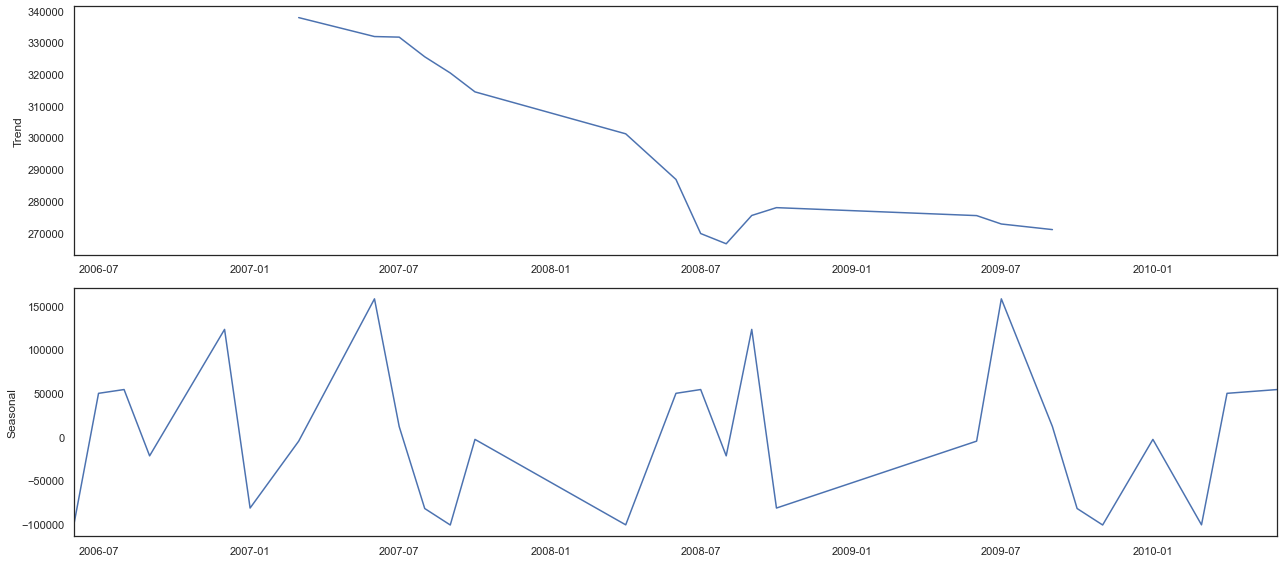

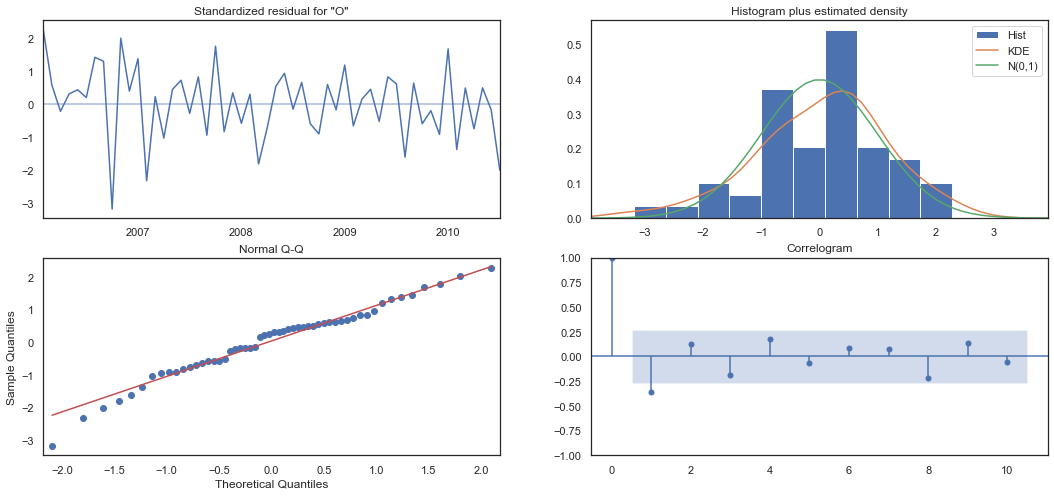

In [676]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
fig = decomposition.plot(observed = False, resid = False)
plt.show()

result.plot_diagnostics()
plt.show()

In [541]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print(f'SARIMAX: {pdq[1]} x {seasonal_pdq[1]}')
print(f'SARIMAX: {pdq[1]} x {seasonal_pdq[2]}')
print(f'SARIMAX: {pdq[2]} x {seasonal_pdq[3]}')
print(f'SARIMAX: {pdq[2]} x {seasonal_pdq[4]}')

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 10)
SARIMAX: (0, 0, 1) x (0, 1, 0, 10)
SARIMAX: (0, 1, 0) x (0, 1, 1, 10)
SARIMAX: (0, 1, 0) x (1, 0, 0, 10)


In [61]:
neighborhood_params = {
    'SWISU': [(1, 1, 1), (1, 0, 1, 4), True, True, '2009-07-01',
             [6e4, 8e4, 1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5, 2e5],
             ['60K', '80K', '100K', '120K', '140K', '160K', '180K', '200K']],
    'Edwards': [(0, 1, 0), (1, 1, 1, 8), True, True, '2009-07-01',
               [5e4, 1e5, 1.5e5, 2e5, 2.5e5, 3e5],
               ['50K', '100K', '150K', '200K', '250K', '300K']],
    'IDOTRR': [(1, 0, 0), (1, 0, 1, 10), True, True, '2009-07-01',
              [5e4, 7.5e4, 1e5, 1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5],
              ['50K', '75K', '100K', '125K', '150K', '175K', '200K', '225K']],
    'OldTown': [(1, 1, 0), (1, 0, 1, 8), True, True, '2009-07-01',
               [8e4, 1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5],
               ['80K', '100K', '120K', '140K', '160K', '180K']],
    'NWAmes': [(1, 1, 0), (1, 0, 0, 10), True, False, '2009-07-01',
              [1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5, 2.5e5, 2.75e5, 3e5],
              ['125K', '150K', '175K', '200K', '225K', '250K', '275K', '300K']],
    'Mitchel': [(1, 0, 0), (0, 0, 1, 10), True, True, '2009-07-01',
                [1e5, 1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5, 2.5e5], 
                ['100K', '125K', '150K', '175K', '200K', '225K', '250K']],
    'NridgHt': [(1, 0, 0), (1, 0, 1, 11), True, False, '2009-07-01',
               [2e5, 2.5e5, 3e5, 3.5e5, 4e5, 4.5e5],
               ['200K', '250K', '300K', '350K', '400K', '450K']],
    'NAmes': [(0, 1, 0), (1, 1, 0, 12), False, False, '2009-07-01',
             [1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5],
             ['100K', '120K', '140K', '160K', '180K']],
    'CollgCr': [(0, 1, 1), (0, 1, 1, 12), True, True, '2009-07-01',
               [1.25e5, 1.75e5, 2.25e5, 2.75e5, 3.25e5],
               ['125K', '175K', '225K', '275K', '325K']],
    'SawyerW': [(0, 1, 0), (0, 1, 0, 8), True, True, '2009-07-01',
               [1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5, 2.5e5, 2.75e5],
               ['125K', '150K', '175K', '200K', '225K', '250K', '275K']],
    'Gilbert': [(0, 1, 0), (0, 1, 1, 10), True, True, '2009-07-01',
               [1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5, 2.5e5, 2.75e5, 3e5],
               ['125K', '150K', '175K', '200K', '225K', '250K', '275K', '300K']],
    'Timber': [(1, 1, 0), (1, 0, 1, 12), True, True, '2009-07-01',
              [1.5e5, 2e5, 2.5e5, 3e5, 3.5e5, 4e5, 4.5e5],
              ['150K', '200K', '250K', '300K', '350K', '400K', '450K']],
    'Somerst': [(0, 1, 0), (0, 0, 1, 10), True, True, '2009-07-01',
               [1.5e5, 2e5, 2.5e5, 3e5, 3.5e5, 4e5, 4.5e5],
               ['150K', '200K', '250K', '300K', '350K', '400K', '450K']],
    'BrkSide': [(0, 1, 0), (1, 0, 1, 12), False, True, '2009-07-01',
               [4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5],
               ['40K', '60K', '80K', '100K', '120K', '140K', '160K', '180K']],
    'NoRidge': [(1, 1, 0), (1, 0, 0, 11), False, True, '2009-07-01',
               [2.5e5, 3e5, 3.5e5, 4e5, 4.5e5, 5e5, 5.5e5, 6e5],
               ['250K', '300K', '350K', '400K', '450K', '500K', '550K', '600K']],
    'Sawyer': [(0, 1, 1), (0, 0, 1, 8), True, False, '2009-07-01',
              [6e4, 8e4, 1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5, 2e5],
              ['60K', '80K', '100K', '120K', '140K', '160K', '180K', '200K']],
    'Crawfor': [(0, 1, 0), (0, 0, 1, 9), True, True, '2009-07-01',
               [1.25e5, 1.5e5, 1.75e5, 2e5, 2.25e5, 2.5e5, 2.75e5, 3e5, 3.25e5],
               ['125K', '150K', '175K', '200K', '225K', '250K', '275K', '300K', '325K']],
    'ClearCr': [(0, 1, 0), (0, 0, 1, 10), False, False, '2009-06-01',
               [1e5, 1.5e5, 2e5, 2.5e5, 3e5],
               ['100K', '150K', '200K', '250K', '300K']],
    'StoneBr': [(0, 1, 0), (0, 0, 1, 9), True, False, '2009-07-01',
               [2e5, 3e5, 4e5, 5e5, 6e5],
               ['200K', '300K','400K', '500K', '600K']],
    'Veenker': [[1.5e5, 2e5, 2.5e5, 3e5, 3.5e5, 4e5], 
                ['150K', '200K', '250K', '300K', '350K', '400K']],
    'NPkVill': [[1.2e5, 1.3e5, 1.4e5, 1.5e5, 1.6e5], 
                ['120K', '130K', '140K', '150K', '160K']],
    'Blueste': [[1.2e5, 1.4e5, 1.6e5, 1.8e5, 2e5], 
                ['120K', '140K', '160K', '180K', '200K']],
    'Greens': [[1.5e5, 1.75e5, 2e5, 2.25e5], 
               ['150K', '175K', '200K' ,'225K']],
    'MeadowV': [[5e4, 7.5e4, 1e5, 1.25e5, 1.5e5], 
                ['50K', '75K', '100K', '125K', '150K']],
    'BrDale': [[8e4, 1e5, 1.2e5, 1.4e5], 
               ['80K', '100K', '120K', '140K']],
    'Blmngtn': [[1.5e5, 1.75e5, 2e5, 2.25e5, 2.5e5], 
                ['150K', '175K', '200K', '225K', '250K']]
    }

In [20]:
for neighborhood in 'NWAmes':
    housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
    housing = housing[housing['Neighborhood'] == neighborhood]
    DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                            housing['MoSold'].astype(str) + '-1').rename('DateSold')

    df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
    df.rename(columns={'SalePrice': 'Observed'}, inplace=True)
    
    rcParams['figure.figsize'] = 10, 8
    


In [35]:
neighborhood = 'NWAmes'

housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
housing = housing[housing['Neighborhood'] == neighborhood]
DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                        housing['MoSold'].astype(str) + '-1').rename('DateSold')

df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

dsm.tsa.seasonal_decompose(df, model='additive', period=12)

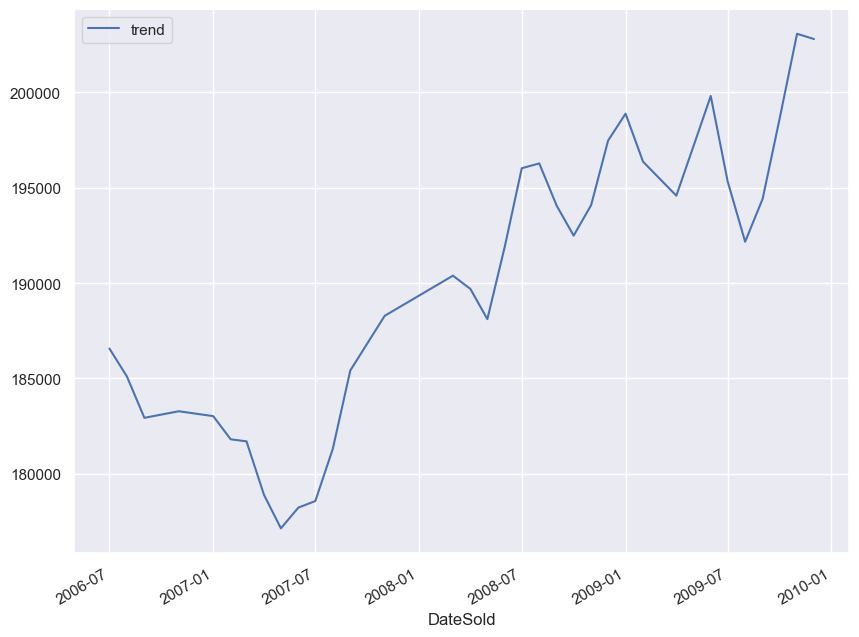

In [36]:
housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
housing = housing[housing['Neighborhood'] == 'NWAmes']
DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                        housing['MoSold'].astype(str) + '-1').rename('DateSold')

df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

# rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
fig = decomposition.trend.plot(legend=True)

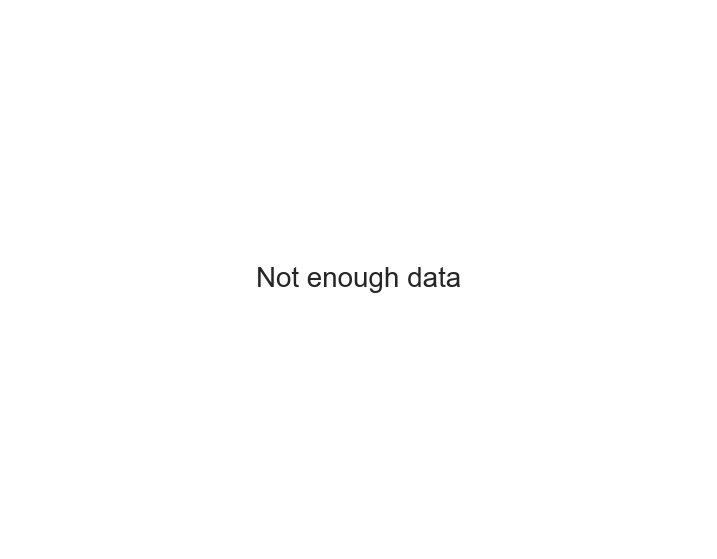

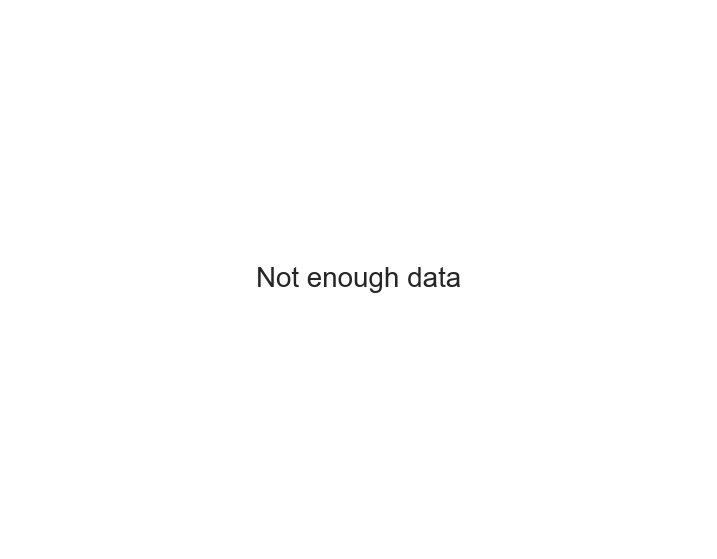

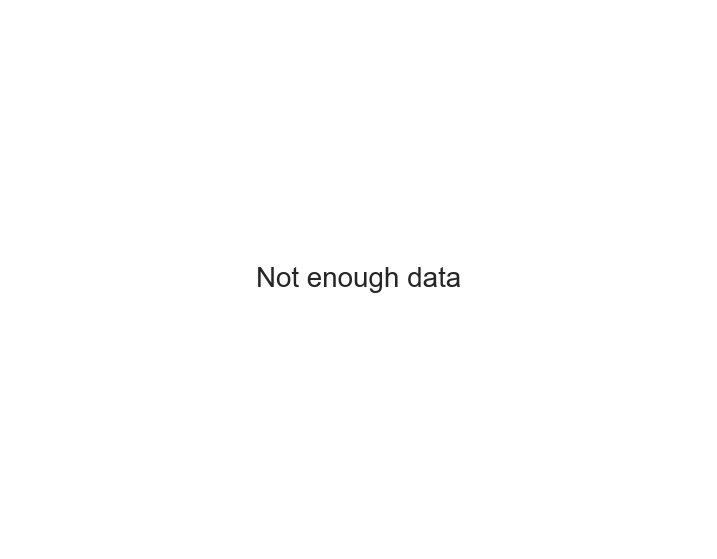

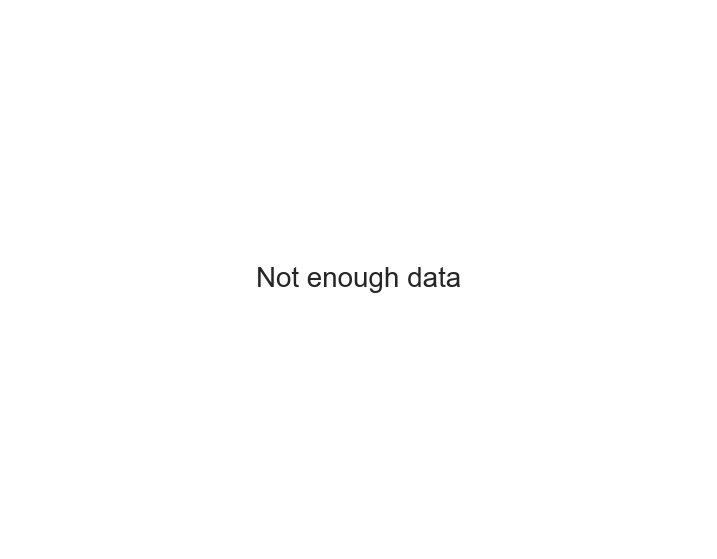

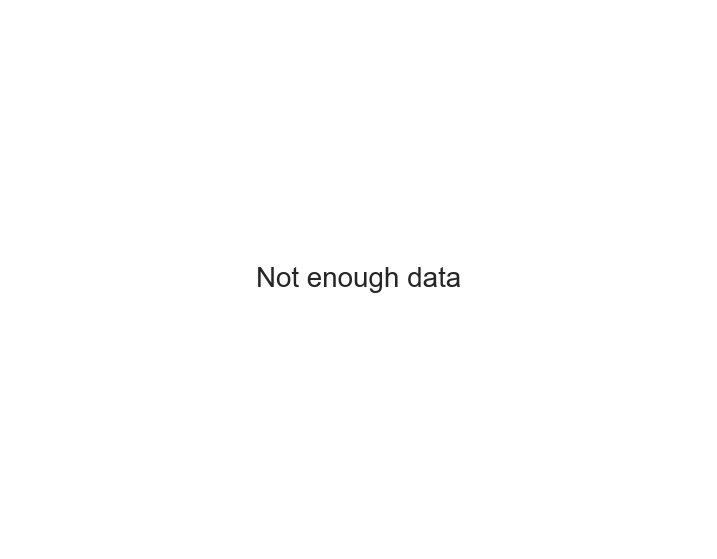

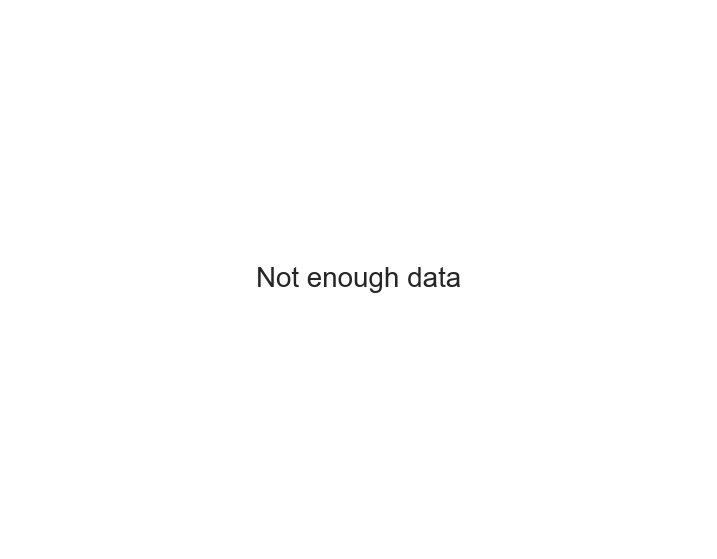

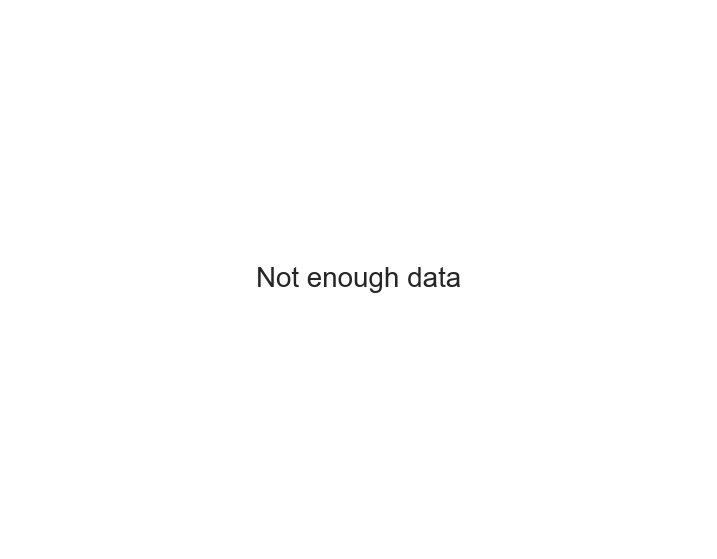

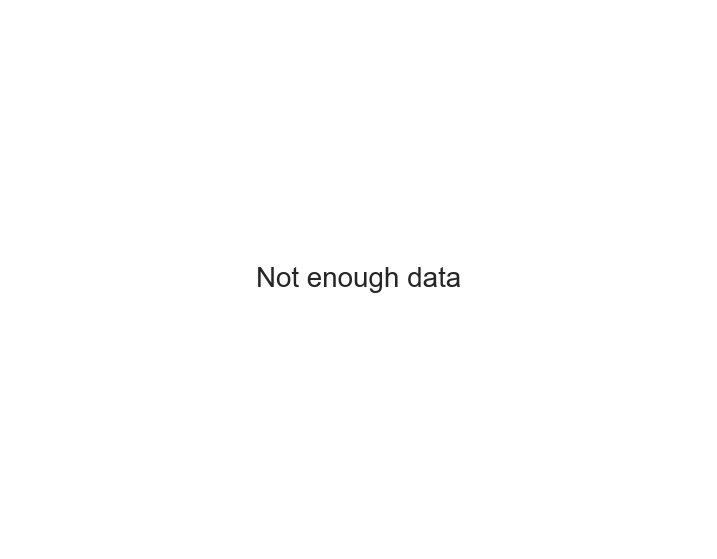

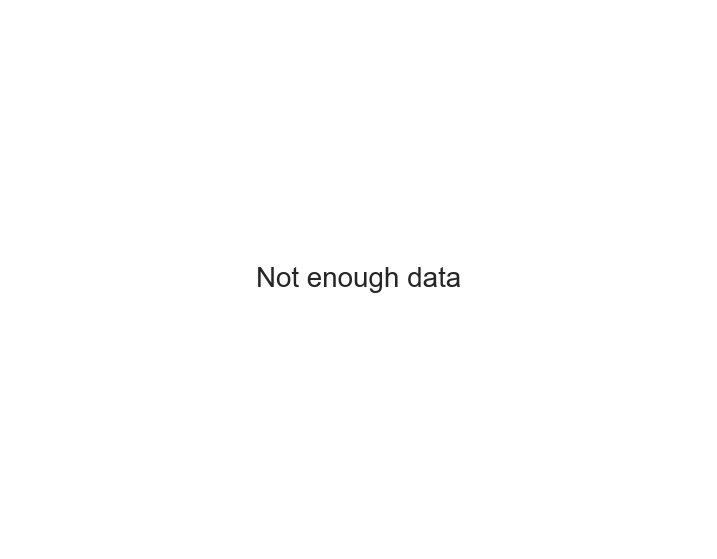

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
rcParams['figure.figsize'] = 9, 7

for nb in didnt_work:
    fig = plt.figure()
    # Create a blank plot
    # plt.figure(figsize=(6,6))
    plt.axis('off')
    # fig.set(
    #     yticks = [0, 0.2, 0.4, 0.6, 0.8, 1],
    #     yticklabels = ['', '', '', '', '', '']
    #    )

    
    sns.despine(left=True, right=True, top=True, bottom=True)
    # Add the "not enough data" annotation
    plt.text(0.5, 0.5, "Not enough data", ha='center', va='center', fontsize=20)

    # Show the plot
    plt.savefig(f'../shiny/www/img/trends/{nb}.png', dpi = 600)

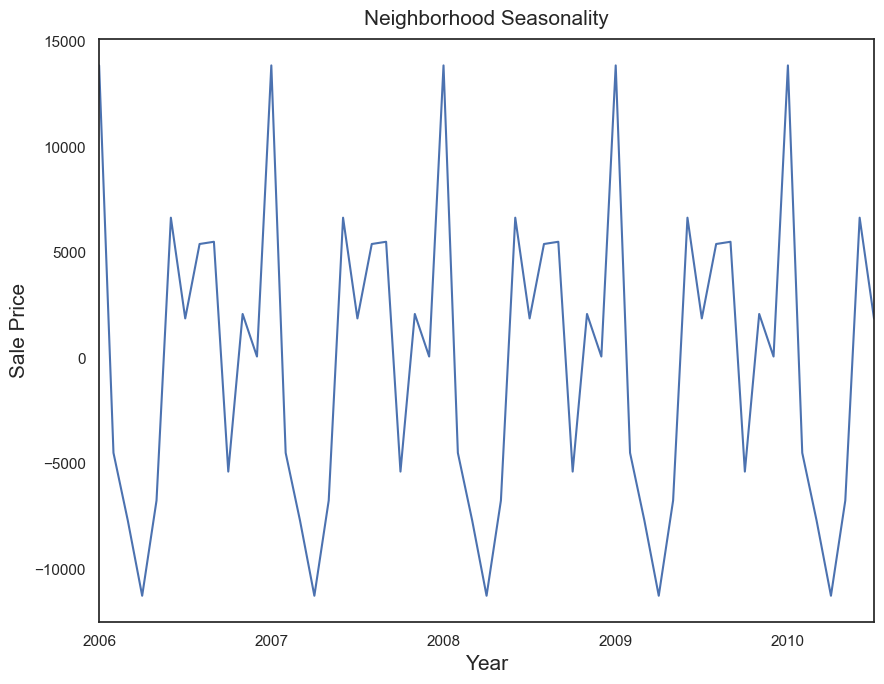

In [108]:
sns.set_style('white')
rcParams['figure.figsize'] = 9, 7
fig = plt.figure()

housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
#         housing = housing[housing['Neighborhood'] == neighborhood]
DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                        housing['MoSold'].astype(str) + '-1').rename('DateSold')

df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

rcParams['figure.figsize'] = 9, 7
decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
fig = decomposition.seasonal.plot(legend=False)

# fig.set(
#     yticks = neighborhood_params[neighborhood][-2],
#     yticklabels = neighborhood_params[neighborhood][-1]
#        )

plt.title(f'Neighborhood Seasonality', fontsize = 15, pad=10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sale Price', fontsize = 15)
# plt.legend(['All Neighborhoods'], frameon=False, prop={'size': 15}, loc='upper right')
plt.tight_layout()
plt.savefig(f'../shiny/www/img/season/All_Neighborhoods.png', dpi = 600)

In [102]:
didnt_work_trend

['Blmngtn',
 'MeadowV',
 'BrDale',
 'Greens',
 'GrnHill',
 'Veenker',
 'NPkVill',
 'Blueste',
 'Landmrk']

In [109]:
didnt_work

['Blmngtn',
 'MeadowV',
 'BrDale',
 'Greens',
 'GrnHill',
 'Veenker',
 'NPkVill',
 'Blueste',
 'Landmrk']

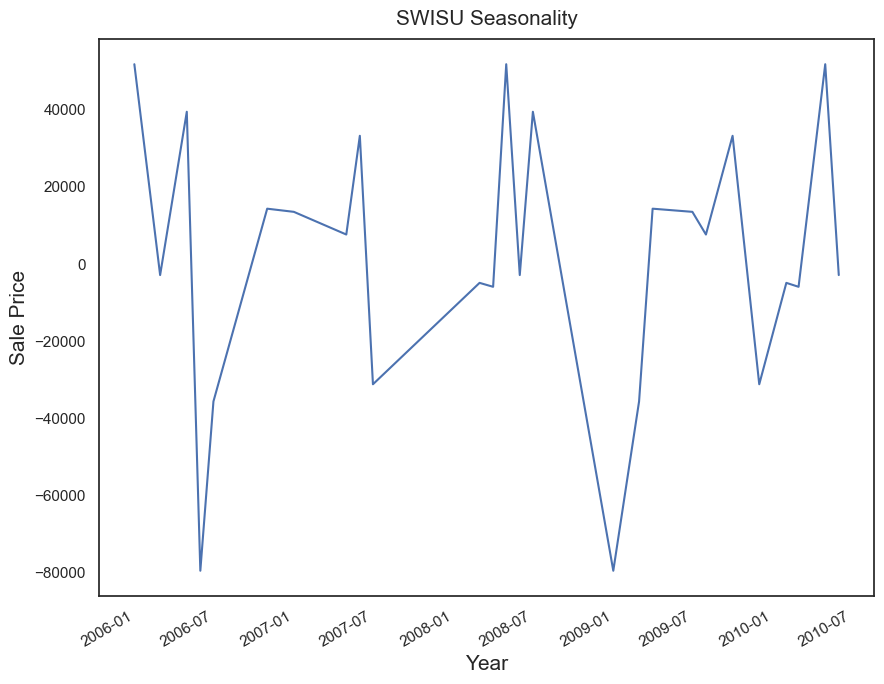

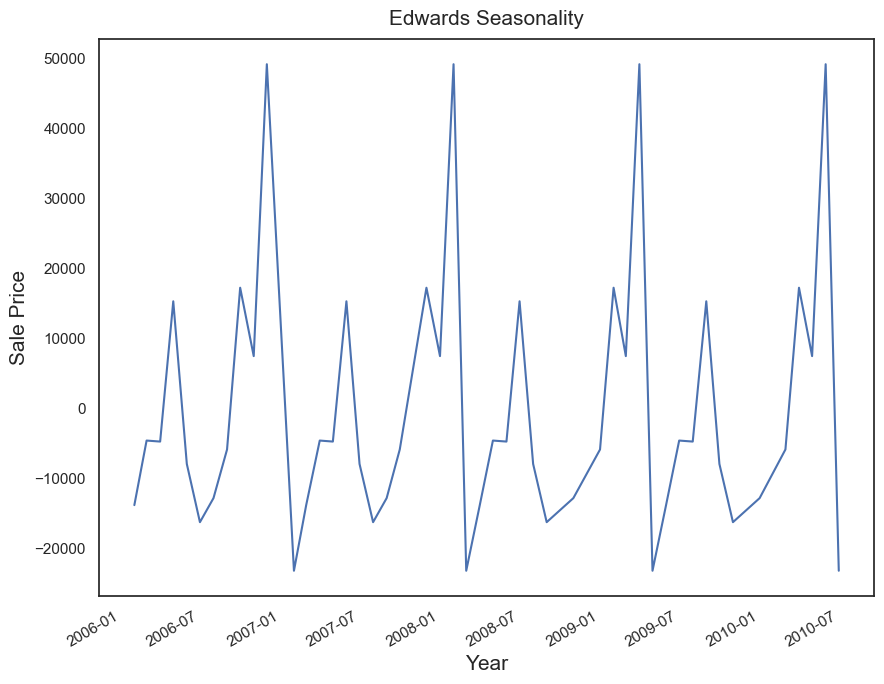

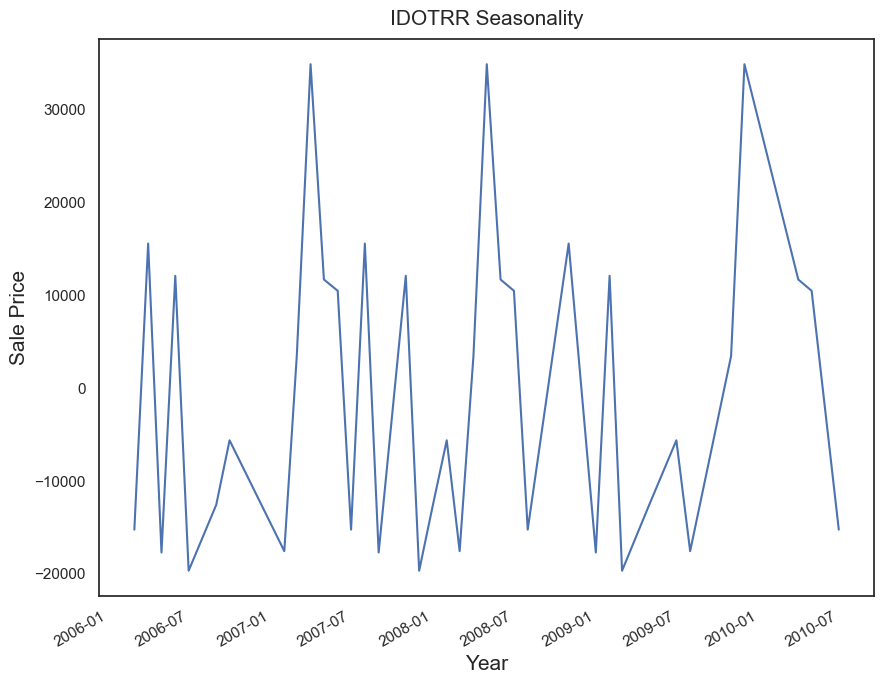

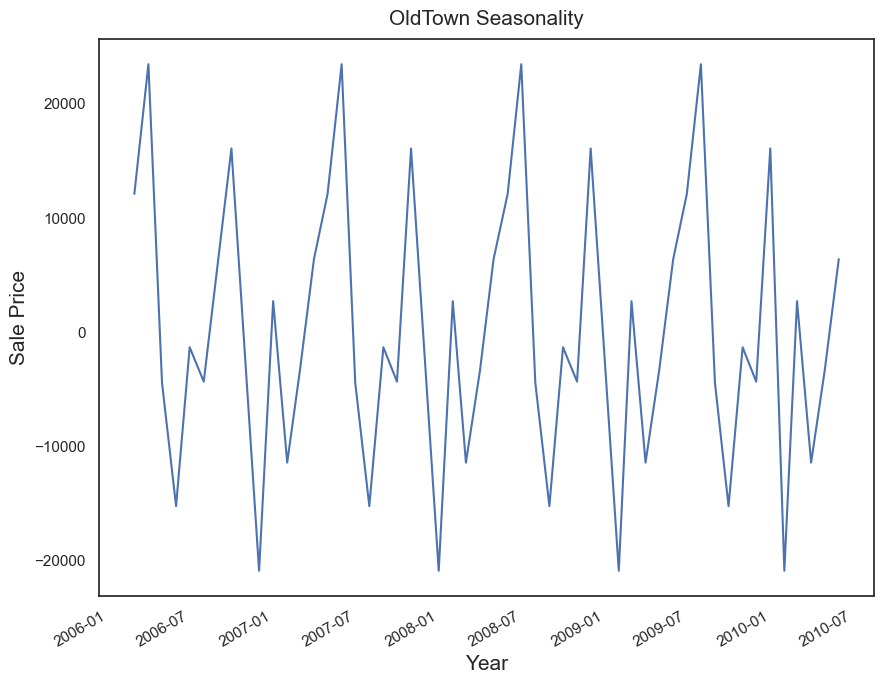

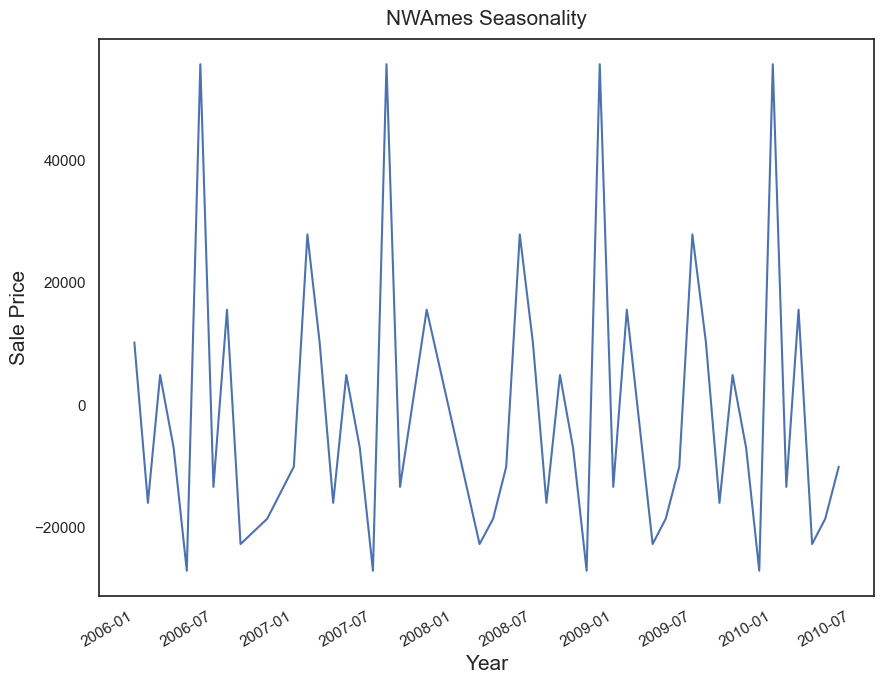

<Figure size 900x700 with 0 Axes>

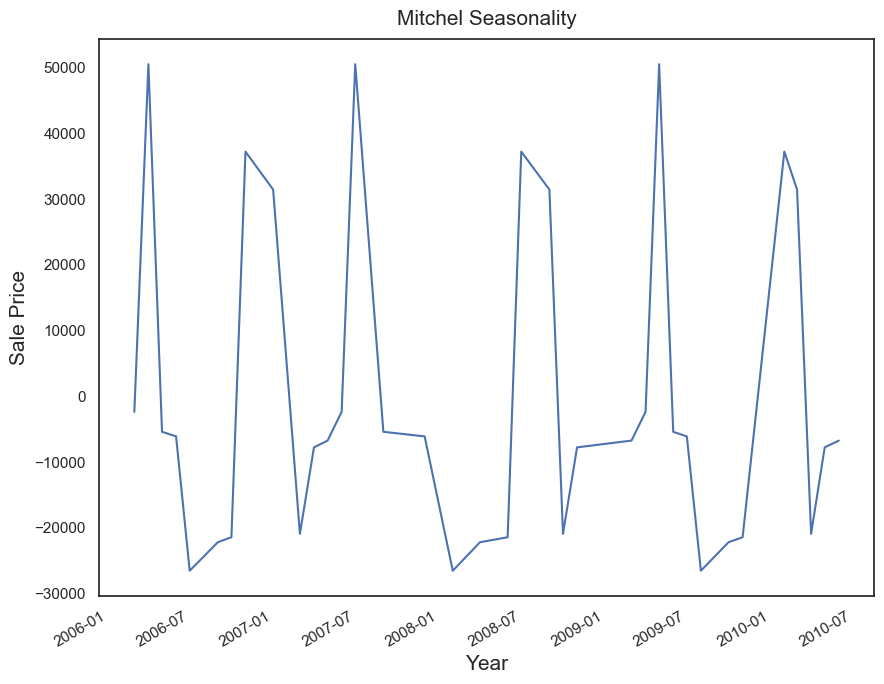

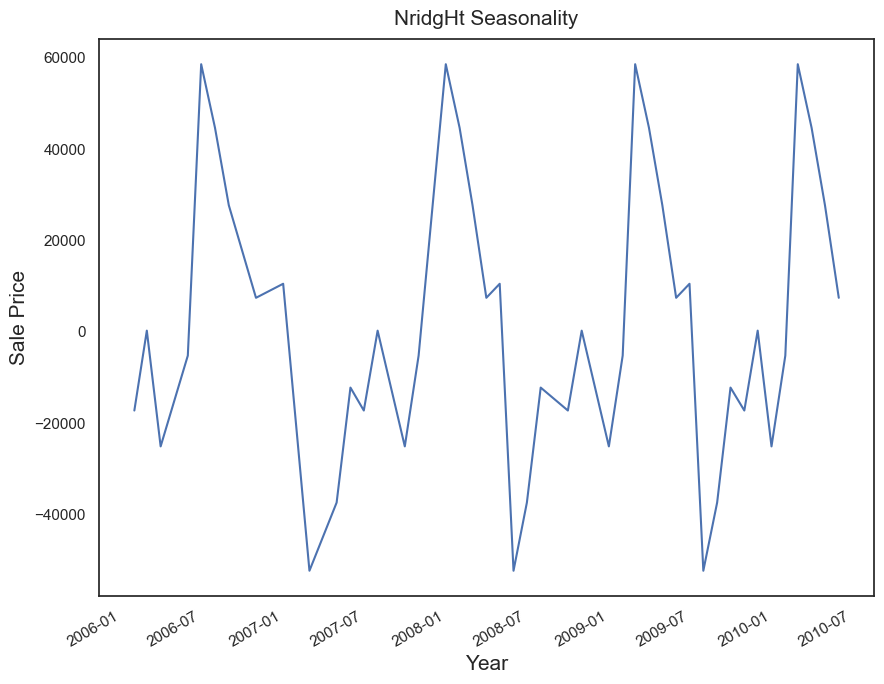

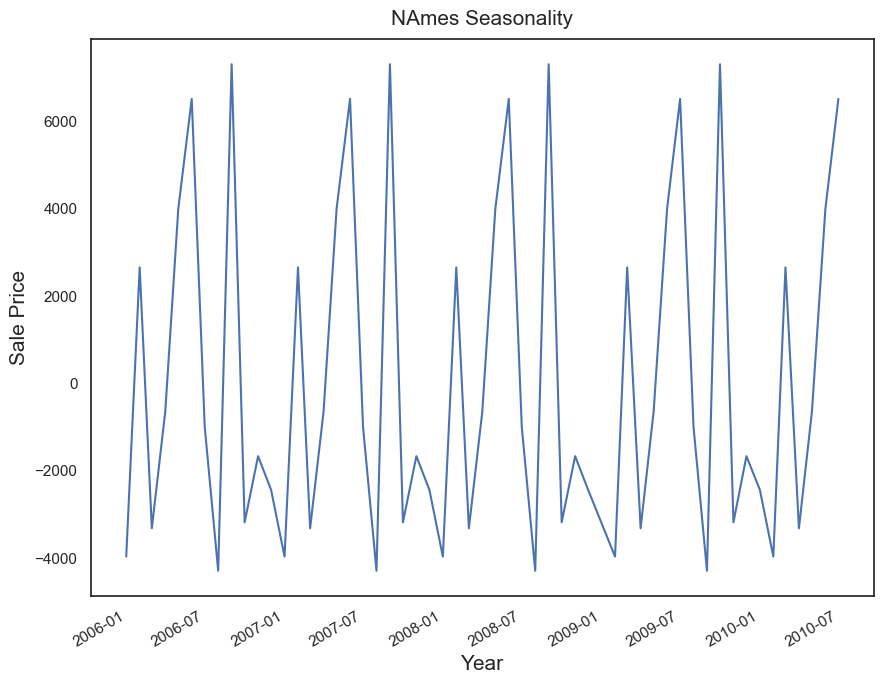

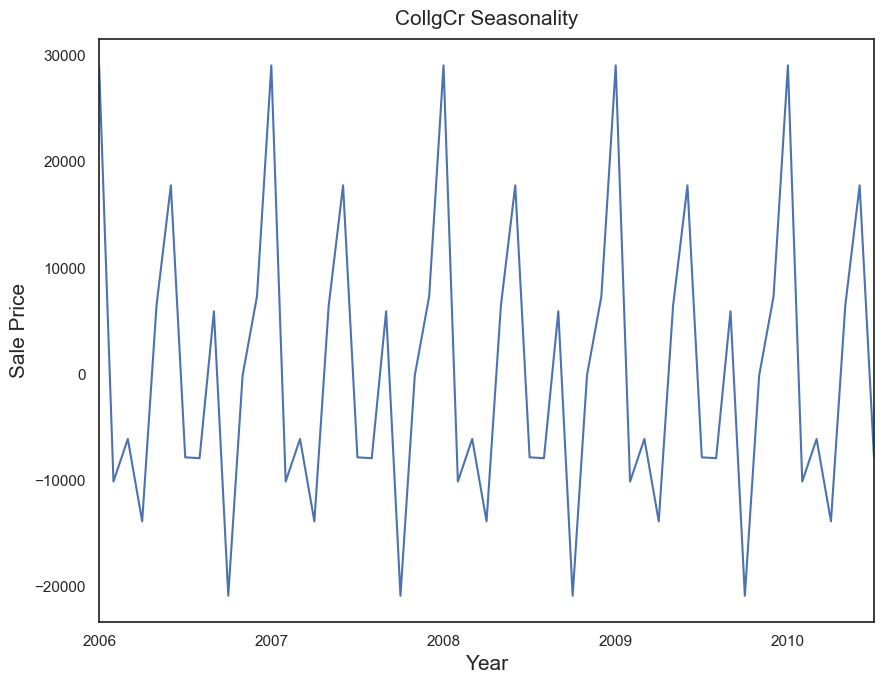

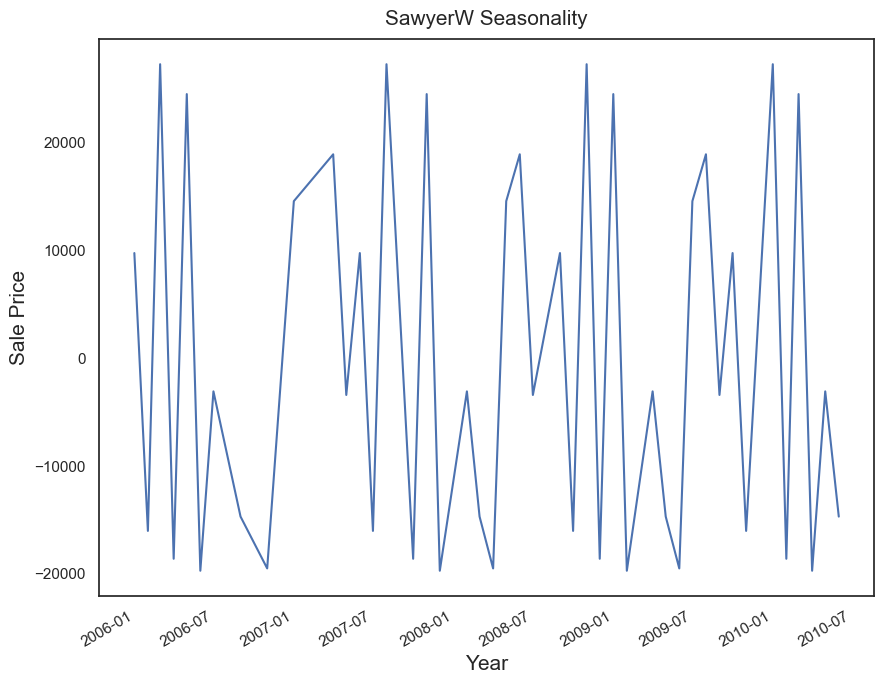

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

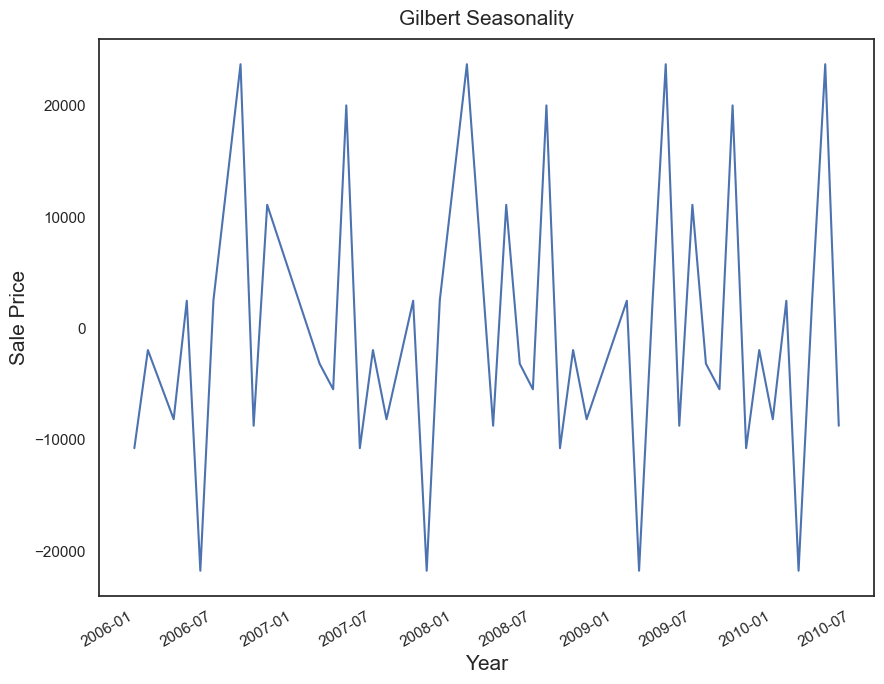

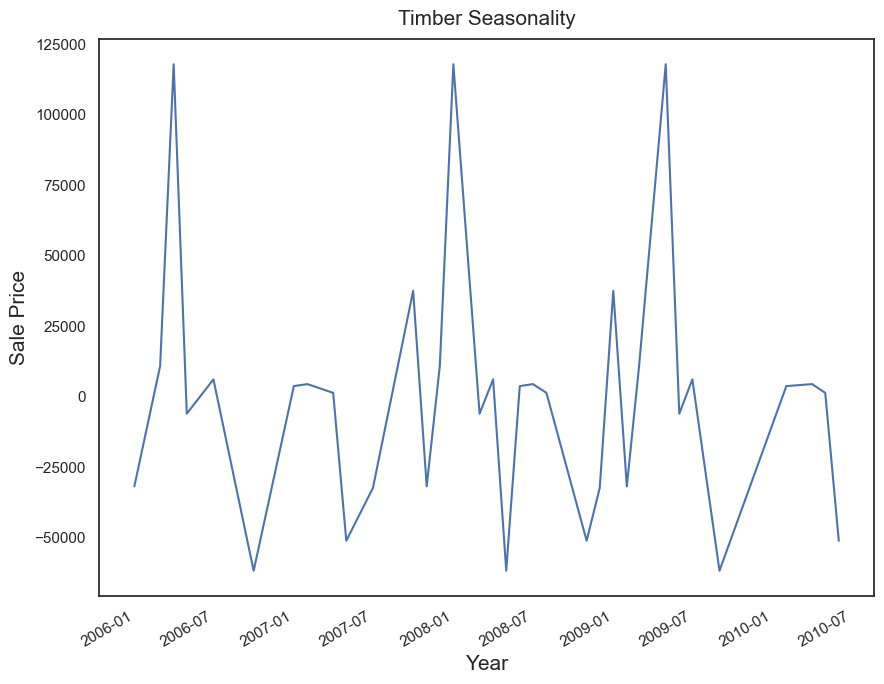

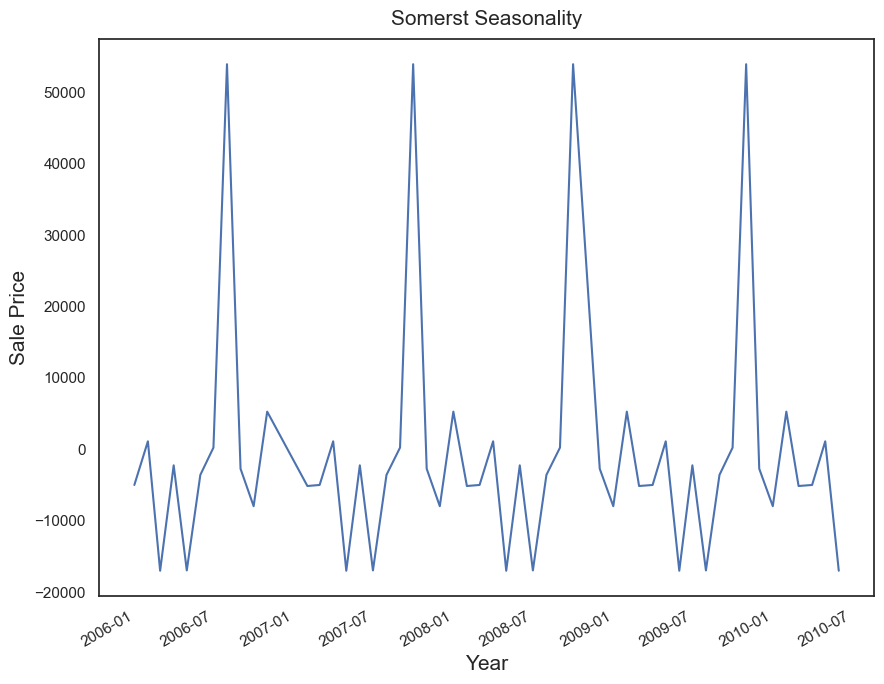

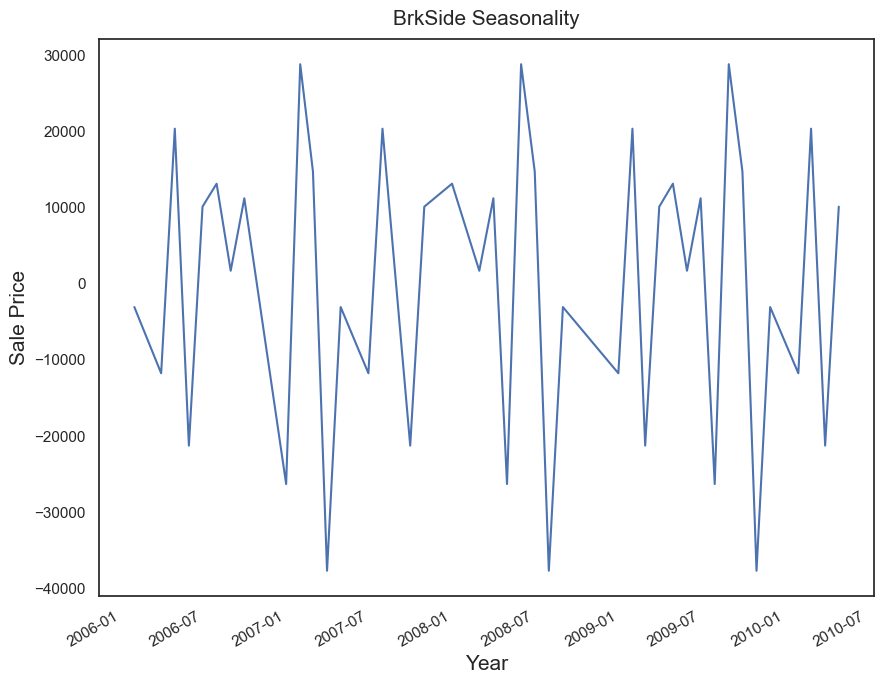

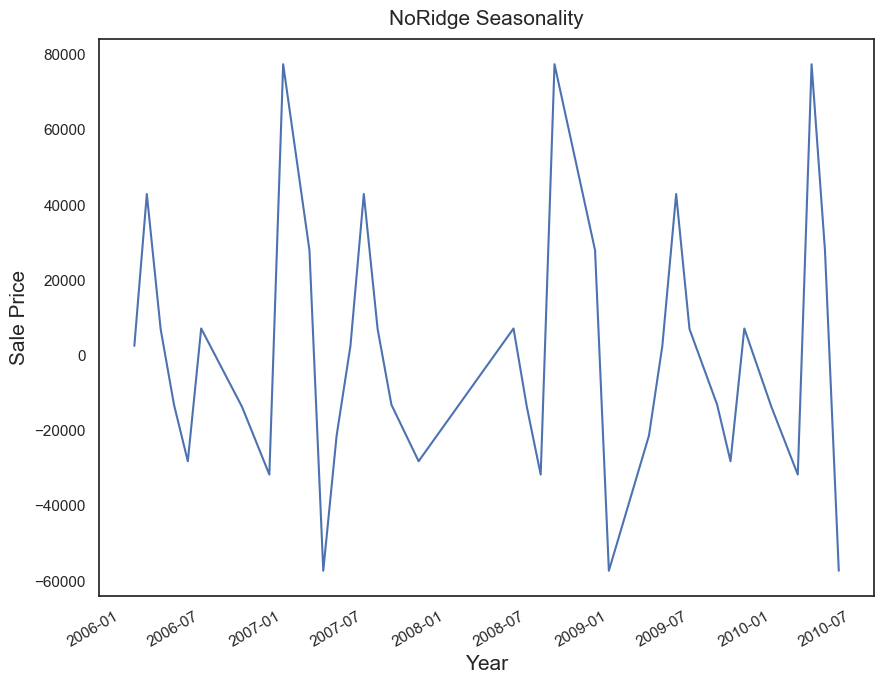

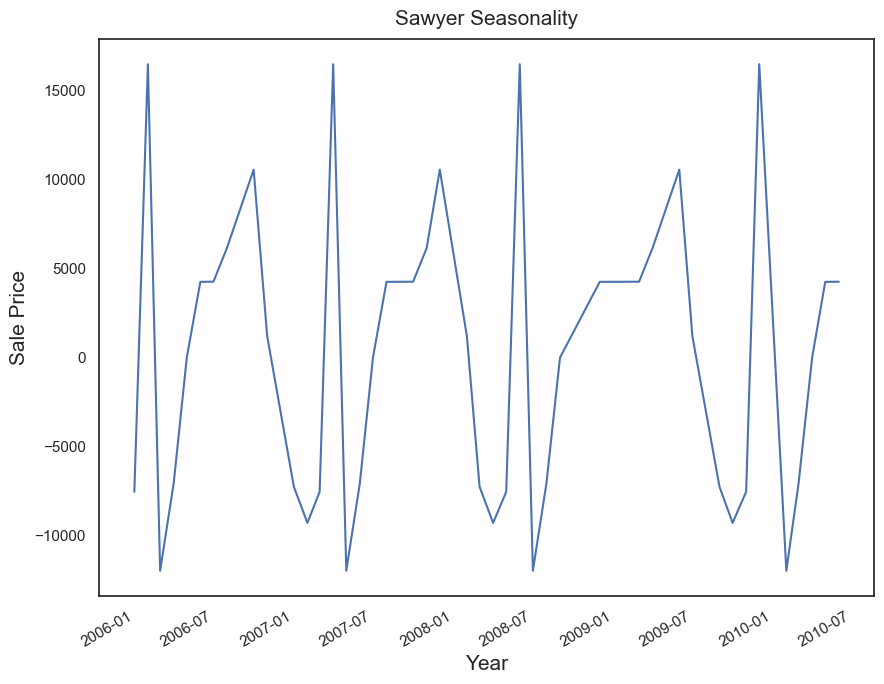

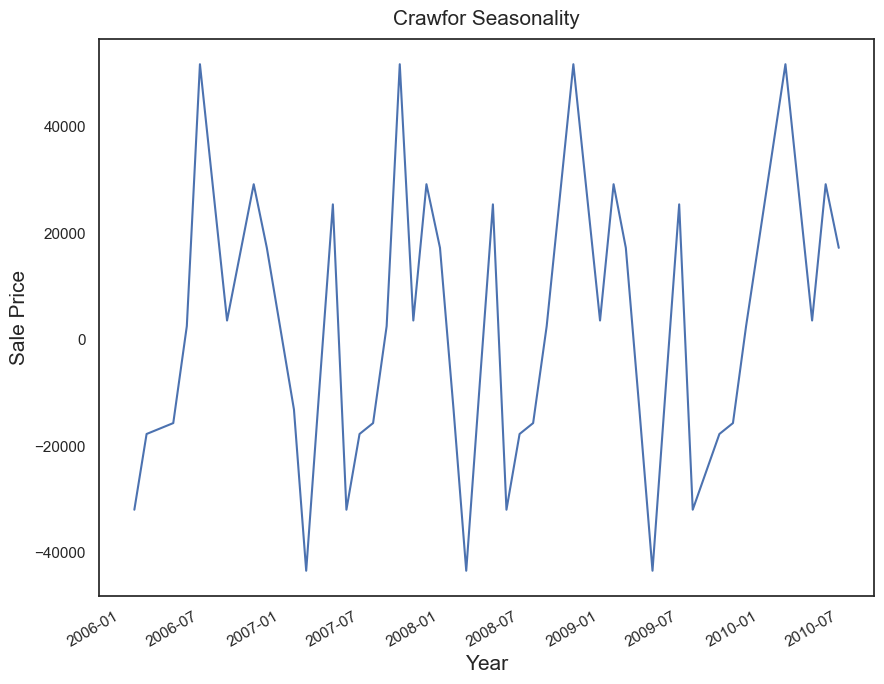

<Figure size 900x700 with 0 Axes>

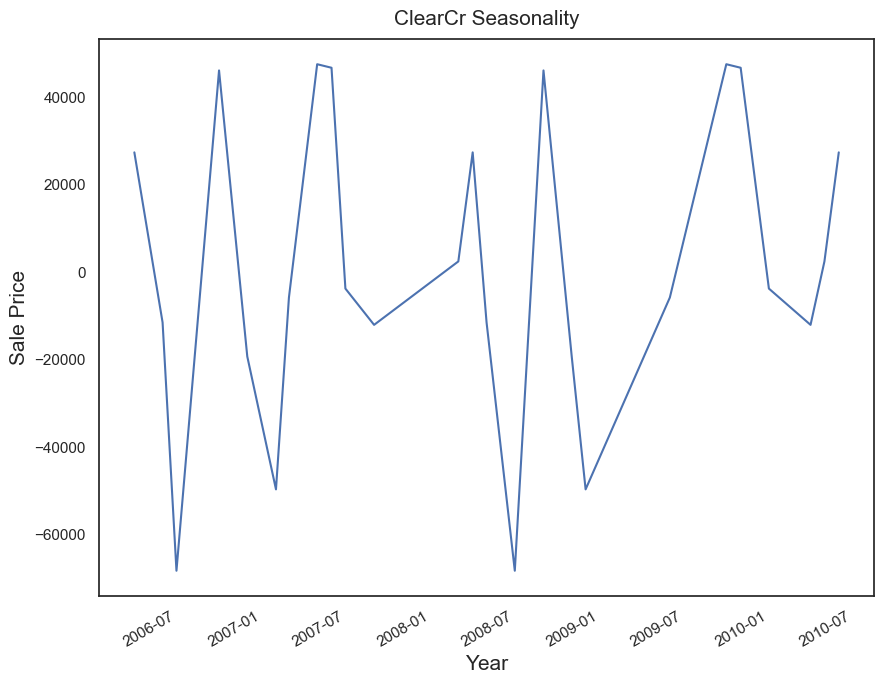

<Figure size 900x700 with 0 Axes>

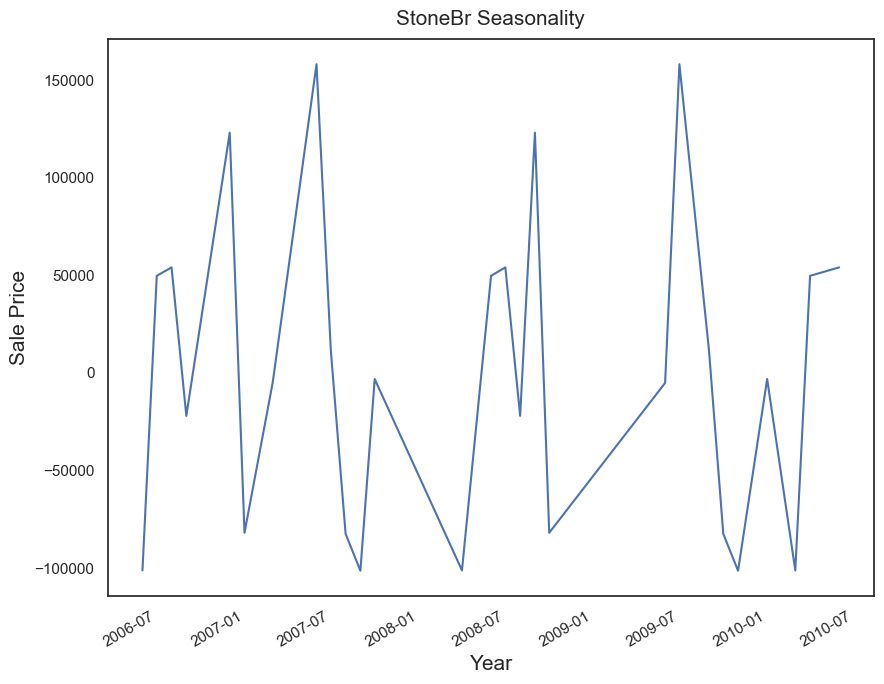

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

In [105]:
# sns.set(style="darkgrid")
# sns.set(rc = {'figure.figsize':(8, 7)})
sns.set_style('white')
# plotting trend plots for neighborhoods with up trend

# uptrend = ['NWAmes', 'Mitchel', 'CollgCr', 'Gilbert',
#           'Timber']

didnt_work = []
for neighborhood in tst:
    try:
        fig = plt.figure()
        housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
        housing = housing[housing['Neighborhood'] == neighborhood]
        DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                                housing['MoSold'].astype(str) + '-1').rename('DateSold')

        df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
        df.rename(columns={'SalePrice': 'Observed'}, inplace=True)

        rcParams['figure.figsize'] = 9, 7
        decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
        fig = decomposition.seasonal.plot(legend=False)

#         fig.set(
#             yticks = neighborhood_params[neighborhood][-2],
#             yticklabels = neighborhood_params[neighborhood][-1]
#                )

        plt.title(f'{neighborhood} Seasonality', fontsize = 15, pad=10)
        plt.xlabel('Year', fontsize = 15)
        plt.ylabel('Sale Price', fontsize = 15)
#         plt.legend([neighborhood], frameon=False, prop={'size': 15}, loc='upper right')
        plt.tight_layout()
        plt.savefig(f'../shiny/www/img/season/{neighborhood}.png', dpi = 600)
    
    except:
        didnt_work.append(neighborhood)

In [69]:
# for neighborhood in neighborhoods:
    
#     housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
#     housing = housing[housing['Neighborhood'] == neighborhood]
#     DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
#                             housing['MoSold'].astype(str) + '-1').rename('DateSold')

#     df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
#     df.rename(columns={'SalePrice': 'Observed'}, inplace=True)
    
#     rcParams['figure.figsize'] = 18, 8
#     decomposition = sm.tsa.seasonal_decompose(df, model='additive', period=12)
#     decomposition.trend.plot(xlim = ('2008-01-01', '2009-12-01'))
#     plt.title(neighborhood)
#     plt.show()

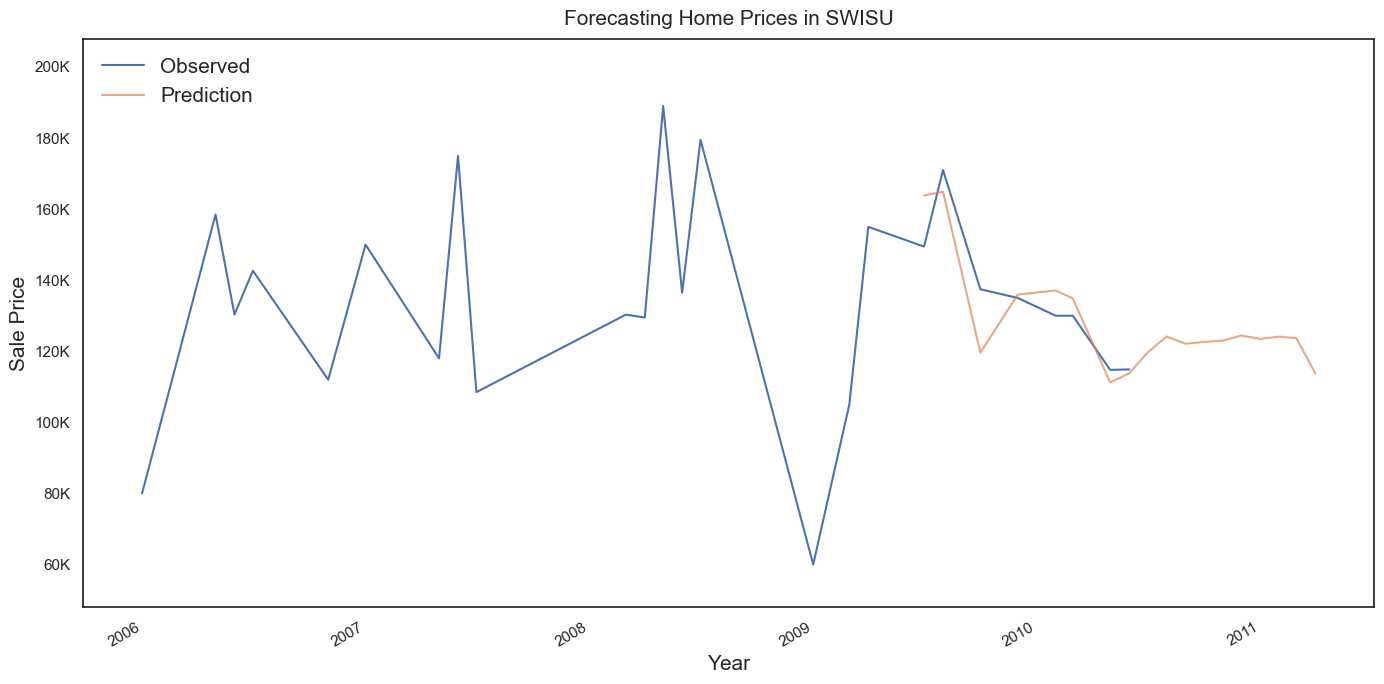

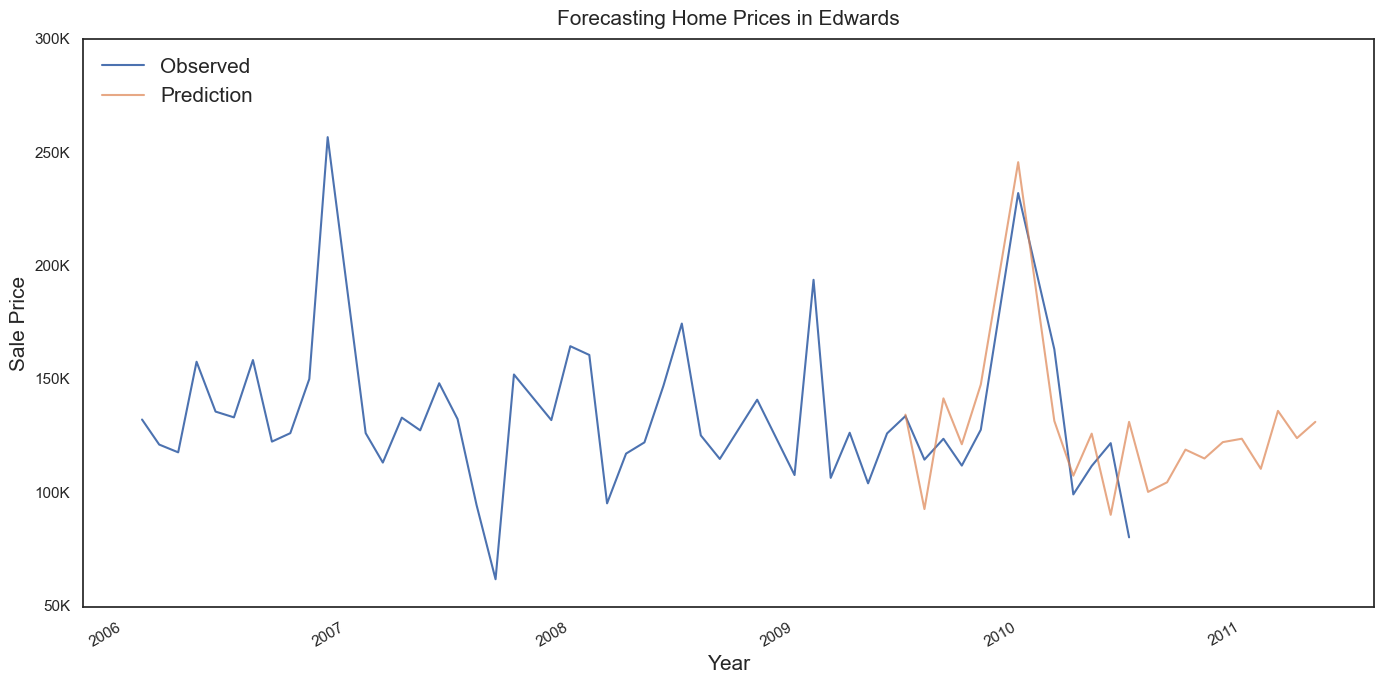

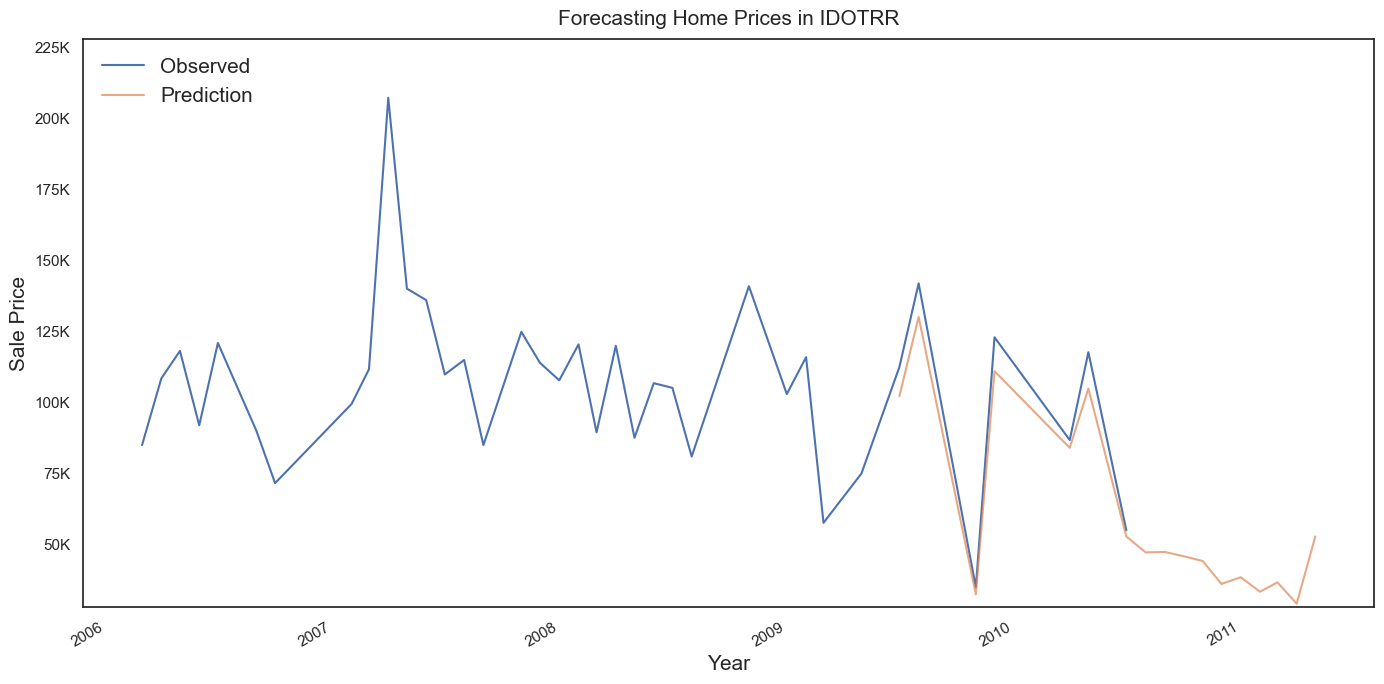

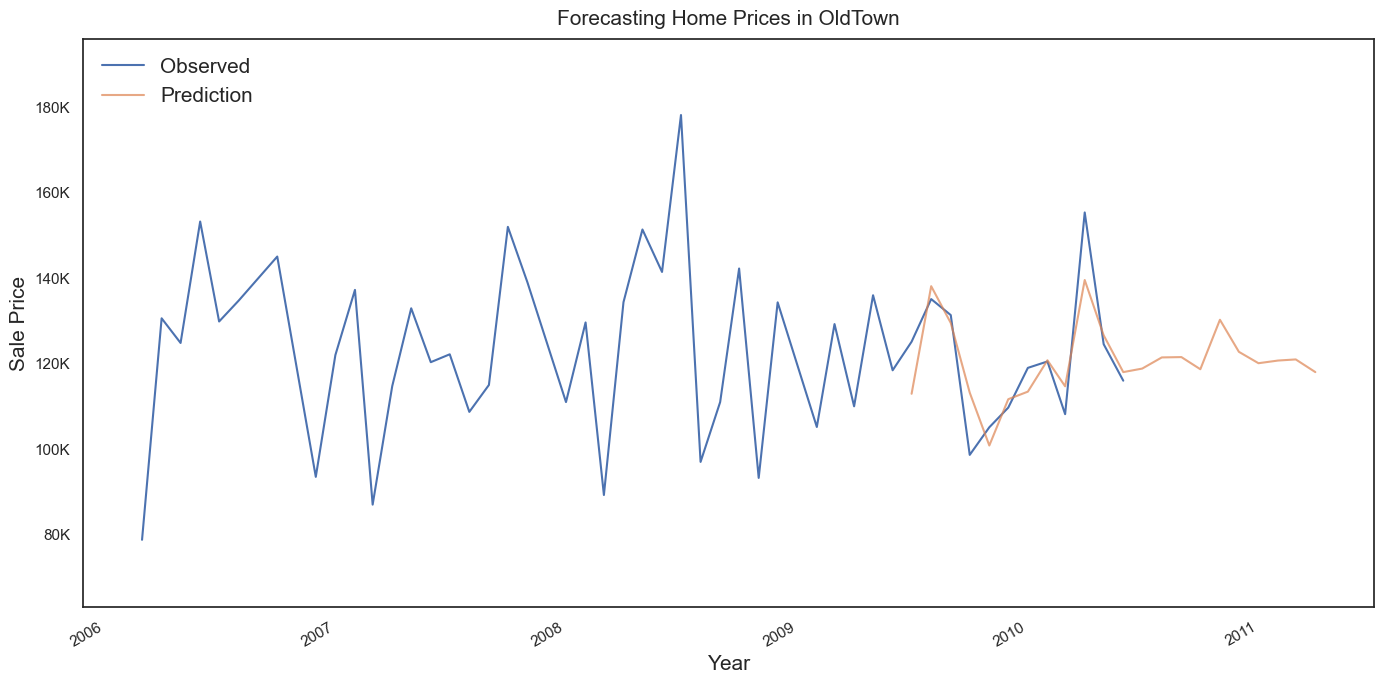

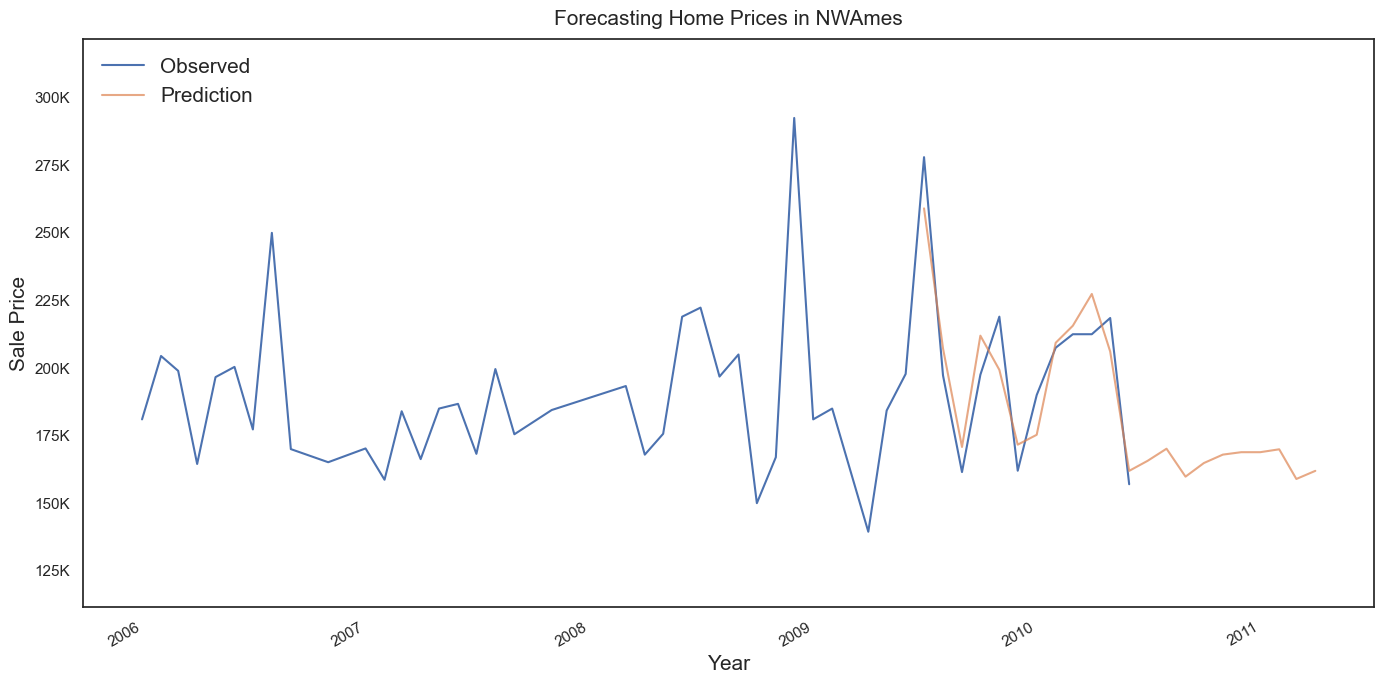

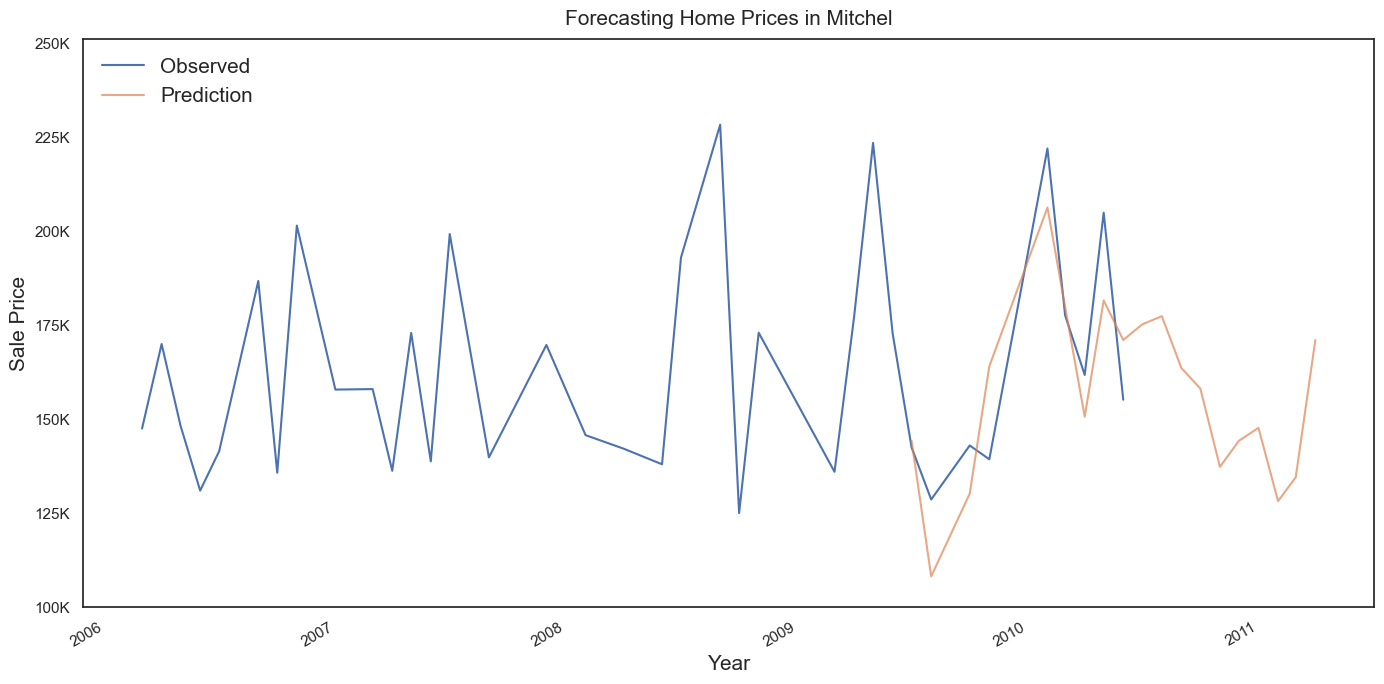

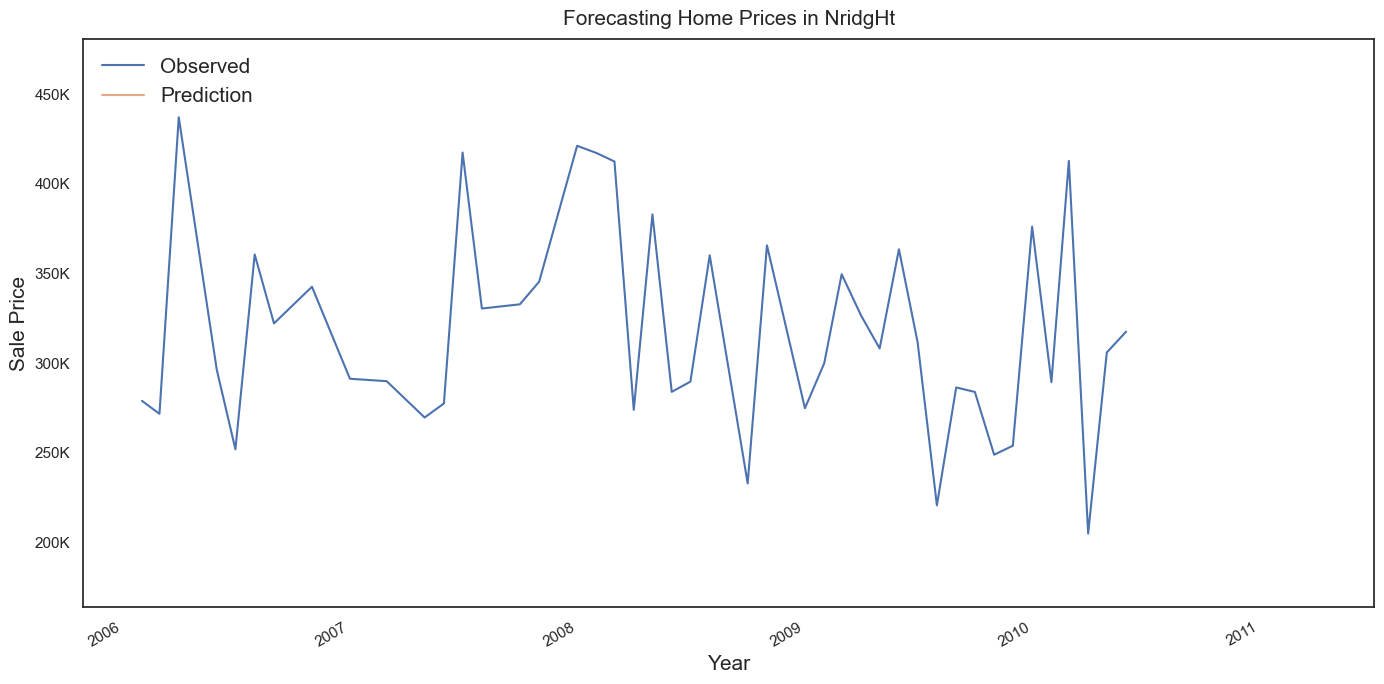

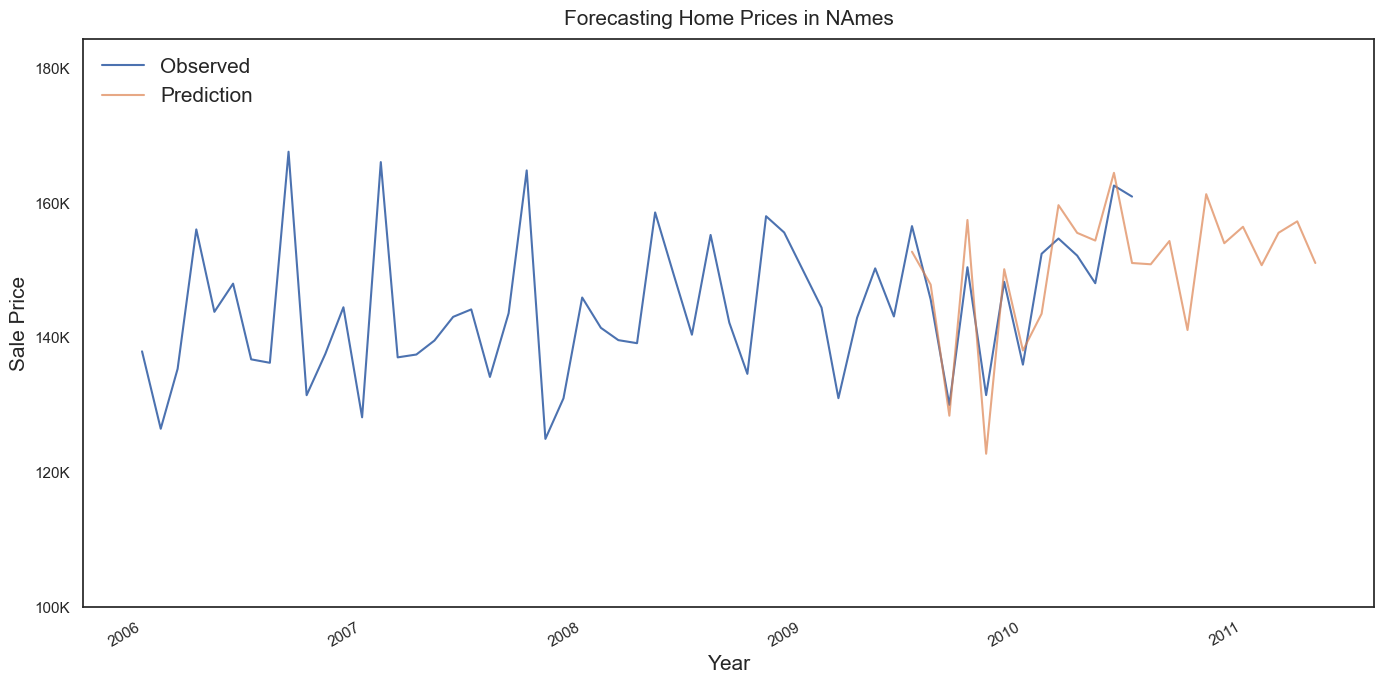

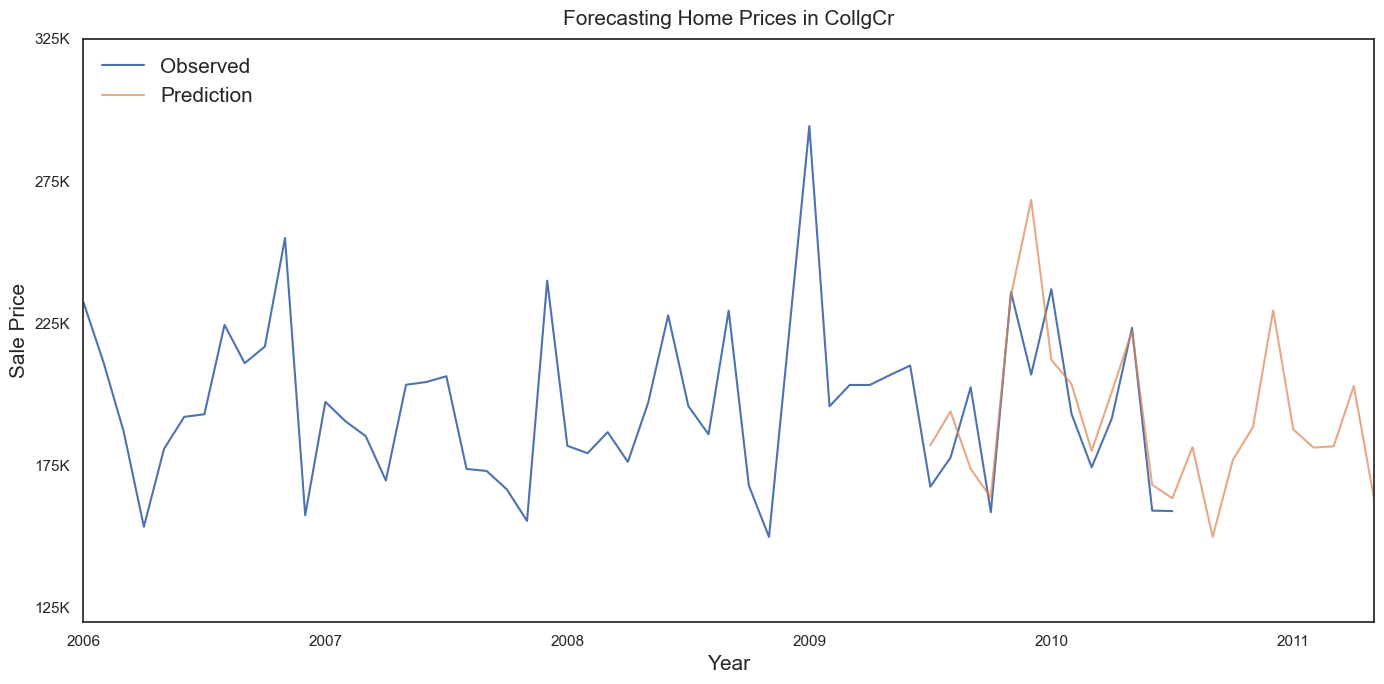

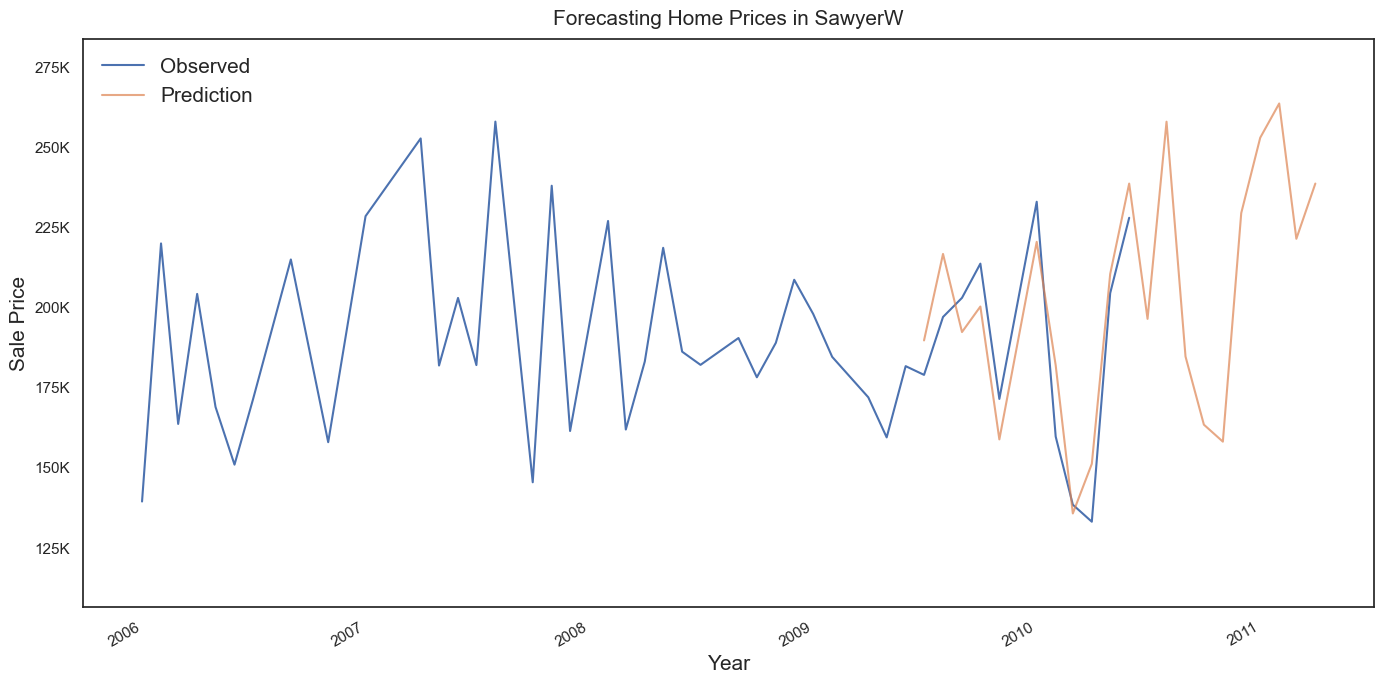

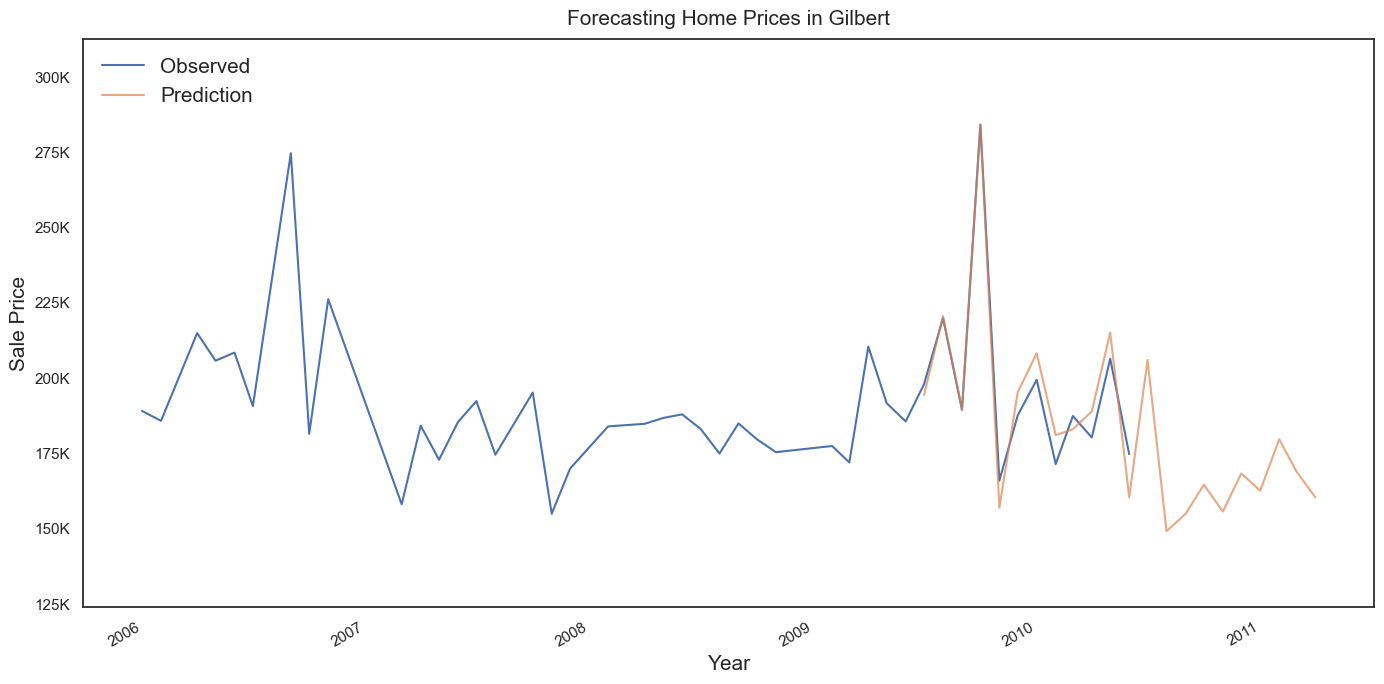

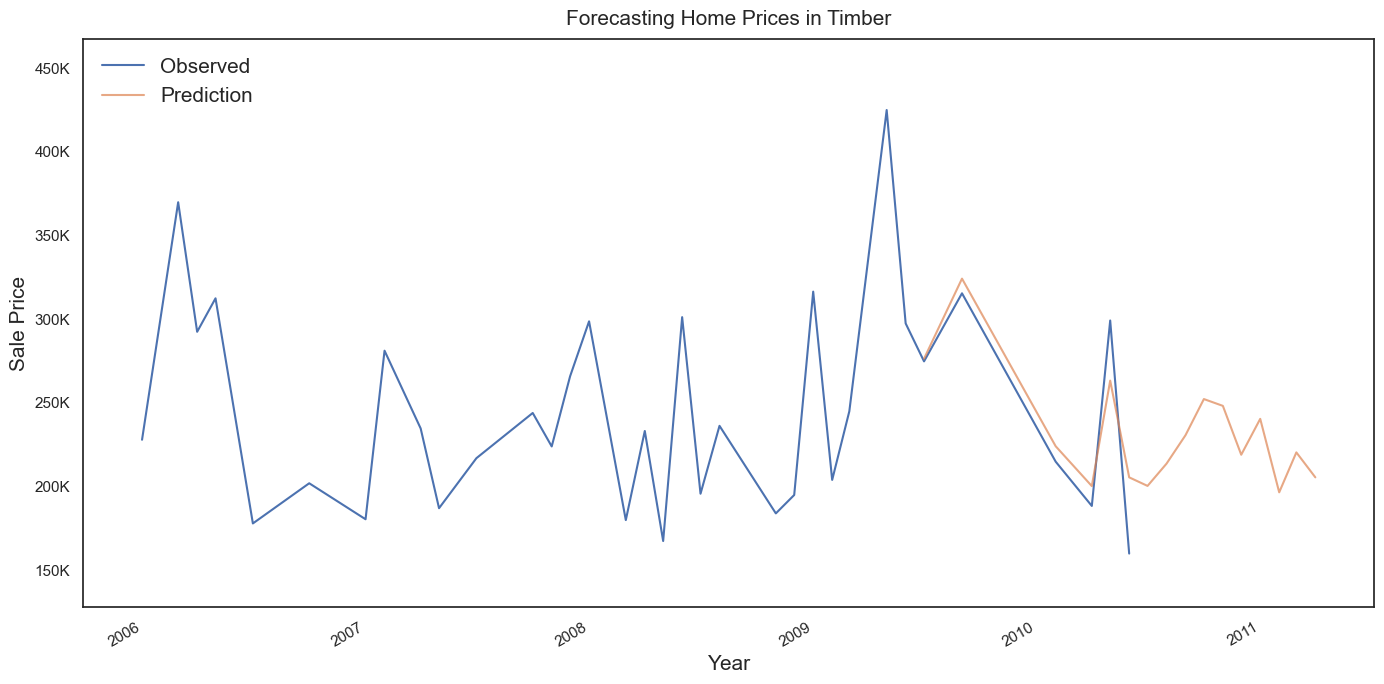

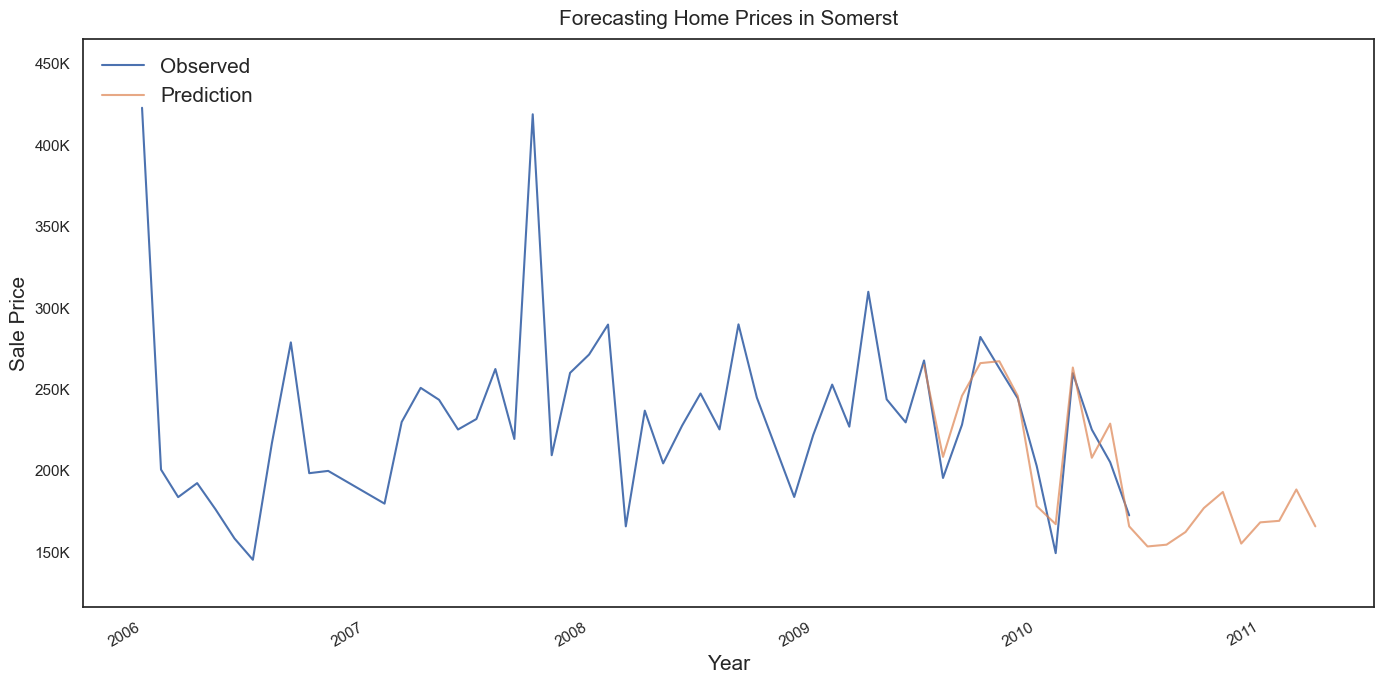

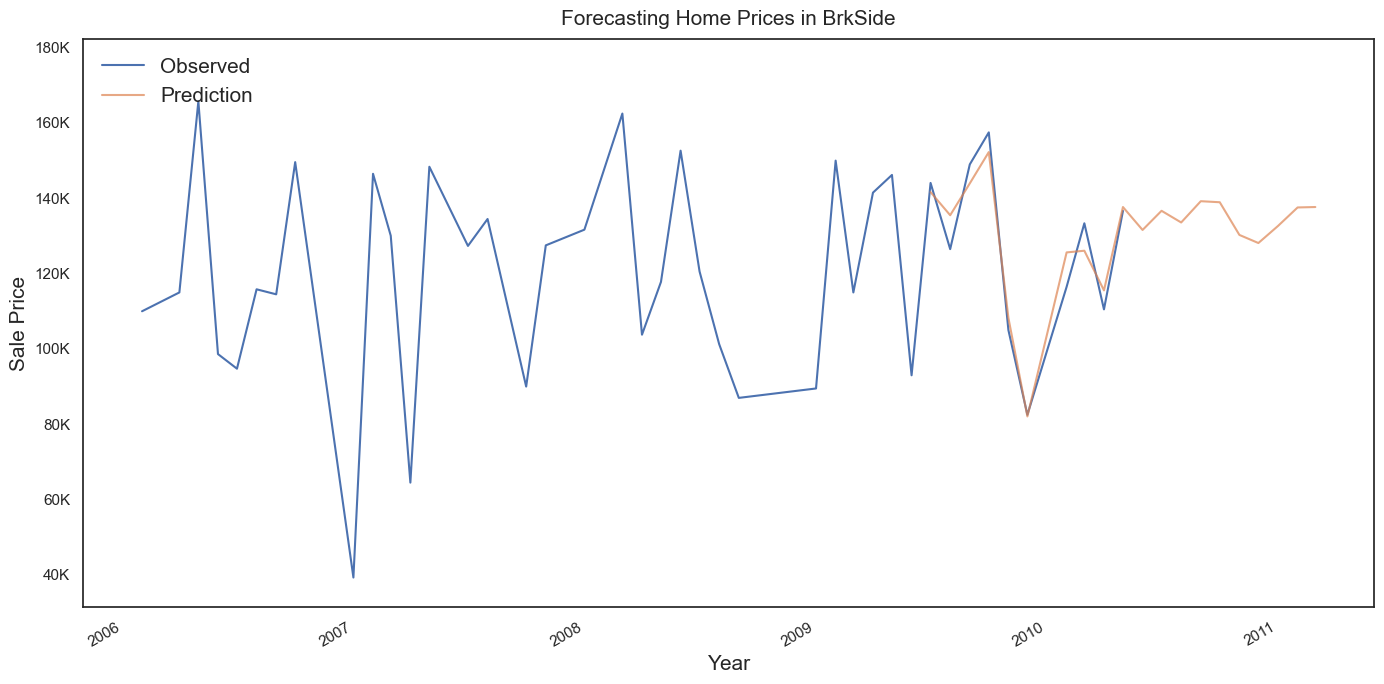

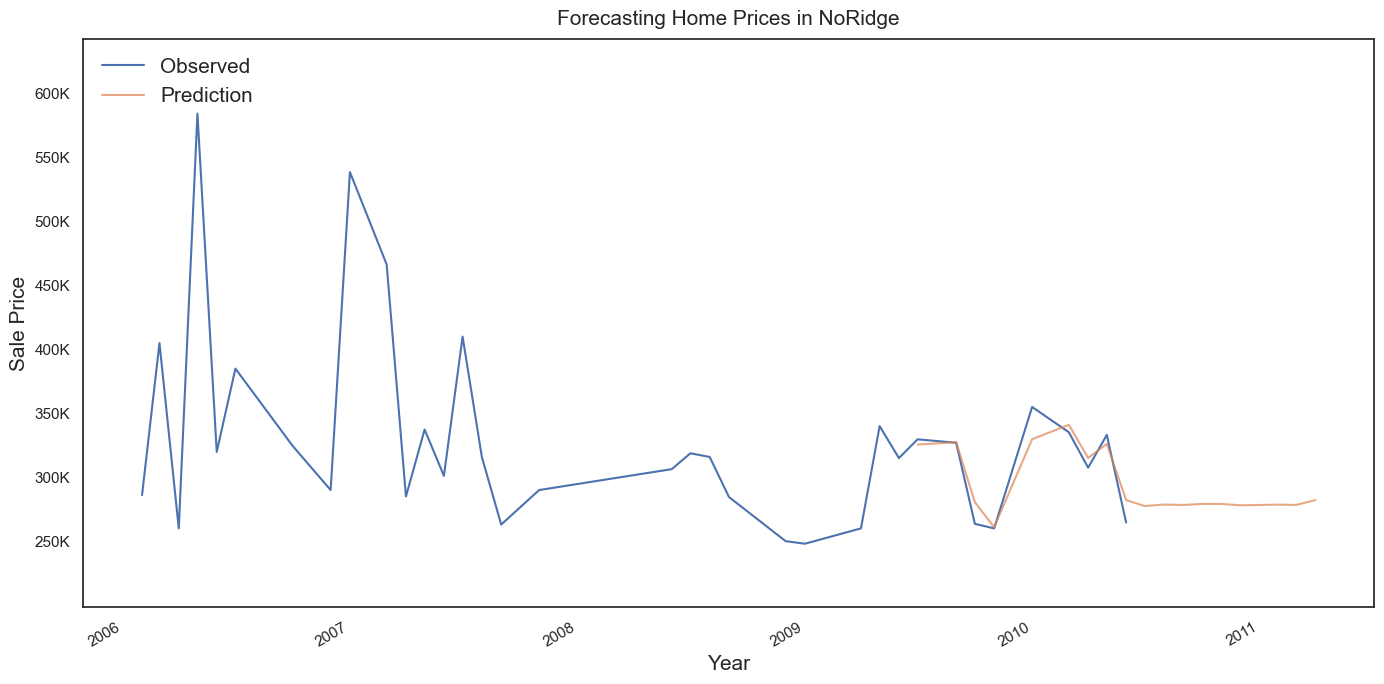

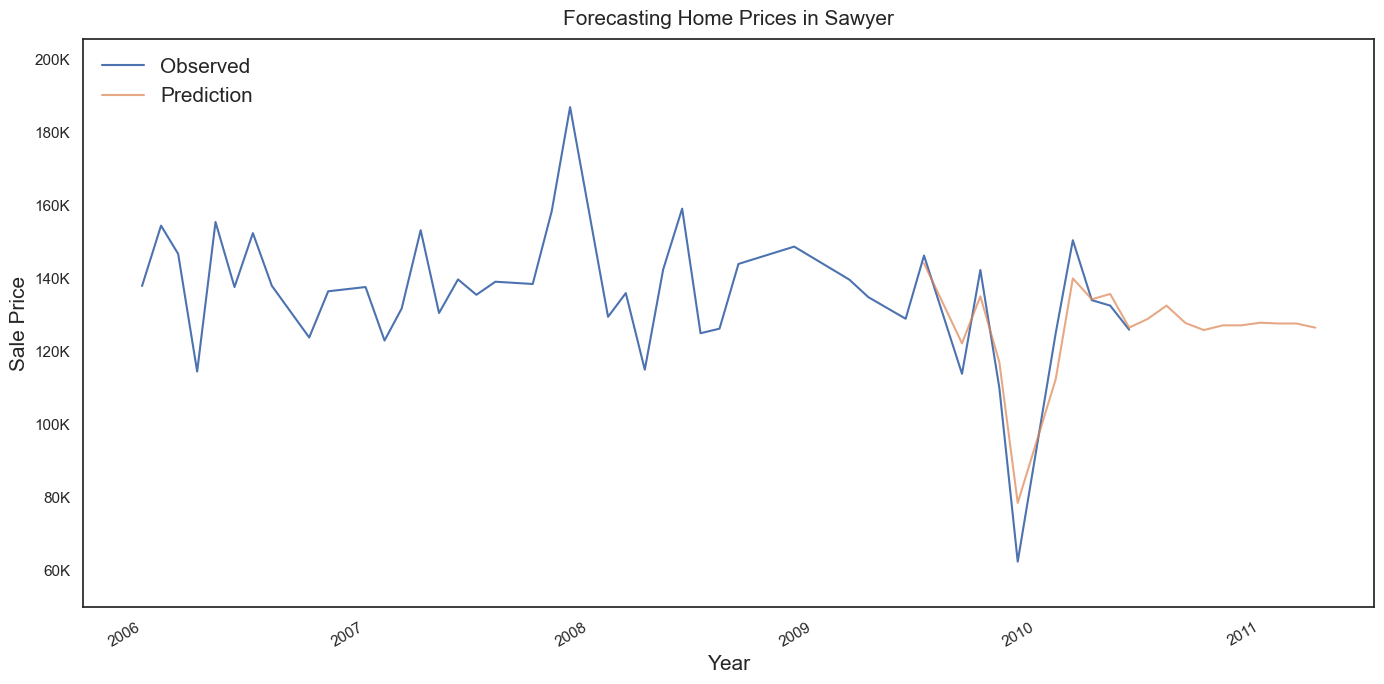

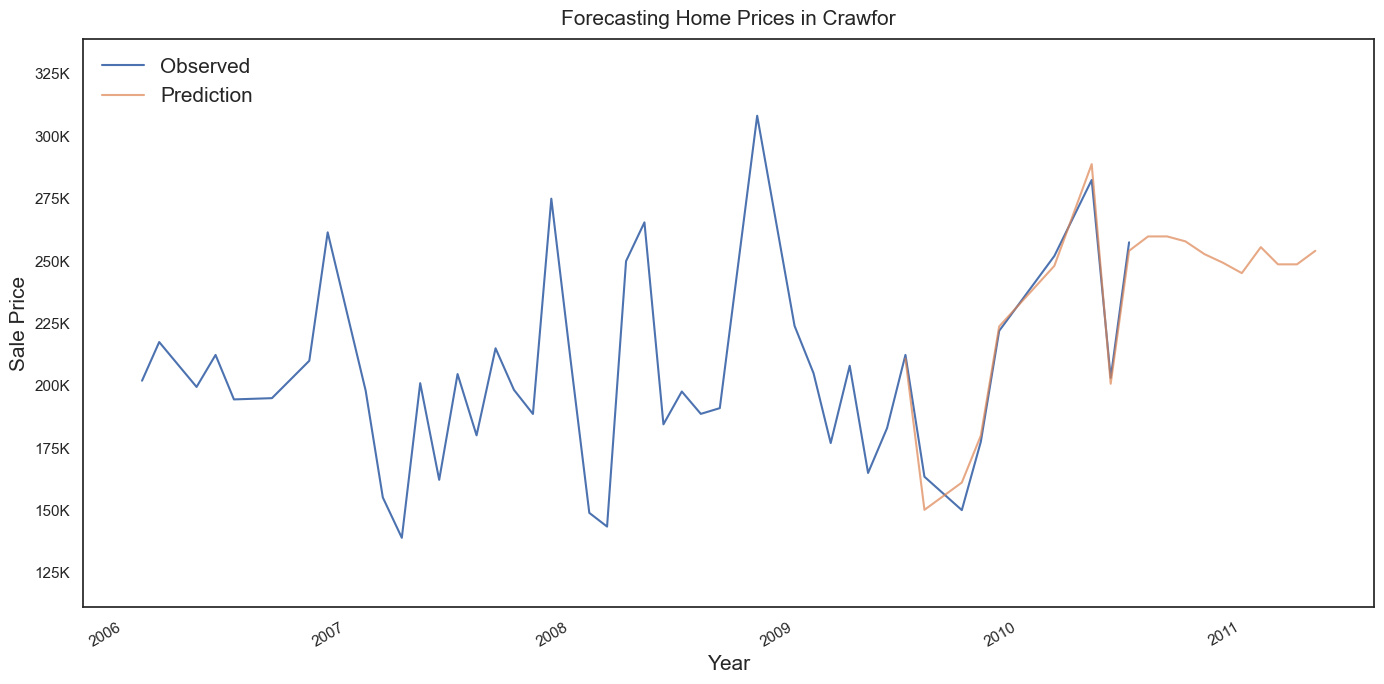

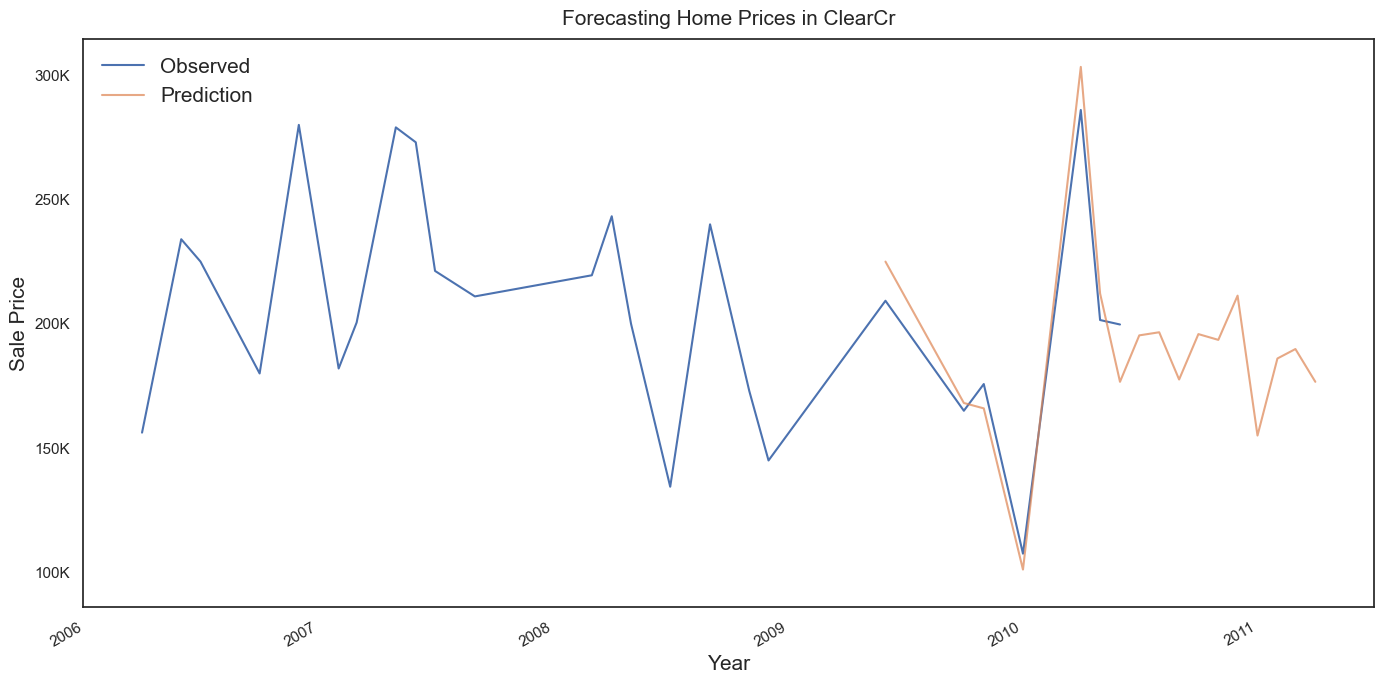

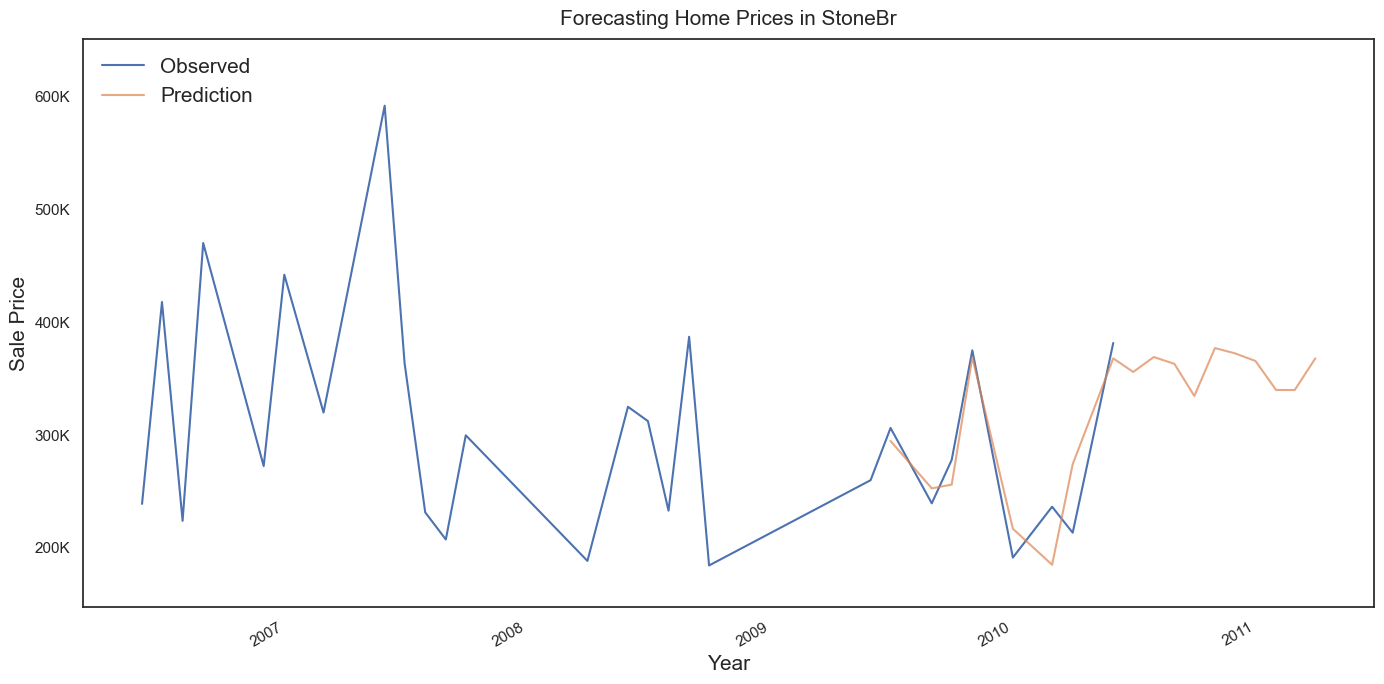

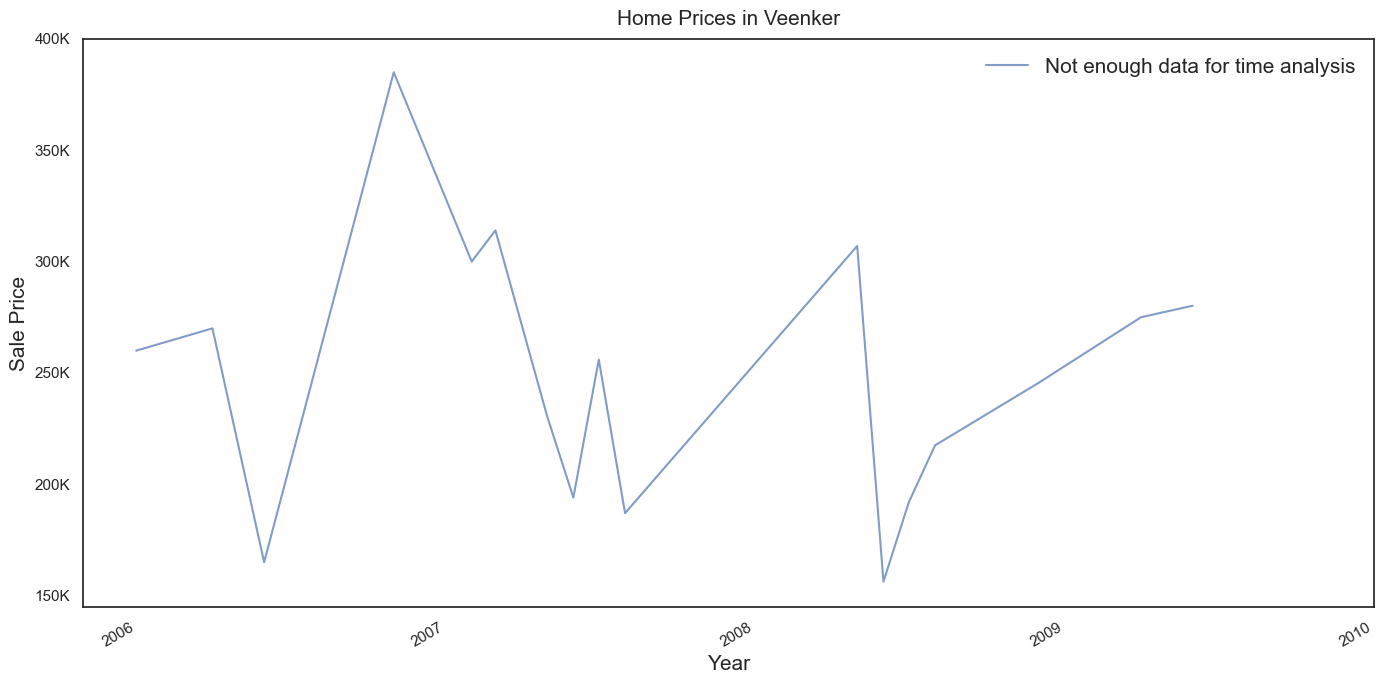

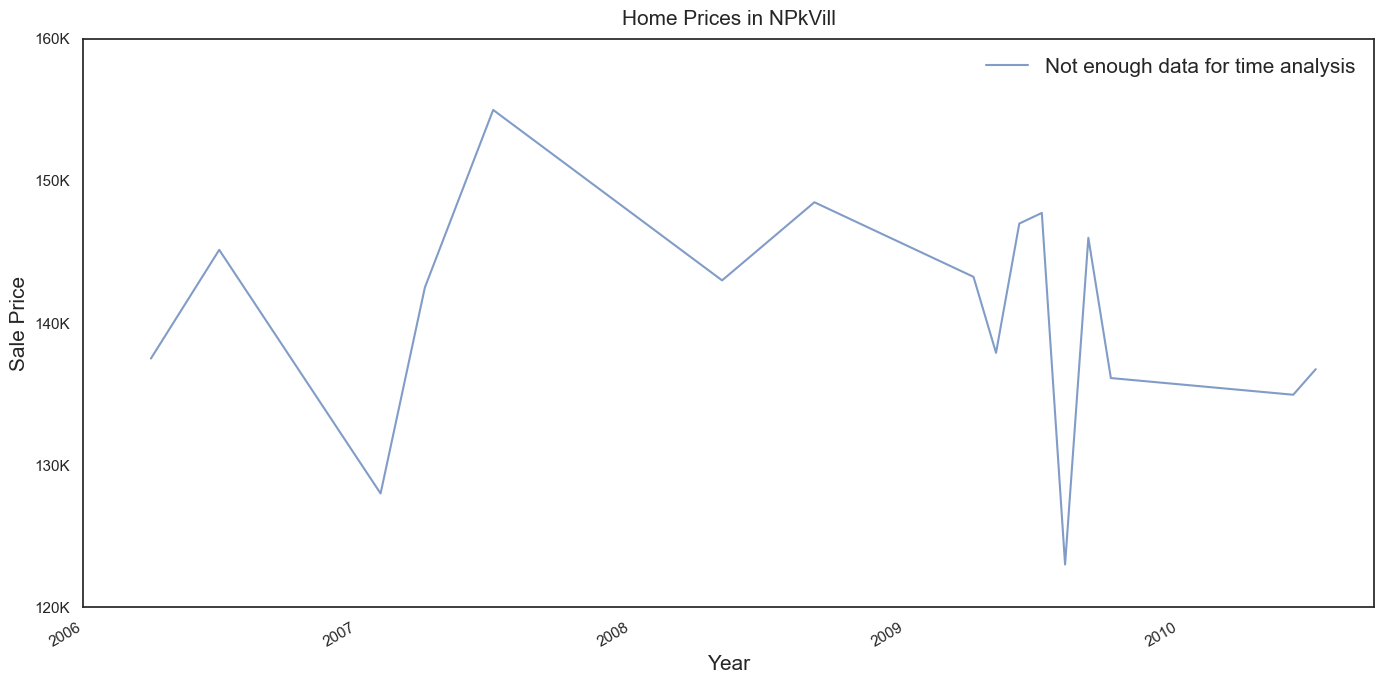

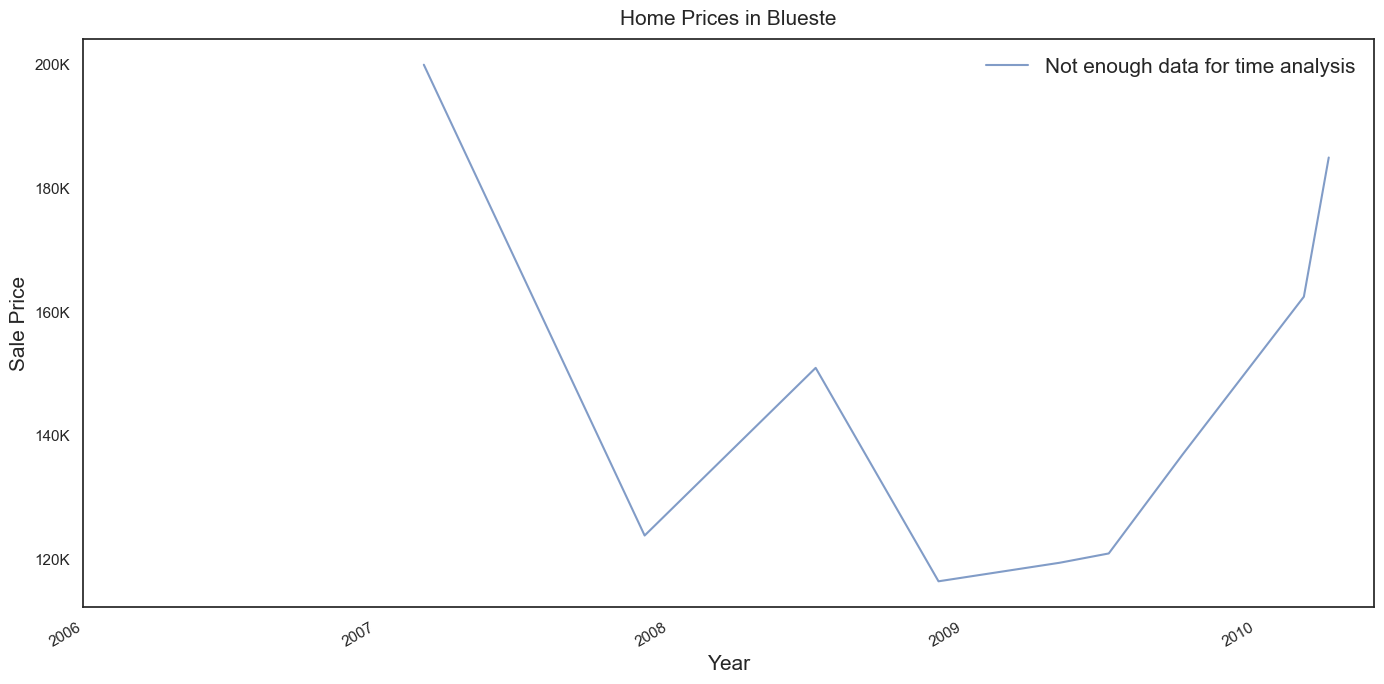

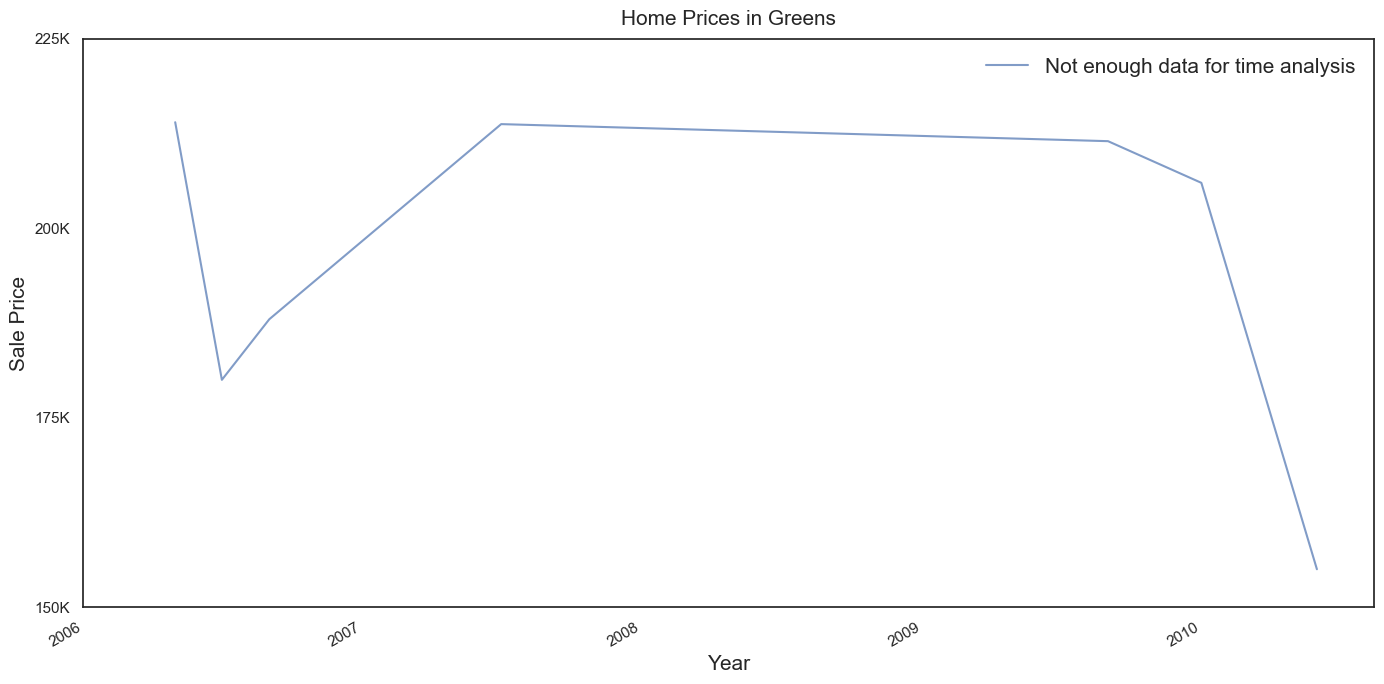

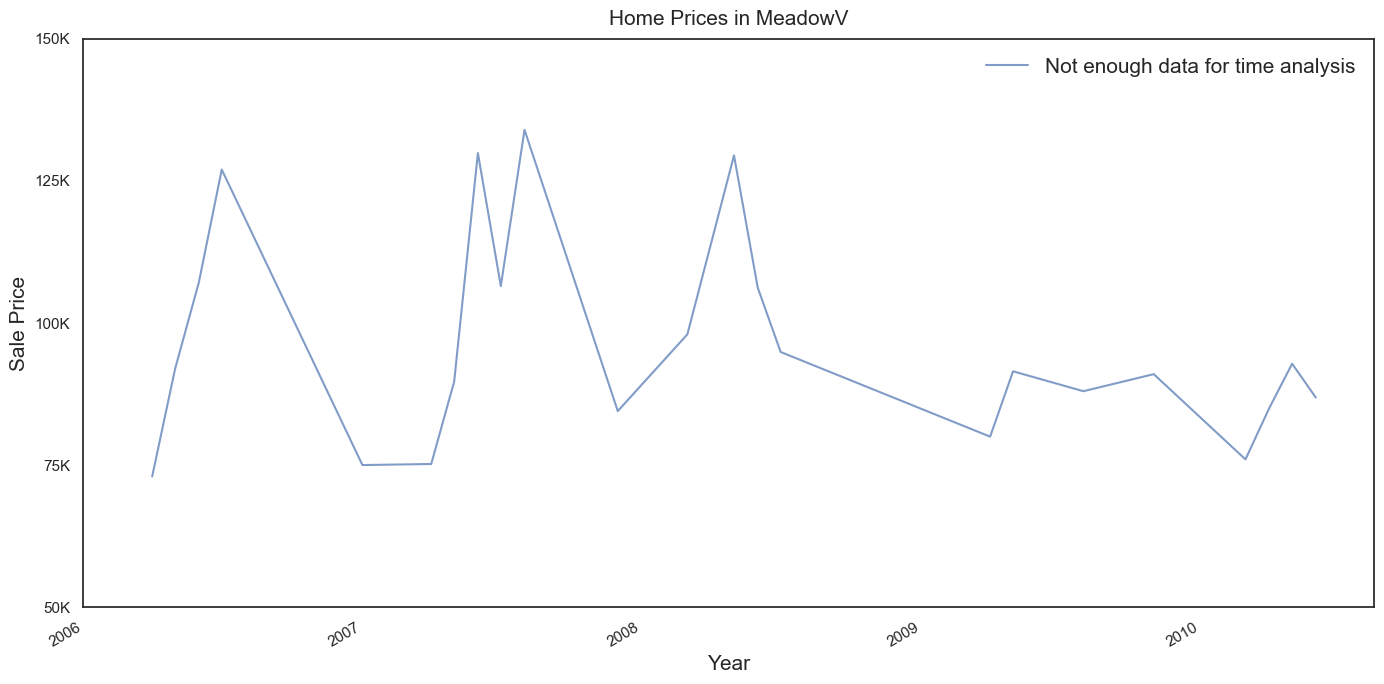

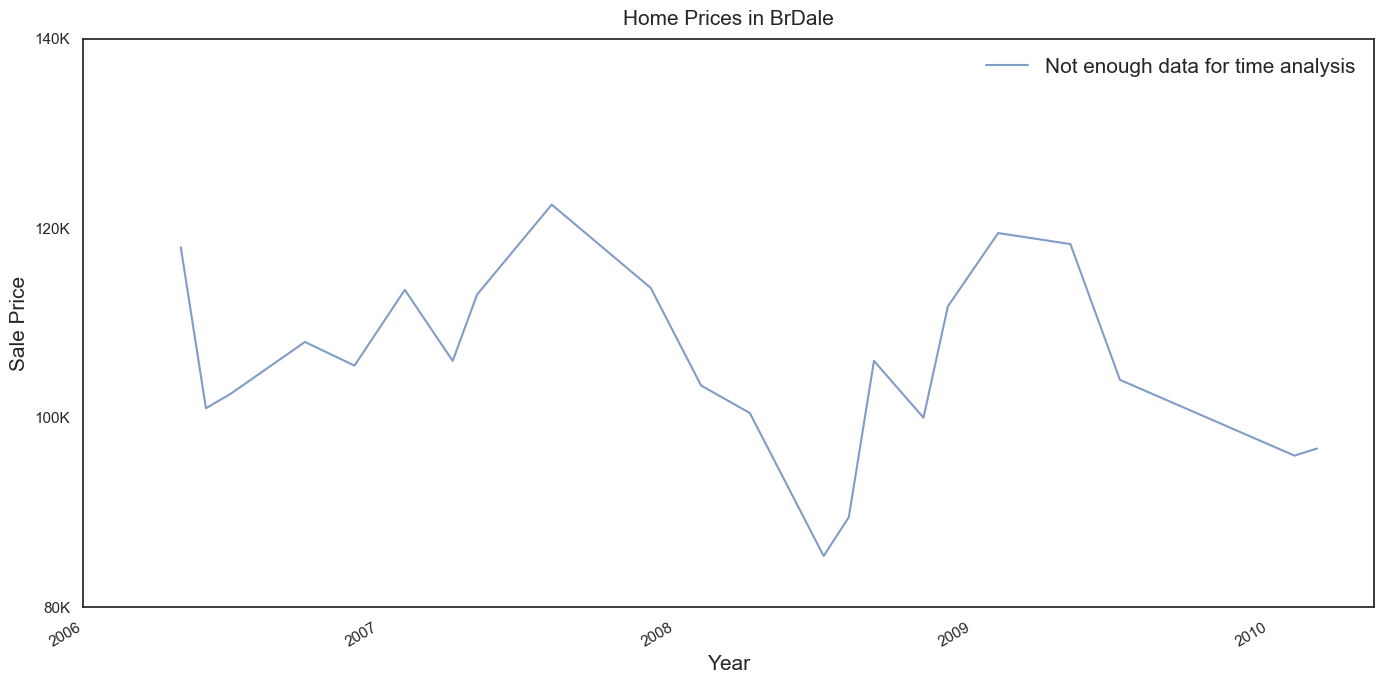

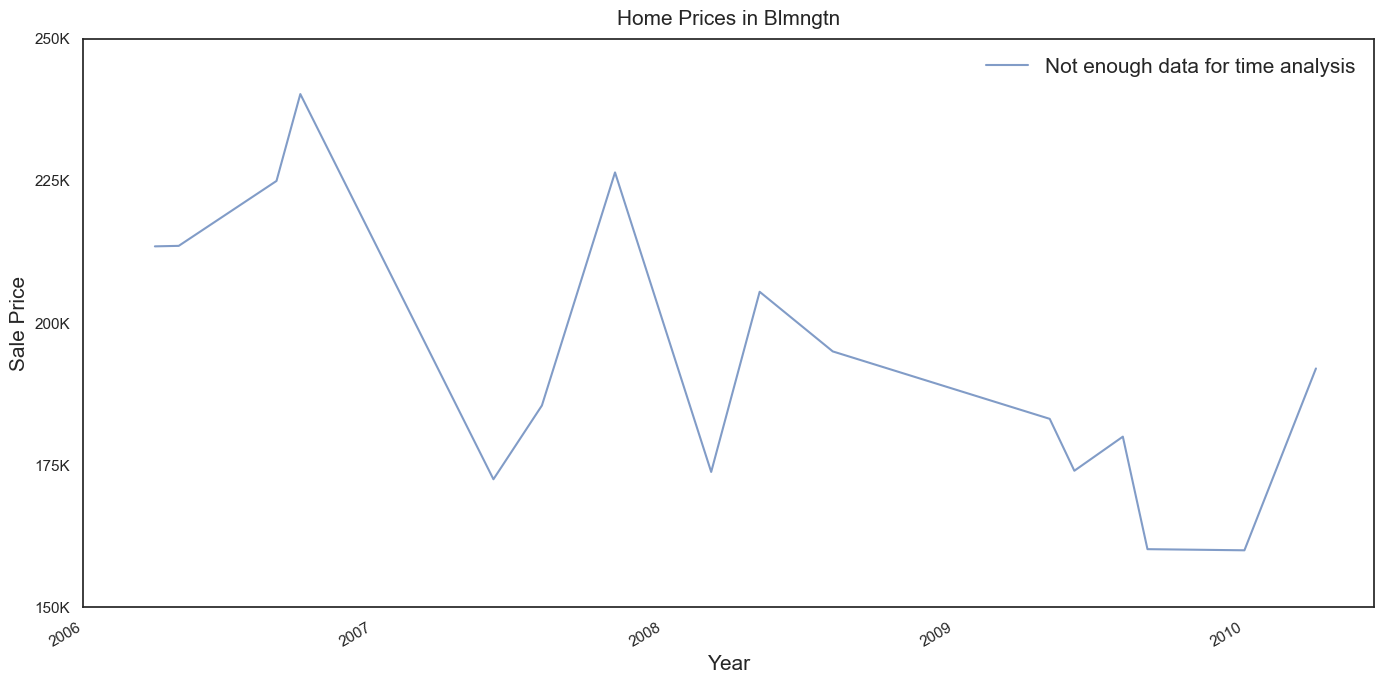

In [127]:
for neighborhood in neighborhoods:
    housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
    housing = housing[housing['Neighborhood'] == neighborhood]
    DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                            housing['MoSold'].astype(str) + '-1').rename('DateSold')

    df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
    df.rename(columns={'SalePrice': 'Observed'}, inplace=True)


    mod = sm.tsa.statespace.SARIMAX(df,
                                    order=neighborhood_params[neighborhood][0],
                                    seasonal_order=neighborhood_params[neighborhood][1],
                                    enforce_stationarity=neighborhood_params[neighborhood][2],
                                    enforce_invertibility=neighborhood_params[neighborhood][3])
    result = mod.fit(disp=False)

    predict = result.get_prediction(start=pd.to_datetime(neighborhood_params[neighborhood][4]), dynamic=False)
    forecast = result.get_forecast(steps=10)

    forecast_dates = pd.date_range(predict.predicted_mean.index[len(predict.predicted_mean)-1], 
                      freq='MS', periods=len(forecast.predicted_mean)).shift(1)

    ci = predict.conf_int().append(forecast.conf_int().set_axis(forecast_dates))
    pred = predict.predicted_mean.append(forecast.predicted_mean.set_axis(forecast_dates))
    fig = df.plot(label='Observed')

    predicted_mean = pred.shift(-1)
    predicted_mean.iloc[len(predicted_mean)-1] = result.forecast(1)
    predicted_mean.plot(ax=fig, label='Prediction', alpha=.7, figsize=(14, 7))

#     fig.fill_between(ci.index,
#                     ci.iloc[:, 0],
#                     ci.iloc[:, 1], color='blue', alpha=.2)

    fig.set(ylim = (min(df['Observed']) - 0.2*min(df['Observed']), 
                    max(df['Observed']) + 0.1*max(df['Observed'])),
            yticks = neighborhood_params[neighborhood][5],
            yticklabels = neighborhood_params[neighborhood][6])

    plt.title(f'Forecasting Home Prices in {neighborhood}', fontsize = 15, pad=10)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Sale Price', fontsize = 15)
    plt.legend(frameon=False, prop={'size': 15}, loc='upper left')
    plt.tight_layout()
    plt.savefig(f'../visualizations/{neighborhood}_sarima_prediction_noci.png', dpi = 600)
    plt.show()
    
    
# for neighborhoods without enough data for time analysis
for neighborhood in not_enough_data:
    
    housing = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)
    housing = housing[housing['Neighborhood'] == neighborhood]
    DateSold = pd.to_datetime(housing['YrSold'].astype(str) + '-' + 
                            housing['MoSold'].astype(str) + '-1').rename('DateSold')

    df = housing[['SalePrice']].set_index(DateSold).groupby('DateSold').mean()
    label = 'Not enough data for time analysis'
    df.rename(columns={'SalePrice': label}, inplace=True)

    fig = df.plot(alpha=.7, figsize=(14, 7), label='Not enough data for time analysis')
    fig.set(xticks=['2006-01', '2007-01', '2008-01', '2009-01', '2010-01'],
            xticklabels=list(range(2006, 2011)),
            yticks=neighborhood_params[neighborhood][0],
            yticklabels=neighborhood_params[neighborhood][1])
    
    plt.title(f'Home Prices in {neighborhood}', fontsize = 15, pad = 10)
    plt.xlabel('Year', fontsize = 15)
    plt.ylabel('Sale Price', fontsize = 15)
    plt.legend(frameon=False, prop={'size': 15})
    plt.tight_layout()
    plt.savefig(f'../visualizations/{neighborhood}_sarima_prediction_noci.png', dpi = 600)
    plt.show()

In [544]:
# #### GRID SEARCH

# for param in pdq:
#     for sparam in seasonal_pdq:
#         for stationarity in [True,False]:
#             for invertibility in [True, False]:
#                 try:
#                     mod = sm.tsa.statespace.SARIMAX(df,
#                                                     order=param,
#                                                     seasonal_order=sparam,
#                                                     enforce_stationarity=stationarity,
#                                                     enforce_invertibility=invertibility)
#                     result = mod.fit(disp=False)

#                     predict = result.get_prediction(start=pd.to_datetime('2009-06-01'), dynamic=False)
#                     forecast = result.get_forecast(steps=10)

#                     forecast_dates = pd.date_range(predict.predicted_mean.index[len(predict.predicted_mean)-1], 
#                                       freq='MS', periods=len(forecast.predicted_mean)).shift(1)

#                     ci = predict.conf_int().append(forecast.conf_int().set_axis(forecast_dates))
#                     pred = predict.predicted_mean.append(forecast.predicted_mean.set_axis(forecast_dates))
#                     fig = df.plot(label='Observed')

#                     predicted_mean = pred.shift(-1)
#                     predicted_mean.iloc[len(predicted_mean)-1] = result.forecast(1)
#                     predicted_mean.plot(ax=fig, label='Prediction', alpha=.7, figsize=(14, 7))

#                     fig.fill_between(ci.index,
#                                     ci.iloc[:, 0],
#                                     ci.iloc[:, 1], color='k', alpha=.2)

#                     fig.set(xlabel = 'Year', ylabel = 'Sale Price',
#                              ylim = (min(df['Observed']) - 0.1*min(df['Observed']), 
#                                      max(df['Observed']) + 0.1*max(df['Observed'])))

#                     plt.title(f'Forecasting Home Prices in {neighborhood}', fontsize = 15, pad=10)
#                     plt.legend()
#                     plt.tight_layout()
#                     plt.show()
#                     print(param, sparam, stationarity, invertibility, result.aic)
                    
#                 except:
#                     pass

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

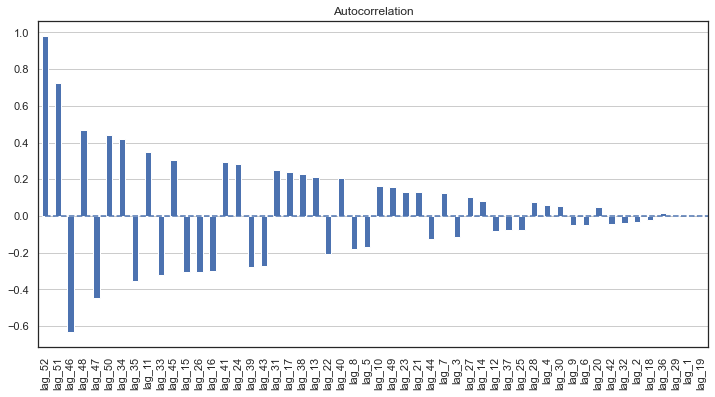

In [114]:

# auto_cor = sales.groupby("Date")["Weekly_Sales"].sum()
# auto_cor = pd.DataFrame(auto_cor)
# auto_cor.columns = ["y"]

df2 = df.copy()
# Adding the lag of the target variable from 1 steps back up to 52 (due to a seasonality at the end of the year)
for i in range(1, 53):
    df2["lag_{}".format(i)] = df2.SalePrice.shift(i)

# Compute autocorrelation of the series and its lags
lag_corr = df2.corr()
lag_corr = lag_corr.iloc[1:,0]
lag_corr.columns = ["corr"]
order = lag_corr.abs().sort_values(ascending = False)
lag_corr = lag_corr[order.index]

# Plot the Autocorrelation
plt.figure(figsize=(12, 6))
lag_corr.plot(kind='bar')
plt.grid(True, axis='y')
plt.title("Autocorrelation")
plt.hlines(y=0, xmin=0, xmax=len(lag_corr), linestyles='dashed')

In [107]:
import pmdarima as pm

In [122]:
stepwise_model = pm.auto_arima(df.iloc[:].values, start_p=1, start_q=1,
                               max_p=20, max_q=20, m=52,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=54.90 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=46.491, Time=2.17 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=inf, Time=35.91 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=20.54 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=inf, Time=5.26 sec
 ARIMA(0,1,0)(0,1,1)[52]             : AIC=inf, Time=4.21 sec
 ARIMA(0,1,0)(1,1,1)[52]             : AIC=46.911, Time=26.37 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=47.931, Time=1.18 sec
 ARIMA(0,1,1)(0,1,0)[52]             : AIC=48.884, Time=0.94 sec
 ARIMA(1,1,1)(0,1,0)[52]             : AIC=48.086, Time=15.16 sec
 ARIMA(0,1,0)(0,1,0)[52] intercept   : AIC=46.411, Time=0.44 sec
 ARIMA(0,1,0)(1,1,0)[52] intercept   : AIC=48.145, Time=7.01 sec
 ARIMA(0,1,0)(0,1,1)[52] intercept   : AIC=inf, Time=6.79 sec
 ARIMA(0,1,0)(1,1,1)[52] intercept   : AIC=49.778, Time=6.70 sec
 ARIMA(1,1,0)(0,1,0)[52] intercept   : AIC=49.931, Time=1.06